#CNN
温度データから内部欠陥の位置と大きさを推定するプログラム

In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_data = []
size_y_data = []
position_x_data = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_data = np.array(size_x_data, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=float)
position_y_data = np.array(position_y_data, dtype=int)

### データの加工
size_x_data = (size_x_data-no_hole_data)
position_x_data = (position_x_data-no_hole_data)
size_y_data = keras.utils.to_categorical(size_y_data, 6)
position_y_data = (position_y_data-1)
position_y_data = keras.utils.to_categorical(position_y_data, 25)

### train用とtest用に分割(4:1)
size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


### reshape
size_x_train = size_x_train.reshape(8108, 50, 1)
size_x_test = size_x_test.reshape(2027, 50, 1)
position_x_train = position_x_train.reshape(8108, 50, 1)
position_x_test = position_x_test.reshape(2027, 50, 1)

In [3]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [4]:
# 学習(大きさ)
epochs = 4000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/4000
8108/8108 [==============================] - 1s 80us/step - loss: 1.5919 - accuracy: 0.2927 - val_loss: 1.5619 - val_accuracy: 0.3828
Epoch 2/4000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5195 - accuracy: 0.3868 - val_loss: 1.4777 - val_accuracy: 0.3592
Epoch 3/4000
8108/8108 [==============================] - 0s 27us/step - loss: 1.4643 - accuracy: 0.4059 - val_loss: 1.4320 - val_accuracy: 0.5126
Epoch 4/4000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4174 - accuracy: 0.4318 - val_loss: 1.3752 - val_accuracy: 0.4504
Epoch 5/4000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3794 - accuracy: 0.4613 - val_loss: 1.3723 - val_accuracy: 0.3833
Epoch 6/4000
8108/8108 [==============================] - 0s 27us/step - loss: 1.3525 - accuracy: 0.4459 - val_loss: 1.3159 - val_accuracy: 0.4465
Epoch 7/4000
8108/8108 [==============================] - 0s 26us/step

Epoch 56/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7865 - accuracy: 0.7153 - val_loss: 0.7953 - val_accuracy: 0.7425
Epoch 57/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7779 - accuracy: 0.7288 - val_loss: 0.8142 - val_accuracy: 0.6774
Epoch 58/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7789 - accuracy: 0.7257 - val_loss: 0.7840 - val_accuracy: 0.7523
Epoch 59/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.7655 - accuracy: 0.7294 - val_loss: 0.7852 - val_accuracy: 0.7430
Epoch 60/4000
8108/8108 [==============================] - 0s 22us/step - loss: 0.7644 - accuracy: 0.7261 - val_loss: 0.7901 - val_accuracy: 0.7203
Epoch 61/4000
8108/8108 [==============================] - 0s 22us/step - loss: 0.7522 - accuracy: 0.7370 - val_loss: 0.7815 - val_accuracy: 0.7119
Epoch 62/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.7555 - accuracy: 0.7364 - val_

8108/8108 [==============================] - 0s 26us/step - loss: 0.5193 - accuracy: 0.7696 - val_loss: 0.5923 - val_accuracy: 0.7306
Epoch 167/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5203 - accuracy: 0.7674 - val_loss: 0.5762 - val_accuracy: 0.7741
Epoch 168/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.5251 - accuracy: 0.7617 - val_loss: 0.5815 - val_accuracy: 0.7755
Epoch 169/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5253 - accuracy: 0.7707 - val_loss: 0.5844 - val_accuracy: 0.7800
Epoch 170/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5204 - accuracy: 0.7669 - val_loss: 0.5724 - val_accuracy: 0.7420
Epoch 171/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5142 - accuracy: 0.7679 - val_loss: 0.5759 - val_accuracy: 0.7430
Epoch 172/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5188 - accuracy: 0.7662 - val_loss: 0.

8108/8108 [==============================] - 0s 26us/step - loss: 0.4775 - accuracy: 0.7694 - val_loss: 0.5271 - val_accuracy: 0.7815
Epoch 222/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4774 - accuracy: 0.7701 - val_loss: 0.5297 - val_accuracy: 0.7395
Epoch 223/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4819 - accuracy: 0.7639 - val_loss: 0.5362 - val_accuracy: 0.7410
Epoch 224/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4763 - accuracy: 0.7718 - val_loss: 0.5223 - val_accuracy: 0.7721
Epoch 225/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4759 - accuracy: 0.7715 - val_loss: 0.5582 - val_accuracy: 0.7736
Epoch 226/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4834 - accuracy: 0.7696 - val_loss: 0.5320 - val_accuracy: 0.7593
Epoch 227/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.4788 - accuracy: 0.7718 - val_loss: 0.

8108/8108 [==============================] - 0s 39us/step - loss: 0.4500 - accuracy: 0.7741 - val_loss: 0.5133 - val_accuracy: 0.7395
Epoch 277/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.4641 - accuracy: 0.7679 - val_loss: 0.5086 - val_accuracy: 0.7390
Epoch 278/4000
8108/8108 [==============================] - 0s 42us/step - loss: 0.4523 - accuracy: 0.7717 - val_loss: 0.5636 - val_accuracy: 0.7331
Epoch 279/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.4558 - accuracy: 0.7768 - val_loss: 0.5120 - val_accuracy: 0.7834
Epoch 280/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4500 - accuracy: 0.7766 - val_loss: 0.5396 - val_accuracy: 0.7380
Epoch 281/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4748 - accuracy: 0.7681 - val_loss: 0.5139 - val_accuracy: 0.7829
Epoch 282/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.4496 - accuracy: 0.7724 - val_loss: 0.

8108/8108 [==============================] - 0s 24us/step - loss: 0.4252 - accuracy: 0.7738 - val_loss: 0.4758 - val_accuracy: 0.7676
Epoch 332/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4337 - accuracy: 0.7813 - val_loss: 0.4754 - val_accuracy: 0.7874
Epoch 333/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4269 - accuracy: 0.7764 - val_loss: 0.4783 - val_accuracy: 0.7884
Epoch 334/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4238 - accuracy: 0.7789 - val_loss: 0.4770 - val_accuracy: 0.7874
Epoch 335/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4326 - accuracy: 0.7789 - val_loss: 0.5192 - val_accuracy: 0.7400
Epoch 336/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4295 - accuracy: 0.7744 - val_loss: 0.4725 - val_accuracy: 0.7815
Epoch 337/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4369 - accuracy: 0.7736 - val_loss: 0.

8108/8108 [==============================] - 0s 24us/step - loss: 0.4153 - accuracy: 0.7834 - val_loss: 0.4680 - val_accuracy: 0.7790
Epoch 387/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4135 - accuracy: 0.7832 - val_loss: 0.4567 - val_accuracy: 0.7869
Epoch 388/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4148 - accuracy: 0.7823 - val_loss: 0.5155 - val_accuracy: 0.7874
Epoch 389/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4341 - accuracy: 0.7755 - val_loss: 0.4514 - val_accuracy: 0.7854
Epoch 390/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4153 - accuracy: 0.7813 - val_loss: 0.4551 - val_accuracy: 0.7790
Epoch 391/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4138 - accuracy: 0.7807 - val_loss: 0.4715 - val_accuracy: 0.7519
Epoch 392/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.4056 - accuracy: 0.7824 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.4028 - accuracy: 0.7764 - val_loss: 0.4636 - val_accuracy: 0.7834
Epoch 442/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3992 - accuracy: 0.7787 - val_loss: 0.4672 - val_accuracy: 0.7449
Epoch 443/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3966 - accuracy: 0.7812 - val_loss: 0.4521 - val_accuracy: 0.7874
Epoch 444/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.3941 - accuracy: 0.7882 - val_loss: 0.4776 - val_accuracy: 0.7435
Epoch 445/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.4187 - accuracy: 0.7829 - val_loss: 0.4452 - val_accuracy: 0.7898
Epoch 446/4000
8108/8108 [==============================] - 0s 36us/step - loss: 0.3979 - accuracy: 0.7863 - val_loss: 0.4453 - val_accuracy: 0.7908
Epoch 447/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.4010 - accuracy: 0.7824 - val_loss: 0.

Epoch 550/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3867 - accuracy: 0.7863 - val_loss: 0.4327 - val_accuracy: 0.7933
Epoch 551/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3741 - accuracy: 0.7884 - val_loss: 0.4354 - val_accuracy: 0.7918
Epoch 552/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3833 - accuracy: 0.7882 - val_loss: 0.4507 - val_accuracy: 0.7928
Epoch 553/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3781 - accuracy: 0.7823 - val_loss: 0.4361 - val_accuracy: 0.7810
Epoch 554/4000
8108/8108 [==============================] - 0s 36us/step - loss: 0.3793 - accuracy: 0.7837 - val_loss: 0.4296 - val_accuracy: 0.7898
Epoch 555/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.3886 - accuracy: 0.7923 - val_loss: 0.4366 - val_accuracy: 0.7602
Epoch 556/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.3800 - accuracy: 0.7884

Epoch 605/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3642 - accuracy: 0.7906 - val_loss: 0.4398 - val_accuracy: 0.7928
Epoch 606/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3741 - accuracy: 0.7858 - val_loss: 0.4371 - val_accuracy: 0.7948
Epoch 607/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3749 - accuracy: 0.7937 - val_loss: 0.4323 - val_accuracy: 0.7898
Epoch 608/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3732 - accuracy: 0.7939 - val_loss: 0.4486 - val_accuracy: 0.7553
Epoch 609/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3693 - accuracy: 0.7916 - val_loss: 0.4313 - val_accuracy: 0.7972
Epoch 610/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3748 - accuracy: 0.7924 - val_loss: 0.4287 - val_accuracy: 0.7928
Epoch 611/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3776 - accuracy: 0.7889

Epoch 660/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3677 - accuracy: 0.7939 - val_loss: 0.4200 - val_accuracy: 0.7963
Epoch 661/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3632 - accuracy: 0.7911 - val_loss: 0.4429 - val_accuracy: 0.7538
Epoch 662/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3742 - accuracy: 0.7856 - val_loss: 0.4351 - val_accuracy: 0.7913
Epoch 663/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3619 - accuracy: 0.7870 - val_loss: 0.4403 - val_accuracy: 0.7543
Epoch 664/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3667 - accuracy: 0.7877 - val_loss: 0.4423 - val_accuracy: 0.7972
Epoch 665/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3658 - accuracy: 0.7924 - val_loss: 0.4336 - val_accuracy: 0.7642
Epoch 666/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3612 - accuracy: 0.7975

Epoch 715/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3564 - accuracy: 0.7921 - val_loss: 0.4418 - val_accuracy: 0.7588
Epoch 716/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3557 - accuracy: 0.7919 - val_loss: 0.4257 - val_accuracy: 0.7864
Epoch 717/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3553 - accuracy: 0.7898 - val_loss: 0.4425 - val_accuracy: 0.7963
Epoch 718/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3690 - accuracy: 0.7882 - val_loss: 0.4701 - val_accuracy: 0.7523
Epoch 719/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3514 - accuracy: 0.7955 - val_loss: 0.4285 - val_accuracy: 0.7977
Epoch 720/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3782 - accuracy: 0.7863 - val_loss: 0.4277 - val_accuracy: 0.7662
Epoch 721/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3563 - accuracy: 0.7929

Epoch 770/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3582 - accuracy: 0.7909 - val_loss: 0.4189 - val_accuracy: 0.7884
Epoch 771/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3574 - accuracy: 0.7960 - val_loss: 0.4337 - val_accuracy: 0.7933
Epoch 772/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3613 - accuracy: 0.7935 - val_loss: 0.4478 - val_accuracy: 0.7977
Epoch 773/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3546 - accuracy: 0.7942 - val_loss: 0.4270 - val_accuracy: 0.7972
Epoch 774/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3450 - accuracy: 0.8032 - val_loss: 0.4581 - val_accuracy: 0.7967
Epoch 775/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3672 - accuracy: 0.7903 - val_loss: 0.4545 - val_accuracy: 0.7967
Epoch 776/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3647 - accuracy: 0.7938

Epoch 825/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3434 - accuracy: 0.7913 - val_loss: 0.4442 - val_accuracy: 0.7696
Epoch 826/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.3471 - accuracy: 0.7938 - val_loss: 0.4718 - val_accuracy: 0.7967
Epoch 827/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3466 - accuracy: 0.7961 - val_loss: 0.4277 - val_accuracy: 0.7597
Epoch 828/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3505 - accuracy: 0.7928 - val_loss: 0.4440 - val_accuracy: 0.8002
Epoch 829/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3625 - accuracy: 0.7965 - val_loss: 0.4662 - val_accuracy: 0.7938
Epoch 830/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3464 - accuracy: 0.7956 - val_loss: 0.4173 - val_accuracy: 0.7691
Epoch 831/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3423 - accuracy: 0.7988

Epoch 880/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3410 - accuracy: 0.8001 - val_loss: 0.4228 - val_accuracy: 0.7775
Epoch 881/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3364 - accuracy: 0.7966 - val_loss: 0.4145 - val_accuracy: 0.7810
Epoch 882/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3525 - accuracy: 0.7924 - val_loss: 0.4159 - val_accuracy: 0.7987
Epoch 883/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3393 - accuracy: 0.7970 - val_loss: 0.4275 - val_accuracy: 0.7617
Epoch 884/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3436 - accuracy: 0.7964 - val_loss: 0.4169 - val_accuracy: 0.7834
Epoch 885/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3450 - accuracy: 0.7937 - val_loss: 0.4249 - val_accuracy: 0.8017
Epoch 886/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3416 - accuracy: 0.7965

Epoch 935/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3488 - accuracy: 0.7992 - val_loss: 0.4272 - val_accuracy: 0.7992
Epoch 936/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3403 - accuracy: 0.8028 - val_loss: 0.4937 - val_accuracy: 0.7563
Epoch 937/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3420 - accuracy: 0.8022 - val_loss: 0.4098 - val_accuracy: 0.8012
Epoch 938/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3349 - accuracy: 0.7987 - val_loss: 0.4177 - val_accuracy: 0.8002
Epoch 939/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3352 - accuracy: 0.7980 - val_loss: 0.4324 - val_accuracy: 0.7607
Epoch 940/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3492 - accuracy: 0.7956 - val_loss: 0.4111 - val_accuracy: 0.8027
Epoch 941/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3312 - accuracy: 0.8018

Epoch 990/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3342 - accuracy: 0.8009 - val_loss: 0.4184 - val_accuracy: 0.7622
Epoch 991/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3316 - accuracy: 0.7942 - val_loss: 0.4057 - val_accuracy: 0.8022
Epoch 992/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3297 - accuracy: 0.8003 - val_loss: 0.4171 - val_accuracy: 0.7642
Epoch 993/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3393 - accuracy: 0.7926 - val_loss: 0.5028 - val_accuracy: 0.8032
Epoch 994/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3500 - accuracy: 0.8009 - val_loss: 0.4240 - val_accuracy: 0.8017
Epoch 995/4000
8108/8108 [==============================] - 0s 39us/step - loss: 0.3299 - accuracy: 0.8002 - val_loss: 0.4200 - val_accuracy: 0.7637
Epoch 996/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3336 - accuracy: 0.8007

Epoch 1045/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3283 - accuracy: 0.8016 - val_loss: 0.4139 - val_accuracy: 0.7750
Epoch 1046/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3472 - accuracy: 0.7938 - val_loss: 0.4067 - val_accuracy: 0.7775
Epoch 1047/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3449 - accuracy: 0.7996 - val_loss: 0.4033 - val_accuracy: 0.7987
Epoch 1048/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3304 - accuracy: 0.7979 - val_loss: 0.4443 - val_accuracy: 0.7859
Epoch 1049/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3272 - accuracy: 0.8003 - val_loss: 0.4037 - val_accuracy: 0.8012
Epoch 1050/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3355 - accuracy: 0.7988 - val_loss: 0.4238 - val_accuracy: 0.7805
Epoch 1051/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3354 - accuracy:

Epoch 1154/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3262 - accuracy: 0.8044 - val_loss: 0.4113 - val_accuracy: 0.7889
Epoch 1155/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.3521 - accuracy: 0.7908 - val_loss: 0.4282 - val_accuracy: 0.8046
Epoch 1156/4000
8108/8108 [==============================] - 0s 51us/step - loss: 0.3220 - accuracy: 0.8030 - val_loss: 0.4062 - val_accuracy: 0.7790
Epoch 1157/4000
8108/8108 [==============================] - 0s 42us/step - loss: 0.3323 - accuracy: 0.7970 - val_loss: 0.4213 - val_accuracy: 0.7627
Epoch 1158/4000
8108/8108 [==============================] - 0s 44us/step - loss: 0.3237 - accuracy: 0.8037 - val_loss: 0.4124 - val_accuracy: 0.7958
Epoch 1159/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3235 - accuracy: 0.7991 - val_loss: 0.4270 - val_accuracy: 0.8056
Epoch 1160/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3401 - accuracy:

Epoch 1263/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3191 - accuracy: 0.8014 - val_loss: 0.4055 - val_accuracy: 0.7745
Epoch 1264/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3254 - accuracy: 0.8035 - val_loss: 0.4131 - val_accuracy: 0.7706
Epoch 1265/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3390 - accuracy: 0.8054 - val_loss: 0.4110 - val_accuracy: 0.8041
Epoch 1266/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3192 - accuracy: 0.7967 - val_loss: 0.3980 - val_accuracy: 0.7948
Epoch 1267/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3274 - accuracy: 0.7991 - val_loss: 0.4227 - val_accuracy: 0.7652
Epoch 1268/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3196 - accuracy: 0.8074 - val_loss: 0.4119 - val_accuracy: 0.7686
Epoch 1269/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3334 - accuracy:

Epoch 1372/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3182 - accuracy: 0.8066 - val_loss: 0.4028 - val_accuracy: 0.7701
Epoch 1373/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3172 - accuracy: 0.8033 - val_loss: 0.4053 - val_accuracy: 0.7667
Epoch 1374/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3347 - accuracy: 0.8016 - val_loss: 0.4715 - val_accuracy: 0.7617
Epoch 1375/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3281 - accuracy: 0.7971 - val_loss: 0.3964 - val_accuracy: 0.8032
Epoch 1376/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3145 - accuracy: 0.8072 - val_loss: 0.4017 - val_accuracy: 0.8056
Epoch 1377/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3214 - accuracy: 0.8094 - val_loss: 0.4294 - val_accuracy: 0.7667
Epoch 1378/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3163 - accuracy:

Epoch 1481/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.3282 - accuracy: 0.8003 - val_loss: 0.4810 - val_accuracy: 0.7617
Epoch 1482/4000
8108/8108 [==============================] - 0s 40us/step - loss: 0.3424 - accuracy: 0.7972 - val_loss: 0.4502 - val_accuracy: 0.7593
Epoch 1483/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3212 - accuracy: 0.8038 - val_loss: 0.4017 - val_accuracy: 0.7958
Epoch 1484/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3221 - accuracy: 0.7990 - val_loss: 0.3913 - val_accuracy: 0.8027
Epoch 1485/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3132 - accuracy: 0.8039 - val_loss: 0.4032 - val_accuracy: 0.7681
Epoch 1486/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3061 - accuracy: 0.8098 - val_loss: 0.4761 - val_accuracy: 0.7612
Epoch 1487/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3284 - accuracy:

Epoch 1590/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3190 - accuracy: 0.8017 - val_loss: 0.4555 - val_accuracy: 0.7647
Epoch 1591/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3152 - accuracy: 0.8060 - val_loss: 0.4041 - val_accuracy: 0.7686
Epoch 1592/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3115 - accuracy: 0.8072 - val_loss: 0.4185 - val_accuracy: 0.8071
Epoch 1593/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3225 - accuracy: 0.8032 - val_loss: 0.4420 - val_accuracy: 0.8086
Epoch 1594/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3171 - accuracy: 0.8046 - val_loss: 0.3998 - val_accuracy: 0.7760
Epoch 1595/4000
8108/8108 [==============================] - 0s 39us/step - loss: 0.3157 - accuracy: 0.8014 - val_loss: 0.3952 - val_accuracy: 0.8037
Epoch 1596/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.3073 - accuracy:

Epoch 1699/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.3060 - accuracy: 0.8071 - val_loss: 0.4199 - val_accuracy: 0.7617
Epoch 1700/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3118 - accuracy: 0.8075 - val_loss: 0.4121 - val_accuracy: 0.7676
Epoch 1701/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3143 - accuracy: 0.8033 - val_loss: 0.3881 - val_accuracy: 0.8061
Epoch 1702/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3133 - accuracy: 0.8048 - val_loss: 0.4155 - val_accuracy: 0.7731
Epoch 1703/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3122 - accuracy: 0.8049 - val_loss: 0.3907 - val_accuracy: 0.7992
Epoch 1704/4000
8108/8108 [==============================] - 0s 42us/step - loss: 0.3156 - accuracy: 0.8038 - val_loss: 0.3873 - val_accuracy: 0.8037
Epoch 1705/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.3061 - accuracy:

Epoch 1808/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.3076 - accuracy: 0.8004 - val_loss: 0.4013 - val_accuracy: 0.7691
Epoch 1809/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3045 - accuracy: 0.8078 - val_loss: 0.3995 - val_accuracy: 0.7741
Epoch 1810/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3004 - accuracy: 0.8075 - val_loss: 0.3923 - val_accuracy: 0.8066
Epoch 1811/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3059 - accuracy: 0.8048 - val_loss: 0.4009 - val_accuracy: 0.7736
Epoch 1812/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3063 - accuracy: 0.8092 - val_loss: 0.3952 - val_accuracy: 0.8096
Epoch 1813/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3054 - accuracy: 0.8033 - val_loss: 0.3841 - val_accuracy: 0.8061
Epoch 1814/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3062 - accuracy:

8108/8108 [==============================] - 0s 33us/step - loss: 0.3019 - accuracy: 0.8108 - val_loss: 0.4210 - val_accuracy: 0.7676
Epoch 1917/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3068 - accuracy: 0.8059 - val_loss: 0.3846 - val_accuracy: 0.7879
Epoch 1918/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3190 - accuracy: 0.7995 - val_loss: 0.3957 - val_accuracy: 0.8081
Epoch 1919/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3059 - accuracy: 0.8054 - val_loss: 0.4105 - val_accuracy: 0.8086
Epoch 1920/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.3078 - accuracy: 0.8072 - val_loss: 0.3877 - val_accuracy: 0.8022
Epoch 1921/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.3027 - accuracy: 0.8092 - val_loss: 0.3810 - val_accuracy: 0.7967
Epoch 1922/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3035 - accuracy: 0.8057 - val_lo

Epoch 1971/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2999 - accuracy: 0.8050 - val_loss: 0.3829 - val_accuracy: 0.8027
Epoch 1972/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3062 - accuracy: 0.8070 - val_loss: 0.3819 - val_accuracy: 0.8027
Epoch 1973/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3016 - accuracy: 0.8081 - val_loss: 0.3857 - val_accuracy: 0.8101
Epoch 1974/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3040 - accuracy: 0.8053 - val_loss: 0.3937 - val_accuracy: 0.8086
Epoch 1975/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3076 - accuracy: 0.8060 - val_loss: 0.4264 - val_accuracy: 0.8076
Epoch 1976/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3149 - accuracy: 0.8039 - val_loss: 0.3860 - val_accuracy: 0.7795
Epoch 1977/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3111 - accuracy:

Epoch 2080/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2982 - accuracy: 0.8071 - val_loss: 0.3856 - val_accuracy: 0.8076
Epoch 2081/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3048 - accuracy: 0.8102 - val_loss: 0.3964 - val_accuracy: 0.7775
Epoch 2082/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3050 - accuracy: 0.8044 - val_loss: 0.3898 - val_accuracy: 0.7805
Epoch 2083/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.2970 - accuracy: 0.8104 - val_loss: 0.3767 - val_accuracy: 0.8017
Epoch 2084/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2995 - accuracy: 0.8082 - val_loss: 0.3901 - val_accuracy: 0.8046
Epoch 2085/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.2999 - accuracy: 0.8113 - val_loss: 0.3839 - val_accuracy: 0.8041
Epoch 2086/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3081 - accuracy:

Epoch 2189/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3088 - accuracy: 0.8029 - val_loss: 0.3802 - val_accuracy: 0.7834
Epoch 2190/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3016 - accuracy: 0.8091 - val_loss: 0.4208 - val_accuracy: 0.8091
Epoch 2191/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2988 - accuracy: 0.8071 - val_loss: 0.3919 - val_accuracy: 0.7731
Epoch 2192/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2957 - accuracy: 0.8108 - val_loss: 0.3772 - val_accuracy: 0.8081
Epoch 2193/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2958 - accuracy: 0.8072 - val_loss: 0.3873 - val_accuracy: 0.7741
Epoch 2194/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2990 - accuracy: 0.8098 - val_loss: 0.4248 - val_accuracy: 0.7657
Epoch 2195/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3176 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3126 - accuracy: 0.8000 - val_loss: 0.3898 - val_accuracy: 0.8066
Epoch 2298/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3011 - accuracy: 0.8018 - val_loss: 0.3760 - val_accuracy: 0.8061
Epoch 2299/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2973 - accuracy: 0.8064 - val_loss: 0.3862 - val_accuracy: 0.7770
Epoch 2300/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2955 - accuracy: 0.8175 - val_loss: 0.4400 - val_accuracy: 0.8091
Epoch 2301/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3073 - accuracy: 0.8075 - val_loss: 0.4139 - val_accuracy: 0.7686
Epoch 2302/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3094 - accuracy: 0.8085 - val_loss: 0.3989 - val_accuracy: 0.7731
Epoch 2303/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3046 - accuracy: 0.8109 - val_lo

Epoch 2352/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3008 - accuracy: 0.8077 - val_loss: 0.4003 - val_accuracy: 0.7716
Epoch 2353/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3077 - accuracy: 0.8061 - val_loss: 0.3842 - val_accuracy: 0.8071
Epoch 2354/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2966 - accuracy: 0.8081 - val_loss: 0.3836 - val_accuracy: 0.7805
Epoch 2355/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2998 - accuracy: 0.8094 - val_loss: 0.3697 - val_accuracy: 0.8091
Epoch 2356/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2950 - accuracy: 0.8125 - val_loss: 0.3792 - val_accuracy: 0.8081
Epoch 2357/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2943 - accuracy: 0.8109 - val_loss: 0.3701 - val_accuracy: 0.8076
Epoch 2358/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2939 - accuracy:

Epoch 2461/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3017 - accuracy: 0.8057 - val_loss: 0.3743 - val_accuracy: 0.8096
Epoch 2462/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2930 - accuracy: 0.8098 - val_loss: 0.3783 - val_accuracy: 0.7721
Epoch 2463/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2990 - accuracy: 0.8085 - val_loss: 0.3873 - val_accuracy: 0.8091
Epoch 2464/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2930 - accuracy: 0.8104 - val_loss: 0.3866 - val_accuracy: 0.8056
Epoch 2465/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3011 - accuracy: 0.8103 - val_loss: 0.3806 - val_accuracy: 0.8056
Epoch 2466/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3031 - accuracy: 0.8075 - val_loss: 0.4538 - val_accuracy: 0.7667
Epoch 2467/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3015 - accuracy:

Epoch 2570/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2961 - accuracy: 0.8040 - val_loss: 0.3874 - val_accuracy: 0.7726
Epoch 2571/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2965 - accuracy: 0.8138 - val_loss: 0.3911 - val_accuracy: 0.7671
Epoch 2572/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3054 - accuracy: 0.8038 - val_loss: 0.4020 - val_accuracy: 0.7711
Epoch 2573/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2935 - accuracy: 0.8114 - val_loss: 0.3907 - val_accuracy: 0.8115
Epoch 2574/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2938 - accuracy: 0.8101 - val_loss: 0.3941 - val_accuracy: 0.8120
Epoch 2575/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3039 - accuracy: 0.8066 - val_loss: 0.4658 - val_accuracy: 0.8101
Epoch 2576/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3250 - accuracy:

Epoch 2679/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2887 - accuracy: 0.8130 - val_loss: 0.4125 - val_accuracy: 0.8076
Epoch 2680/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2973 - accuracy: 0.8111 - val_loss: 0.3771 - val_accuracy: 0.7800
Epoch 2681/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2943 - accuracy: 0.8074 - val_loss: 0.4089 - val_accuracy: 0.8111
Epoch 2682/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2955 - accuracy: 0.8117 - val_loss: 0.3853 - val_accuracy: 0.7750
Epoch 2683/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2934 - accuracy: 0.8060 - val_loss: 0.3971 - val_accuracy: 0.7701
Epoch 2684/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2948 - accuracy: 0.8080 - val_loss: 0.3874 - val_accuracy: 0.8081
Epoch 2685/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2921 - accuracy:

Epoch 2788/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3012 - accuracy: 0.8092 - val_loss: 0.3820 - val_accuracy: 0.8071
Epoch 2789/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2900 - accuracy: 0.8093 - val_loss: 0.3789 - val_accuracy: 0.7869
Epoch 2790/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2928 - accuracy: 0.8057 - val_loss: 0.3795 - val_accuracy: 0.8091
Epoch 2791/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2949 - accuracy: 0.8082 - val_loss: 0.3839 - val_accuracy: 0.7844
Epoch 2792/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2886 - accuracy: 0.8093 - val_loss: 0.3840 - val_accuracy: 0.8111
Epoch 2793/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3058 - accuracy: 0.8060 - val_loss: 0.3986 - val_accuracy: 0.7691
Epoch 2794/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2940 - accuracy:

Epoch 2897/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2960 - accuracy: 0.8148 - val_loss: 0.3966 - val_accuracy: 0.8056
Epoch 2898/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3010 - accuracy: 0.8098 - val_loss: 0.4571 - val_accuracy: 0.7662
Epoch 2899/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2911 - accuracy: 0.8141 - val_loss: 0.3797 - val_accuracy: 0.7953
Epoch 2900/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2881 - accuracy: 0.8099 - val_loss: 0.3924 - val_accuracy: 0.7745
Epoch 2901/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2978 - accuracy: 0.8096 - val_loss: 0.4032 - val_accuracy: 0.8111
Epoch 2902/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2931 - accuracy: 0.8075 - val_loss: 0.3960 - val_accuracy: 0.7750
Epoch 2903/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2943 - accuracy:

Epoch 3006/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2904 - accuracy: 0.8074 - val_loss: 0.4144 - val_accuracy: 0.7706
Epoch 3007/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2920 - accuracy: 0.8078 - val_loss: 0.3842 - val_accuracy: 0.7815
Epoch 3008/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.2959 - accuracy: 0.8098 - val_loss: 0.3820 - val_accuracy: 0.7972
Epoch 3009/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2997 - accuracy: 0.8086 - val_loss: 0.4375 - val_accuracy: 0.7721
Epoch 3010/4000
8108/8108 [==============================] - 0s 47us/step - loss: 0.2963 - accuracy: 0.8046 - val_loss: 0.4249 - val_accuracy: 0.7686
Epoch 3011/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2990 - accuracy: 0.8080 - val_loss: 0.3882 - val_accuracy: 0.8076
Epoch 3012/4000
8108/8108 [==============================] - 0s 45us/step - loss: 0.2972 - accuracy:

Epoch 3115/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3058 - accuracy: 0.8122 - val_loss: 0.3961 - val_accuracy: 0.8091
Epoch 3116/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2899 - accuracy: 0.8060 - val_loss: 0.3789 - val_accuracy: 0.7889
Epoch 3117/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2927 - accuracy: 0.8119 - val_loss: 0.3800 - val_accuracy: 0.8096
Epoch 3118/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2859 - accuracy: 0.8131 - val_loss: 0.3776 - val_accuracy: 0.7997
Epoch 3119/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3038 - accuracy: 0.8030 - val_loss: 0.3791 - val_accuracy: 0.8091
Epoch 3120/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2875 - accuracy: 0.8129 - val_loss: 0.3812 - val_accuracy: 0.8091
Epoch 3121/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2947 - accuracy:

Epoch 3224/4000
8108/8108 [==============================] - 0s 40us/step - loss: 0.2854 - accuracy: 0.8166 - val_loss: 0.3914 - val_accuracy: 0.7755
Epoch 3225/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.2947 - accuracy: 0.8154 - val_loss: 0.4182 - val_accuracy: 0.7711
Epoch 3226/4000
8108/8108 [==============================] - 0s 48us/step - loss: 0.3026 - accuracy: 0.8059 - val_loss: 0.3830 - val_accuracy: 0.8071
Epoch 3227/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.2863 - accuracy: 0.8080 - val_loss: 0.3733 - val_accuracy: 0.8076
Epoch 3228/4000
8108/8108 [==============================] - 0s 51us/step - loss: 0.2920 - accuracy: 0.8107 - val_loss: 0.3780 - val_accuracy: 0.8101
Epoch 3229/4000
8108/8108 [==============================] - 0s 39us/step - loss: 0.2865 - accuracy: 0.8136 - val_loss: 0.3926 - val_accuracy: 0.8125
Epoch 3230/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.2912 - accuracy:

Epoch 3333/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2861 - accuracy: 0.8077 - val_loss: 0.3843 - val_accuracy: 0.7711
Epoch 3334/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2901 - accuracy: 0.8072 - val_loss: 0.4006 - val_accuracy: 0.7716
Epoch 3335/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2920 - accuracy: 0.8091 - val_loss: 0.4087 - val_accuracy: 0.7711
Epoch 3336/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2988 - accuracy: 0.8154 - val_loss: 0.3910 - val_accuracy: 0.7741
Epoch 3337/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2865 - accuracy: 0.8102 - val_loss: 0.3828 - val_accuracy: 0.7810
Epoch 3338/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2853 - accuracy: 0.8138 - val_loss: 0.3859 - val_accuracy: 0.8115
Epoch 3339/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2888 - accuracy:

8108/8108 [==============================] - 0s 26us/step - loss: 0.2887 - accuracy: 0.8072 - val_loss: 0.3845 - val_accuracy: 0.8120
Epoch 3442/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2841 - accuracy: 0.8104 - val_loss: 0.3865 - val_accuracy: 0.7819
Epoch 3443/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2936 - accuracy: 0.8037 - val_loss: 0.3966 - val_accuracy: 0.8081
Epoch 3444/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2940 - accuracy: 0.8102 - val_loss: 0.3786 - val_accuracy: 0.8101
Epoch 3445/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.2908 - accuracy: 0.8064 - val_loss: 0.3919 - val_accuracy: 0.7741
Epoch 3446/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2904 - accuracy: 0.8125 - val_loss: 0.3881 - val_accuracy: 0.8081
Epoch 3447/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2921 - accuracy: 0.8045 - val_lo

Epoch 3496/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2849 - accuracy: 0.8130 - val_loss: 0.3873 - val_accuracy: 0.8115
Epoch 3497/4000
8108/8108 [==============================] - 0s 48us/step - loss: 0.2999 - accuracy: 0.8032 - val_loss: 0.4001 - val_accuracy: 0.7721
Epoch 3498/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.2867 - accuracy: 0.8119 - val_loss: 0.3790 - val_accuracy: 0.8106
Epoch 3499/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.2913 - accuracy: 0.8072 - val_loss: 0.4101 - val_accuracy: 0.8135
Epoch 3500/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.2885 - accuracy: 0.8088 - val_loss: 0.3852 - val_accuracy: 0.7800
Epoch 3501/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.2857 - accuracy: 0.8152 - val_loss: 0.3947 - val_accuracy: 0.7745
Epoch 3502/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2886 - accuracy:

Epoch 3605/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2929 - accuracy: 0.8048 - val_loss: 0.3793 - val_accuracy: 0.7908
Epoch 3606/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2858 - accuracy: 0.8117 - val_loss: 0.3814 - val_accuracy: 0.7834
Epoch 3607/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2909 - accuracy: 0.8117 - val_loss: 0.4109 - val_accuracy: 0.8120
Epoch 3608/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2918 - accuracy: 0.8127 - val_loss: 0.3703 - val_accuracy: 0.8007
Epoch 3609/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2971 - accuracy: 0.8127 - val_loss: 0.3930 - val_accuracy: 0.8101
Epoch 3610/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2877 - accuracy: 0.8096 - val_loss: 0.3914 - val_accuracy: 0.8106
Epoch 3611/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2939 - accuracy:

Epoch 3714/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3019 - accuracy: 0.8025 - val_loss: 0.4208 - val_accuracy: 0.8145
Epoch 3715/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2967 - accuracy: 0.8130 - val_loss: 0.3807 - val_accuracy: 0.8120
Epoch 3716/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2854 - accuracy: 0.8115 - val_loss: 0.3737 - val_accuracy: 0.8111
Epoch 3717/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2894 - accuracy: 0.8081 - val_loss: 0.4024 - val_accuracy: 0.7731
Epoch 3718/4000
8108/8108 [==============================] - 0s 36us/step - loss: 0.2930 - accuracy: 0.8102 - val_loss: 0.4110 - val_accuracy: 0.7701
Epoch 3719/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.2888 - accuracy: 0.8138 - val_loss: 0.4130 - val_accuracy: 0.8135
Epoch 3720/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2928 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.2831 - accuracy: 0.8087 - val_loss: 0.3694 - val_accuracy: 0.7953
Epoch 3823/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2877 - accuracy: 0.8166 - val_loss: 0.3799 - val_accuracy: 0.8135
Epoch 3824/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2895 - accuracy: 0.8085 - val_loss: 0.3769 - val_accuracy: 0.8101
Epoch 3825/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2823 - accuracy: 0.8123 - val_loss: 0.3754 - val_accuracy: 0.7928
Epoch 3826/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2889 - accuracy: 0.8081 - val_loss: 0.3920 - val_accuracy: 0.7849
Epoch 3827/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2844 - accuracy: 0.8111 - val_loss: 0.3943 - val_accuracy: 0.7731
Epoch 3828/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2900 - accuracy: 0.8097 - val_lo

Epoch 3877/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2877 - accuracy: 0.8091 - val_loss: 0.4159 - val_accuracy: 0.7701
Epoch 3878/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2952 - accuracy: 0.8098 - val_loss: 0.4352 - val_accuracy: 0.8135
Epoch 3879/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2886 - accuracy: 0.8129 - val_loss: 0.3797 - val_accuracy: 0.7849
Epoch 3880/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.2865 - accuracy: 0.8173 - val_loss: 0.3737 - val_accuracy: 0.7874
Epoch 3881/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2829 - accuracy: 0.8101 - val_loss: 0.3767 - val_accuracy: 0.7834
Epoch 3882/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2898 - accuracy: 0.8087 - val_loss: 0.3731 - val_accuracy: 0.7874
Epoch 3883/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2850 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.2823 - accuracy: 0.8161 - val_loss: 0.3710 - val_accuracy: 0.7963
Epoch 3986/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2803 - accuracy: 0.8151 - val_loss: 0.3819 - val_accuracy: 0.7750
Epoch 3987/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2884 - accuracy: 0.8054 - val_loss: 0.3820 - val_accuracy: 0.7691
Epoch 3988/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2857 - accuracy: 0.8032 - val_loss: 0.3656 - val_accuracy: 0.8091
Epoch 3989/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2830 - accuracy: 0.8094 - val_loss: 0.3848 - val_accuracy: 0.8130
Epoch 3990/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.2868 - accuracy: 0.8103 - val_loss: 0.3941 - val_accuracy: 0.7711
Epoch 3991/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2841 - accuracy: 0.8150 - val_lo

In [5]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2027/2027 [==============================] - 0s 38us/step
Test loss: 0.401051223807342
Test accuracy: 0.7735570073127747


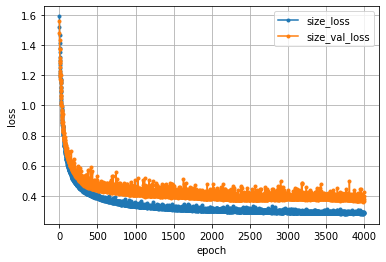

In [6]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [3]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [8]:
# 学習(位置)
epochs = 8000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/8000
8108/8108 [==============================] - 0s 50us/step - loss: 3.1414 - accuracy: 0.0757 - val_loss: 3.0759 - val_accuracy: 0.1080
Epoch 2/8000
8108/8108 [==============================] - 0s 34us/step - loss: 3.0575 - accuracy: 0.1119 - val_loss: 3.0106 - val_accuracy: 0.1219
Epoch 3/8000
8108/8108 [==============================] - 0s 32us/step - loss: 2.9948 - accuracy: 0.1307 - val_loss: 2.9399 - val_accuracy: 0.1465
Epoch 4/8000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9338 - accuracy: 0.1502 - val_loss: 2.8695 - val_accuracy: 0.1667
Epoch 5/8000
8108/8108 [==============================] - 0s 29us/step - loss: 2.8872 - accuracy: 0.1582 - val_loss: 2.8905 - val_accuracy: 0.1465
Epoch 6/8000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8469 - accuracy: 0.1637 - val_loss: 2.7749 - val_accuracy: 0.2309
Epoch 7/8000
8108/8108 [==============================] - 0s 30us/step

8108/8108 [==============================] - 0s 26us/step - loss: 2.1562 - accuracy: 0.3476 - val_loss: 2.1086 - val_accuracy: 0.3606
Epoch 57/8000
8108/8108 [==============================] - 0s 26us/step - loss: 2.1595 - accuracy: 0.3524 - val_loss: 2.1853 - val_accuracy: 0.3246
Epoch 58/8000
8108/8108 [==============================] - 0s 27us/step - loss: 2.1496 - accuracy: 0.3541 - val_loss: 2.0740 - val_accuracy: 0.4036
Epoch 59/8000
8108/8108 [==============================] - 0s 27us/step - loss: 2.1320 - accuracy: 0.3556 - val_loss: 2.0886 - val_accuracy: 0.3897
Epoch 60/8000
8108/8108 [==============================] - 0s 27us/step - loss: 2.1384 - accuracy: 0.3556 - val_loss: 2.1209 - val_accuracy: 0.3370
Epoch 61/8000
8108/8108 [==============================] - 0s 26us/step - loss: 2.1261 - accuracy: 0.3555 - val_loss: 2.1254 - val_accuracy: 0.3271
Epoch 62/8000
8108/8108 [==============================] - 0s 26us/step - loss: 2.1275 - accuracy: 0.3605 - val_loss: 2.0486 -

8108/8108 [==============================] - 0s 31us/step - loss: 1.8553 - accuracy: 0.4071 - val_loss: 1.7775 - val_accuracy: 0.4716
Epoch 167/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8466 - accuracy: 0.4134 - val_loss: 1.7990 - val_accuracy: 0.4233
Epoch 168/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.8076 - accuracy: 0.4297 - val_loss: 1.7837 - val_accuracy: 0.4410
Epoch 169/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8241 - accuracy: 0.4261 - val_loss: 1.8511 - val_accuracy: 0.4420
Epoch 170/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8413 - accuracy: 0.4214 - val_loss: 1.8603 - val_accuracy: 0.3883
Epoch 171/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.8254 - accuracy: 0.4187 - val_loss: 1.8298 - val_accuracy: 0.4297
Epoch 172/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8282 - accuracy: 0.4096 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.7745 - accuracy: 0.4357 - val_loss: 1.7716 - val_accuracy: 0.4642
Epoch 222/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7523 - accuracy: 0.4365 - val_loss: 1.7928 - val_accuracy: 0.4184
Epoch 223/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7591 - accuracy: 0.4392 - val_loss: 1.7543 - val_accuracy: 0.4642
Epoch 224/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7672 - accuracy: 0.4286 - val_loss: 1.7613 - val_accuracy: 0.3947
Epoch 225/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7343 - accuracy: 0.4467 - val_loss: 1.6746 - val_accuracy: 0.4933
Epoch 226/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7671 - accuracy: 0.4414 - val_loss: 1.7682 - val_accuracy: 0.4790
Epoch 227/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7566 - accuracy: 0.4302 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.6812 - accuracy: 0.4552 - val_loss: 1.6447 - val_accuracy: 0.4850
Epoch 277/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6996 - accuracy: 0.4396 - val_loss: 1.7016 - val_accuracy: 0.4356
Epoch 278/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6927 - accuracy: 0.4513 - val_loss: 1.7570 - val_accuracy: 0.4095
Epoch 279/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6960 - accuracy: 0.4478 - val_loss: 1.6737 - val_accuracy: 0.4484
Epoch 280/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6773 - accuracy: 0.4551 - val_loss: 1.6706 - val_accuracy: 0.4563
Epoch 281/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6713 - accuracy: 0.4577 - val_loss: 1.7578 - val_accuracy: 0.4198
Epoch 282/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.6819 - accuracy: 0.4577 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.6428 - accuracy: 0.4540 - val_loss: 1.6398 - val_accuracy: 0.4632
Epoch 332/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6259 - accuracy: 0.4747 - val_loss: 1.5936 - val_accuracy: 0.5052
Epoch 333/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6444 - accuracy: 0.4629 - val_loss: 1.6464 - val_accuracy: 0.4632
Epoch 334/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6655 - accuracy: 0.4577 - val_loss: 1.6722 - val_accuracy: 0.4332
Epoch 335/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6386 - accuracy: 0.4639 - val_loss: 1.6186 - val_accuracy: 0.4869
Epoch 336/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6302 - accuracy: 0.4630 - val_loss: 1.6735 - val_accuracy: 0.4391
Epoch 337/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6180 - accuracy: 0.4718 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.6006 - accuracy: 0.4759 - val_loss: 1.5934 - val_accuracy: 0.4484
Epoch 387/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.6036 - accuracy: 0.4666 - val_loss: 1.6572 - val_accuracy: 0.4435
Epoch 388/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.6020 - accuracy: 0.4726 - val_loss: 1.6024 - val_accuracy: 0.4909
Epoch 389/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6066 - accuracy: 0.4639 - val_loss: 1.5879 - val_accuracy: 0.4859
Epoch 390/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6028 - accuracy: 0.4644 - val_loss: 1.5853 - val_accuracy: 0.4771
Epoch 391/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6327 - accuracy: 0.4600 - val_loss: 1.6079 - val_accuracy: 0.4790
Epoch 392/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6061 - accuracy: 0.4739 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.5775 - accuracy: 0.4746 - val_loss: 1.5748 - val_accuracy: 0.5146
Epoch 442/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5848 - accuracy: 0.4704 - val_loss: 1.6735 - val_accuracy: 0.4840
Epoch 443/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5781 - accuracy: 0.4706 - val_loss: 1.5508 - val_accuracy: 0.4859
Epoch 444/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.5607 - accuracy: 0.4782 - val_loss: 1.6190 - val_accuracy: 0.4435
Epoch 445/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5582 - accuracy: 0.4773 - val_loss: 1.6332 - val_accuracy: 0.4563
Epoch 446/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5420 - accuracy: 0.5036 - val_loss: 1.5223 - val_accuracy: 0.4963
Epoch 447/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5373 - accuracy: 0.4914 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.5402 - accuracy: 0.4783 - val_loss: 1.5886 - val_accuracy: 0.4687
Epoch 497/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5483 - accuracy: 0.4813 - val_loss: 1.5369 - val_accuracy: 0.5249
Epoch 498/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5493 - accuracy: 0.4824 - val_loss: 1.5863 - val_accuracy: 0.4632
Epoch 499/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5315 - accuracy: 0.4861 - val_loss: 1.5436 - val_accuracy: 0.4948
Epoch 500/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5216 - accuracy: 0.4904 - val_loss: 1.5187 - val_accuracy: 0.5195
Epoch 501/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5085 - accuracy: 0.4983 - val_loss: 1.5290 - val_accuracy: 0.5387
Epoch 502/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5202 - accuracy: 0.4882 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4963 - accuracy: 0.4952 - val_loss: 1.4756 - val_accuracy: 0.5067
Epoch 552/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4871 - accuracy: 0.5027 - val_loss: 1.4896 - val_accuracy: 0.5190
Epoch 553/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4817 - accuracy: 0.4967 - val_loss: 1.4760 - val_accuracy: 0.5126
Epoch 554/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5098 - accuracy: 0.4985 - val_loss: 1.5214 - val_accuracy: 0.4692
Epoch 555/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5027 - accuracy: 0.4949 - val_loss: 1.4930 - val_accuracy: 0.5170
Epoch 556/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4963 - accuracy: 0.4979 - val_loss: 1.5173 - val_accuracy: 0.4805
Epoch 557/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4934 - accuracy: 0.5023 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.4703 - accuracy: 0.5065 - val_loss: 1.5356 - val_accuracy: 0.4825
Epoch 607/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4739 - accuracy: 0.5000 - val_loss: 1.4874 - val_accuracy: 0.4914
Epoch 608/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4516 - accuracy: 0.5097 - val_loss: 1.5005 - val_accuracy: 0.5091
Epoch 609/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4808 - accuracy: 0.4994 - val_loss: 1.5164 - val_accuracy: 0.4948
Epoch 610/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4743 - accuracy: 0.5062 - val_loss: 1.5081 - val_accuracy: 0.5081
Epoch 611/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4913 - accuracy: 0.4872 - val_loss: 1.5333 - val_accuracy: 0.4751
Epoch 612/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4454 - accuracy: 0.5116 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.4309 - accuracy: 0.5180 - val_loss: 1.4473 - val_accuracy: 0.5126
Epoch 662/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4271 - accuracy: 0.5085 - val_loss: 1.5189 - val_accuracy: 0.4716
Epoch 663/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4668 - accuracy: 0.5014 - val_loss: 1.5169 - val_accuracy: 0.4978
Epoch 664/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4428 - accuracy: 0.5006 - val_loss: 1.5489 - val_accuracy: 0.4795
Epoch 665/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4512 - accuracy: 0.4988 - val_loss: 1.5178 - val_accuracy: 0.5160
Epoch 666/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4368 - accuracy: 0.5058 - val_loss: 1.4844 - val_accuracy: 0.5141
Epoch 667/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.4417 - accuracy: 0.5089 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4243 - accuracy: 0.5120 - val_loss: 1.4455 - val_accuracy: 0.5190
Epoch 717/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4062 - accuracy: 0.5070 - val_loss: 1.4581 - val_accuracy: 0.5180
Epoch 718/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4210 - accuracy: 0.5155 - val_loss: 1.3991 - val_accuracy: 0.5220
Epoch 719/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4267 - accuracy: 0.5037 - val_loss: 1.4219 - val_accuracy: 0.5560
Epoch 720/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3925 - accuracy: 0.5186 - val_loss: 1.4633 - val_accuracy: 0.5096
Epoch 721/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4287 - accuracy: 0.5096 - val_loss: 1.4342 - val_accuracy: 0.5116
Epoch 722/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4450 - accuracy: 0.5033 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.4027 - accuracy: 0.5178 - val_loss: 1.4506 - val_accuracy: 0.4854
Epoch 772/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4070 - accuracy: 0.5142 - val_loss: 1.5103 - val_accuracy: 0.5037
Epoch 773/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4417 - accuracy: 0.4861 - val_loss: 1.4723 - val_accuracy: 0.4919
Epoch 774/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3866 - accuracy: 0.5222 - val_loss: 1.4222 - val_accuracy: 0.5160
Epoch 775/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3882 - accuracy: 0.5253 - val_loss: 1.4890 - val_accuracy: 0.4840
Epoch 776/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4182 - accuracy: 0.5102 - val_loss: 1.4039 - val_accuracy: 0.5210
Epoch 777/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4060 - accuracy: 0.5170 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.3939 - accuracy: 0.5144 - val_loss: 1.3788 - val_accuracy: 0.4983
Epoch 827/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3761 - accuracy: 0.5233 - val_loss: 1.3939 - val_accuracy: 0.5397
Epoch 828/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3898 - accuracy: 0.5189 - val_loss: 1.4578 - val_accuracy: 0.4825
Epoch 829/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3837 - accuracy: 0.5268 - val_loss: 1.3504 - val_accuracy: 0.5353
Epoch 830/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3805 - accuracy: 0.5275 - val_loss: 1.3850 - val_accuracy: 0.5624
Epoch 831/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3747 - accuracy: 0.5252 - val_loss: 1.4148 - val_accuracy: 0.4780
Epoch 832/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4009 - accuracy: 0.5152 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3637 - accuracy: 0.5332 - val_loss: 1.3892 - val_accuracy: 0.4983
Epoch 882/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3694 - accuracy: 0.5157 - val_loss: 1.4320 - val_accuracy: 0.4899
Epoch 883/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3756 - accuracy: 0.5260 - val_loss: 1.4180 - val_accuracy: 0.4993
Epoch 884/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3774 - accuracy: 0.5253 - val_loss: 1.3574 - val_accuracy: 0.5190
Epoch 885/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3657 - accuracy: 0.5237 - val_loss: 1.4610 - val_accuracy: 0.4909
Epoch 886/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3657 - accuracy: 0.5201 - val_loss: 1.4510 - val_accuracy: 0.5155
Epoch 887/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.3896 - accuracy: 0.5137 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.3591 - accuracy: 0.5229 - val_loss: 1.3452 - val_accuracy: 0.5338
Epoch 937/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3488 - accuracy: 0.5332 - val_loss: 1.3845 - val_accuracy: 0.5298
Epoch 938/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3369 - accuracy: 0.5407 - val_loss: 1.3792 - val_accuracy: 0.5313
Epoch 939/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3253 - accuracy: 0.5406 - val_loss: 1.3970 - val_accuracy: 0.5200
Epoch 940/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3353 - accuracy: 0.5402 - val_loss: 1.4165 - val_accuracy: 0.5096
Epoch 941/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3523 - accuracy: 0.5244 - val_loss: 1.3892 - val_accuracy: 0.5111
Epoch 942/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3718 - accuracy: 0.5213 - val_loss: 1.

8108/8108 [==============================] - 0s 43us/step - loss: 1.3440 - accuracy: 0.5205 - val_loss: 1.4739 - val_accuracy: 0.4815
Epoch 992/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3369 - accuracy: 0.5306 - val_loss: 1.3903 - val_accuracy: 0.5155
Epoch 993/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3224 - accuracy: 0.5477 - val_loss: 1.3963 - val_accuracy: 0.5165
Epoch 994/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3509 - accuracy: 0.5254 - val_loss: 1.3590 - val_accuracy: 0.5313
Epoch 995/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3439 - accuracy: 0.5295 - val_loss: 1.3502 - val_accuracy: 0.5511
Epoch 996/8000
8108/8108 [==============================] - 0s 39us/step - loss: 1.3367 - accuracy: 0.5332 - val_loss: 1.4177 - val_accuracy: 0.5165
Epoch 997/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3628 - accuracy: 0.5278 - val_loss: 1.

Epoch 1046/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3234 - accuracy: 0.5328 - val_loss: 1.3725 - val_accuracy: 0.5812
Epoch 1047/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3016 - accuracy: 0.5495 - val_loss: 1.3742 - val_accuracy: 0.5190
Epoch 1048/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3128 - accuracy: 0.5405 - val_loss: 1.4327 - val_accuracy: 0.4869
Epoch 1049/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3325 - accuracy: 0.5286 - val_loss: 1.3758 - val_accuracy: 0.5338
Epoch 1050/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3158 - accuracy: 0.5371 - val_loss: 1.3918 - val_accuracy: 0.4958
Epoch 1051/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3136 - accuracy: 0.5427 - val_loss: 1.4287 - val_accuracy: 0.5496
Epoch 1052/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.3386 - accuracy:

Epoch 1155/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2987 - accuracy: 0.5492 - val_loss: 1.3783 - val_accuracy: 0.5057
Epoch 1156/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.3043 - accuracy: 0.5380 - val_loss: 1.3934 - val_accuracy: 0.5052
Epoch 1157/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.2821 - accuracy: 0.5520 - val_loss: 1.3949 - val_accuracy: 0.5328
Epoch 1158/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2973 - accuracy: 0.5385 - val_loss: 1.4607 - val_accuracy: 0.5141
Epoch 1159/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2884 - accuracy: 0.5455 - val_loss: 1.3435 - val_accuracy: 0.5244
Epoch 1160/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3092 - accuracy: 0.5393 - val_loss: 1.4105 - val_accuracy: 0.5368
Epoch 1161/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3099 - accuracy:

Epoch 1264/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2526 - accuracy: 0.5593 - val_loss: 1.3837 - val_accuracy: 0.5451
Epoch 1265/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2566 - accuracy: 0.5635 - val_loss: 1.3839 - val_accuracy: 0.5274
Epoch 1266/8000
8108/8108 [==============================] - 0s 54us/step - loss: 1.2614 - accuracy: 0.5629 - val_loss: 1.2967 - val_accuracy: 0.6034
Epoch 1267/8000
8108/8108 [==============================] - 0s 42us/step - loss: 1.2459 - accuracy: 0.5673 - val_loss: 1.3288 - val_accuracy: 0.5274
Epoch 1268/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2689 - accuracy: 0.5498 - val_loss: 1.3150 - val_accuracy: 0.5619
Epoch 1269/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2767 - accuracy: 0.5481 - val_loss: 1.4248 - val_accuracy: 0.4958
Epoch 1270/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2772 - accuracy:

Epoch 1373/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2367 - accuracy: 0.5656 - val_loss: 1.3332 - val_accuracy: 0.5535
Epoch 1374/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2597 - accuracy: 0.5543 - val_loss: 1.3135 - val_accuracy: 0.5244
Epoch 1375/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2550 - accuracy: 0.5541 - val_loss: 1.3137 - val_accuracy: 0.5382
Epoch 1376/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2628 - accuracy: 0.5498 - val_loss: 1.2854 - val_accuracy: 0.5831
Epoch 1377/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2565 - accuracy: 0.5560 - val_loss: 1.3113 - val_accuracy: 0.5412
Epoch 1378/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2387 - accuracy: 0.5654 - val_loss: 1.3457 - val_accuracy: 0.5565
Epoch 1379/8000
8108/8108 [==============================] - 0s 45us/step - loss: 1.2365 - accuracy:

Epoch 1482/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2808 - accuracy: 0.5424 - val_loss: 1.3033 - val_accuracy: 0.5585
Epoch 1483/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2150 - accuracy: 0.5722 - val_loss: 1.4579 - val_accuracy: 0.4756
Epoch 1484/8000
8108/8108 [==============================] - 0s 47us/step - loss: 1.2303 - accuracy: 0.5587 - val_loss: 1.2738 - val_accuracy: 0.5821
Epoch 1485/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.2220 - accuracy: 0.5724 - val_loss: 1.3498 - val_accuracy: 0.5427
Epoch 1486/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2674 - accuracy: 0.5372 - val_loss: 1.3698 - val_accuracy: 0.5525
Epoch 1487/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2453 - accuracy: 0.5553 - val_loss: 1.3199 - val_accuracy: 0.5442
Epoch 1488/8000
8108/8108 [==============================] - 0s 48us/step - loss: 1.2238 - accuracy:

Epoch 1591/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2107 - accuracy: 0.5652 - val_loss: 1.3207 - val_accuracy: 0.5639
Epoch 1592/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2006 - accuracy: 0.5672 - val_loss: 1.3166 - val_accuracy: 0.5437
Epoch 1593/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2080 - accuracy: 0.5714 - val_loss: 1.3690 - val_accuracy: 0.5565
Epoch 1594/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2188 - accuracy: 0.5705 - val_loss: 1.3020 - val_accuracy: 0.5511
Epoch 1595/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2168 - accuracy: 0.5675 - val_loss: 1.3047 - val_accuracy: 0.5836
Epoch 1596/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2238 - accuracy: 0.5685 - val_loss: 1.2624 - val_accuracy: 0.5841
Epoch 1597/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1993 - accuracy:

Epoch 1700/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1965 - accuracy: 0.5741 - val_loss: 1.2816 - val_accuracy: 0.5599
Epoch 1701/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1863 - accuracy: 0.5766 - val_loss: 1.2808 - val_accuracy: 0.5945
Epoch 1702/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1936 - accuracy: 0.5756 - val_loss: 1.3378 - val_accuracy: 0.5466
Epoch 1703/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1956 - accuracy: 0.5779 - val_loss: 1.2790 - val_accuracy: 0.5930
Epoch 1704/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1834 - accuracy: 0.5815 - val_loss: 1.2888 - val_accuracy: 0.5895
Epoch 1705/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1992 - accuracy: 0.5696 - val_loss: 1.2681 - val_accuracy: 0.5999
Epoch 1706/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2052 - accuracy:

Epoch 1809/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1921 - accuracy: 0.5834 - val_loss: 1.2706 - val_accuracy: 0.5807
Epoch 1810/8000
8108/8108 [==============================] - 0s 56us/step - loss: 1.1867 - accuracy: 0.5720 - val_loss: 1.2532 - val_accuracy: 0.5629
Epoch 1811/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1881 - accuracy: 0.5633 - val_loss: 1.2596 - val_accuracy: 0.5807
Epoch 1812/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.1723 - accuracy: 0.5770 - val_loss: 1.2629 - val_accuracy: 0.5728
Epoch 1813/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1711 - accuracy: 0.5798 - val_loss: 1.3001 - val_accuracy: 0.5831
Epoch 1814/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.2252 - accuracy: 0.5623 - val_loss: 1.3242 - val_accuracy: 0.5264
Epoch 1815/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1780 - accuracy:

Epoch 1918/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1828 - accuracy: 0.5729 - val_loss: 1.3087 - val_accuracy: 0.5792
Epoch 1919/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1462 - accuracy: 0.5916 - val_loss: 1.2832 - val_accuracy: 0.5792
Epoch 1920/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1665 - accuracy: 0.5850 - val_loss: 1.2682 - val_accuracy: 0.6019
Epoch 1921/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1547 - accuracy: 0.5872 - val_loss: 1.2668 - val_accuracy: 0.5861
Epoch 1922/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1533 - accuracy: 0.5851 - val_loss: 1.3661 - val_accuracy: 0.5545
Epoch 1923/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1702 - accuracy: 0.5794 - val_loss: 1.2936 - val_accuracy: 0.5708
Epoch 1924/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1769 - accuracy:

Epoch 2027/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1538 - accuracy: 0.5835 - val_loss: 1.2651 - val_accuracy: 0.5807
Epoch 2028/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1759 - accuracy: 0.5699 - val_loss: 1.2641 - val_accuracy: 0.5777
Epoch 2029/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1843 - accuracy: 0.5709 - val_loss: 1.2467 - val_accuracy: 0.5960
Epoch 2030/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1379 - accuracy: 0.5942 - val_loss: 1.2136 - val_accuracy: 0.5940
Epoch 2031/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1377 - accuracy: 0.6040 - val_loss: 1.2478 - val_accuracy: 0.5565
Epoch 2032/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1602 - accuracy: 0.5813 - val_loss: 1.2719 - val_accuracy: 0.5747
Epoch 2033/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1579 - accuracy:

Epoch 2136/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1466 - accuracy: 0.5886 - val_loss: 1.2709 - val_accuracy: 0.5930
Epoch 2137/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1531 - accuracy: 0.5799 - val_loss: 1.2698 - val_accuracy: 0.5881
Epoch 2138/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1695 - accuracy: 0.5745 - val_loss: 1.3657 - val_accuracy: 0.5530
Epoch 2139/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1585 - accuracy: 0.5823 - val_loss: 1.3256 - val_accuracy: 0.5698
Epoch 2140/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1318 - accuracy: 0.5935 - val_loss: 1.2596 - val_accuracy: 0.5812
Epoch 2141/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1429 - accuracy: 0.5863 - val_loss: 1.2552 - val_accuracy: 0.5807
Epoch 2142/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1492 - accuracy:

Epoch 2245/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1098 - accuracy: 0.6056 - val_loss: 1.2352 - val_accuracy: 0.6053
Epoch 2246/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1291 - accuracy: 0.5909 - val_loss: 1.3042 - val_accuracy: 0.5540
Epoch 2247/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1632 - accuracy: 0.5746 - val_loss: 1.2730 - val_accuracy: 0.5614
Epoch 2248/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1213 - accuracy: 0.5988 - val_loss: 1.3197 - val_accuracy: 0.5442
Epoch 2249/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1261 - accuracy: 0.5931 - val_loss: 1.2721 - val_accuracy: 0.6019
Epoch 2250/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1349 - accuracy: 0.5886 - val_loss: 1.2784 - val_accuracy: 0.5742
Epoch 2251/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1272 - accuracy:

Epoch 2354/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1211 - accuracy: 0.5941 - val_loss: 1.2467 - val_accuracy: 0.5772
Epoch 2355/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1143 - accuracy: 0.5910 - val_loss: 1.2191 - val_accuracy: 0.6211
Epoch 2356/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1118 - accuracy: 0.6047 - val_loss: 1.2762 - val_accuracy: 0.5668
Epoch 2357/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1433 - accuracy: 0.5840 - val_loss: 1.2647 - val_accuracy: 0.5851
Epoch 2358/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1226 - accuracy: 0.5905 - val_loss: 1.2323 - val_accuracy: 0.5915
Epoch 2359/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1391 - accuracy: 0.5850 - val_loss: 1.1917 - val_accuracy: 0.6122
Epoch 2360/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1299 - accuracy:

Epoch 2463/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1442 - accuracy: 0.5863 - val_loss: 1.3016 - val_accuracy: 0.6063
Epoch 2464/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1024 - accuracy: 0.6006 - val_loss: 1.2270 - val_accuracy: 0.6354
Epoch 2465/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0907 - accuracy: 0.6111 - val_loss: 1.2332 - val_accuracy: 0.5940
Epoch 2466/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0963 - accuracy: 0.5998 - val_loss: 1.2802 - val_accuracy: 0.5604
Epoch 2467/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1005 - accuracy: 0.5992 - val_loss: 1.2842 - val_accuracy: 0.5757
Epoch 2468/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0937 - accuracy: 0.6035 - val_loss: 1.3267 - val_accuracy: 0.5836
Epoch 2469/8000
8108/8108 [==============================] - 0s 39us/step - loss: 1.1108 - accuracy:

Epoch 2572/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0963 - accuracy: 0.6020 - val_loss: 1.2967 - val_accuracy: 0.5678
Epoch 2573/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1002 - accuracy: 0.6021 - val_loss: 1.3114 - val_accuracy: 0.5688
Epoch 2574/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1172 - accuracy: 0.5873 - val_loss: 1.2584 - val_accuracy: 0.5881
Epoch 2575/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0860 - accuracy: 0.6080 - val_loss: 1.2403 - val_accuracy: 0.6389
Epoch 2576/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0924 - accuracy: 0.5992 - val_loss: 1.2631 - val_accuracy: 0.5910
Epoch 2577/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.1017 - accuracy: 0.6045 - val_loss: 1.2954 - val_accuracy: 0.6117
Epoch 2578/8000
8108/8108 [==============================] - 0s 47us/step - loss: 1.1295 - accuracy:

Epoch 2681/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0852 - accuracy: 0.6072 - val_loss: 1.2763 - val_accuracy: 0.5836
Epoch 2682/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0842 - accuracy: 0.6153 - val_loss: 1.2216 - val_accuracy: 0.6093
Epoch 2683/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0935 - accuracy: 0.6034 - val_loss: 1.2833 - val_accuracy: 0.5950
Epoch 2684/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1195 - accuracy: 0.5914 - val_loss: 1.2390 - val_accuracy: 0.5890
Epoch 2685/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.1081 - accuracy: 0.5882 - val_loss: 1.2585 - val_accuracy: 0.5974
Epoch 2686/8000
8108/8108 [==============================] - 0s 41us/step - loss: 1.1097 - accuracy: 0.6008 - val_loss: 1.2198 - val_accuracy: 0.5876
Epoch 2687/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.1005 - accuracy:

Epoch 2790/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0961 - accuracy: 0.6053 - val_loss: 1.2734 - val_accuracy: 0.5673
Epoch 2791/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1184 - accuracy: 0.5945 - val_loss: 1.2272 - val_accuracy: 0.5984
Epoch 2792/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1309 - accuracy: 0.5777 - val_loss: 1.4270 - val_accuracy: 0.5303
Epoch 2793/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1303 - accuracy: 0.5926 - val_loss: 1.2623 - val_accuracy: 0.6083
Epoch 2794/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0982 - accuracy: 0.6027 - val_loss: 1.2819 - val_accuracy: 0.5728
Epoch 2795/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0705 - accuracy: 0.6133 - val_loss: 1.2198 - val_accuracy: 0.6043
Epoch 2796/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0825 - accuracy:

Epoch 2899/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.0721 - accuracy: 0.6057 - val_loss: 1.2738 - val_accuracy: 0.5580
Epoch 2900/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0834 - accuracy: 0.6035 - val_loss: 1.2676 - val_accuracy: 0.6029
Epoch 2901/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0944 - accuracy: 0.6010 - val_loss: 1.2463 - val_accuracy: 0.5826
Epoch 2902/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0794 - accuracy: 0.6172 - val_loss: 1.2282 - val_accuracy: 0.6043
Epoch 2903/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0570 - accuracy: 0.6167 - val_loss: 1.2634 - val_accuracy: 0.6019
Epoch 2904/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.1013 - accuracy: 0.5989 - val_loss: 1.3826 - val_accuracy: 0.5664
Epoch 2905/8000
8108/8108 [==============================] - 0s 51us/step - loss: 1.0746 - accuracy:

Epoch 3008/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0652 - accuracy: 0.6094 - val_loss: 1.1854 - val_accuracy: 0.6364
Epoch 3009/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0833 - accuracy: 0.6019 - val_loss: 1.2233 - val_accuracy: 0.6068
Epoch 3010/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.0591 - accuracy: 0.6079 - val_loss: 1.2878 - val_accuracy: 0.5673
Epoch 3011/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0642 - accuracy: 0.6053 - val_loss: 1.2347 - val_accuracy: 0.6088
Epoch 3012/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0471 - accuracy: 0.6235 - val_loss: 1.2218 - val_accuracy: 0.5920
Epoch 3013/8000
8108/8108 [==============================] - 0s 48us/step - loss: 1.0672 - accuracy: 0.6087 - val_loss: 1.2609 - val_accuracy: 0.6029
Epoch 3014/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0769 - accuracy:

Epoch 3117/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0515 - accuracy: 0.6148 - val_loss: 1.2480 - val_accuracy: 0.6127
Epoch 3118/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0507 - accuracy: 0.6159 - val_loss: 1.2942 - val_accuracy: 0.5757
Epoch 3119/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0640 - accuracy: 0.6125 - val_loss: 1.2863 - val_accuracy: 0.5757
Epoch 3120/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0693 - accuracy: 0.6116 - val_loss: 1.1968 - val_accuracy: 0.6058
Epoch 3121/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0624 - accuracy: 0.6125 - val_loss: 1.2603 - val_accuracy: 0.5866
Epoch 3122/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0698 - accuracy: 0.6098 - val_loss: 1.2547 - val_accuracy: 0.5861
Epoch 3123/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0377 - accuracy:

Epoch 3226/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0604 - accuracy: 0.6071 - val_loss: 1.2100 - val_accuracy: 0.5955
Epoch 3227/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0731 - accuracy: 0.6153 - val_loss: 1.3018 - val_accuracy: 0.5782
Epoch 3228/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0629 - accuracy: 0.6114 - val_loss: 1.2317 - val_accuracy: 0.6147
Epoch 3229/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0521 - accuracy: 0.6152 - val_loss: 1.2061 - val_accuracy: 0.6482
Epoch 3230/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0715 - accuracy: 0.6101 - val_loss: 1.2820 - val_accuracy: 0.5930
Epoch 3231/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0398 - accuracy: 0.6293 - val_loss: 1.1964 - val_accuracy: 0.6463
Epoch 3232/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0609 - accuracy:

Epoch 3335/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0550 - accuracy: 0.6117 - val_loss: 1.1774 - val_accuracy: 0.6492
Epoch 3336/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0276 - accuracy: 0.6304 - val_loss: 1.2510 - val_accuracy: 0.5974
Epoch 3337/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0396 - accuracy: 0.6221 - val_loss: 1.1963 - val_accuracy: 0.6108
Epoch 3338/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0255 - accuracy: 0.6281 - val_loss: 1.2749 - val_accuracy: 0.5752
Epoch 3339/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0377 - accuracy: 0.6230 - val_loss: 1.2224 - val_accuracy: 0.6098
Epoch 3340/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0354 - accuracy: 0.6337 - val_loss: 1.2071 - val_accuracy: 0.6280
Epoch 3341/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0291 - accuracy:

Epoch 3444/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0399 - accuracy: 0.6204 - val_loss: 1.1921 - val_accuracy: 0.6162
Epoch 3445/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0474 - accuracy: 0.6198 - val_loss: 1.2202 - val_accuracy: 0.6265
Epoch 3446/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0387 - accuracy: 0.6215 - val_loss: 1.1828 - val_accuracy: 0.6172
Epoch 3447/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0389 - accuracy: 0.6223 - val_loss: 1.2184 - val_accuracy: 0.6379
Epoch 3448/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0309 - accuracy: 0.6219 - val_loss: 1.2491 - val_accuracy: 0.5905
Epoch 3449/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0604 - accuracy: 0.6025 - val_loss: 1.2207 - val_accuracy: 0.6127
Epoch 3450/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0475 - accuracy:

Epoch 3553/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0406 - accuracy: 0.6226 - val_loss: 1.2608 - val_accuracy: 0.5851
Epoch 3554/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0683 - accuracy: 0.6082 - val_loss: 1.2797 - val_accuracy: 0.5762
Epoch 3555/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0220 - accuracy: 0.6354 - val_loss: 1.2241 - val_accuracy: 0.5945
Epoch 3556/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0343 - accuracy: 0.6228 - val_loss: 1.1825 - val_accuracy: 0.6478
Epoch 3557/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0323 - accuracy: 0.6221 - val_loss: 1.2839 - val_accuracy: 0.5876
Epoch 3558/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0326 - accuracy: 0.6222 - val_loss: 1.2490 - val_accuracy: 0.5812
Epoch 3559/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0391 - accuracy:

Epoch 3662/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0192 - accuracy: 0.6338 - val_loss: 1.1786 - val_accuracy: 0.6231
Epoch 3663/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0481 - accuracy: 0.6159 - val_loss: 1.1930 - val_accuracy: 0.6137
Epoch 3664/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0175 - accuracy: 0.6264 - val_loss: 1.1833 - val_accuracy: 0.6152
Epoch 3665/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0026 - accuracy: 0.6380 - val_loss: 1.2108 - val_accuracy: 0.6315
Epoch 3666/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0384 - accuracy: 0.6220 - val_loss: 1.2177 - val_accuracy: 0.6103
Epoch 3667/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0278 - accuracy: 0.6215 - val_loss: 1.2889 - val_accuracy: 0.5767
Epoch 3668/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0309 - accuracy:

Epoch 3771/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0236 - accuracy: 0.6286 - val_loss: 1.1954 - val_accuracy: 0.6083
Epoch 3772/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0315 - accuracy: 0.6222 - val_loss: 1.2331 - val_accuracy: 0.5821
Epoch 3773/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0229 - accuracy: 0.6320 - val_loss: 1.1675 - val_accuracy: 0.6182
Epoch 3774/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0519 - accuracy: 0.6108 - val_loss: 1.2743 - val_accuracy: 0.5866
Epoch 3775/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9996 - accuracy: 0.6452 - val_loss: 1.1762 - val_accuracy: 0.6231
Epoch 3776/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0472 - accuracy: 0.6210 - val_loss: 1.1419 - val_accuracy: 0.6818
Epoch 3777/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0080 - accuracy:

Epoch 3880/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0220 - accuracy: 0.6235 - val_loss: 1.1780 - val_accuracy: 0.6093
Epoch 3881/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9996 - accuracy: 0.6317 - val_loss: 1.1574 - val_accuracy: 0.6320
Epoch 3882/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9991 - accuracy: 0.6336 - val_loss: 1.1588 - val_accuracy: 0.6226
Epoch 3883/8000
8108/8108 [==============================] - 0s 42us/step - loss: 1.0061 - accuracy: 0.6330 - val_loss: 1.2058 - val_accuracy: 0.5950
Epoch 3884/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0295 - accuracy: 0.6201 - val_loss: 1.1700 - val_accuracy: 0.6053
Epoch 3885/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0254 - accuracy: 0.6180 - val_loss: 1.1614 - val_accuracy: 0.6068
Epoch 3886/8000
8108/8108 [==============================] - 0s 46us/step - loss: 1.0340 - accuracy:

Epoch 3989/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0297 - accuracy: 0.6169 - val_loss: 1.1642 - val_accuracy: 0.6216
Epoch 3990/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0185 - accuracy: 0.6264 - val_loss: 1.1520 - val_accuracy: 0.5945
Epoch 3991/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9961 - accuracy: 0.6338 - val_loss: 1.1399 - val_accuracy: 0.6191
Epoch 3992/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0265 - accuracy: 0.6201 - val_loss: 1.1805 - val_accuracy: 0.6009
Epoch 3993/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0383 - accuracy: 0.6191 - val_loss: 1.1168 - val_accuracy: 0.6344
Epoch 3994/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9883 - accuracy: 0.6360 - val_loss: 1.1640 - val_accuracy: 0.6285
Epoch 3995/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9949 - accuracy:

Epoch 4098/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0129 - accuracy: 0.6268 - val_loss: 1.1225 - val_accuracy: 0.6334
Epoch 4099/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9917 - accuracy: 0.6401 - val_loss: 1.1403 - val_accuracy: 0.6191
Epoch 4100/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9930 - accuracy: 0.6358 - val_loss: 1.1018 - val_accuracy: 0.6354
Epoch 4101/8000
8108/8108 [==============================] - 0s 47us/step - loss: 0.9840 - accuracy: 0.6369 - val_loss: 1.1287 - val_accuracy: 0.6029
Epoch 4102/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9800 - accuracy: 0.6401 - val_loss: 1.1110 - val_accuracy: 0.6349
Epoch 4103/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9984 - accuracy: 0.6332 - val_loss: 1.2077 - val_accuracy: 0.5974
Epoch 4104/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0116 - accuracy:

Epoch 4207/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0334 - accuracy: 0.6207 - val_loss: 1.1351 - val_accuracy: 0.6132
Epoch 4208/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9928 - accuracy: 0.6310 - val_loss: 1.1678 - val_accuracy: 0.6088
Epoch 4209/8000
8108/8108 [==============================] - 0s 47us/step - loss: 0.9968 - accuracy: 0.6280 - val_loss: 1.1668 - val_accuracy: 0.6369
Epoch 4210/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0070 - accuracy: 0.6256 - val_loss: 1.1729 - val_accuracy: 0.5876
Epoch 4211/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9932 - accuracy: 0.6355 - val_loss: 1.1226 - val_accuracy: 0.6246
Epoch 4212/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0152 - accuracy: 0.6297 - val_loss: 1.2292 - val_accuracy: 0.6048
Epoch 4213/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9959 - accuracy:

Epoch 4316/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9946 - accuracy: 0.6309 - val_loss: 1.1548 - val_accuracy: 0.6246
Epoch 4317/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9932 - accuracy: 0.6422 - val_loss: 1.1464 - val_accuracy: 0.6221
Epoch 4318/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0027 - accuracy: 0.6336 - val_loss: 1.0973 - val_accuracy: 0.6581
Epoch 4319/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9804 - accuracy: 0.6457 - val_loss: 1.1287 - val_accuracy: 0.6206
Epoch 4320/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9854 - accuracy: 0.6285 - val_loss: 1.1315 - val_accuracy: 0.6408
Epoch 4321/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0036 - accuracy: 0.6236 - val_loss: 1.2484 - val_accuracy: 0.5772
Epoch 4322/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9989 - accuracy:

Epoch 4425/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9882 - accuracy: 0.6337 - val_loss: 1.1777 - val_accuracy: 0.5950
Epoch 4426/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9842 - accuracy: 0.6291 - val_loss: 1.1189 - val_accuracy: 0.6251
Epoch 4427/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0030 - accuracy: 0.6312 - val_loss: 1.1615 - val_accuracy: 0.6088
Epoch 4428/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9977 - accuracy: 0.6306 - val_loss: 1.0816 - val_accuracy: 0.6611
Epoch 4429/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9660 - accuracy: 0.6524 - val_loss: 1.0936 - val_accuracy: 0.6394
Epoch 4430/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9798 - accuracy: 0.6437 - val_loss: 1.1173 - val_accuracy: 0.6418
Epoch 4431/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9740 - accuracy:

Epoch 4534/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9894 - accuracy: 0.6376 - val_loss: 1.1582 - val_accuracy: 0.6088
Epoch 4535/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9897 - accuracy: 0.6359 - val_loss: 1.1295 - val_accuracy: 0.6428
Epoch 4536/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0090 - accuracy: 0.6274 - val_loss: 1.1261 - val_accuracy: 0.6211
Epoch 4537/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9707 - accuracy: 0.6513 - val_loss: 1.1730 - val_accuracy: 0.6048
Epoch 4538/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9817 - accuracy: 0.6411 - val_loss: 1.1689 - val_accuracy: 0.6014
Epoch 4539/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9724 - accuracy: 0.6408 - val_loss: 1.0925 - val_accuracy: 0.6270
Epoch 4540/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9681 - accuracy:

Epoch 4643/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9681 - accuracy: 0.6447 - val_loss: 1.1133 - val_accuracy: 0.6561
Epoch 4644/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9734 - accuracy: 0.6425 - val_loss: 1.1514 - val_accuracy: 0.5940
Epoch 4645/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9869 - accuracy: 0.6425 - val_loss: 1.1048 - val_accuracy: 0.6270
Epoch 4646/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9862 - accuracy: 0.6311 - val_loss: 1.1745 - val_accuracy: 0.5886
Epoch 4647/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9524 - accuracy: 0.6495 - val_loss: 1.1434 - val_accuracy: 0.6103
Epoch 4648/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9937 - accuracy: 0.6260 - val_loss: 1.1080 - val_accuracy: 0.6413
Epoch 4649/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9878 - accuracy:

Epoch 4752/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9743 - accuracy: 0.6420 - val_loss: 1.2008 - val_accuracy: 0.5930
Epoch 4753/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9681 - accuracy: 0.6432 - val_loss: 1.1056 - val_accuracy: 0.6162
Epoch 4754/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9579 - accuracy: 0.6471 - val_loss: 1.1054 - val_accuracy: 0.6364
Epoch 4755/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9841 - accuracy: 0.6365 - val_loss: 1.1961 - val_accuracy: 0.5925
Epoch 4756/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9877 - accuracy: 0.6385 - val_loss: 1.1300 - val_accuracy: 0.6305
Epoch 4757/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9684 - accuracy: 0.6485 - val_loss: 1.1044 - val_accuracy: 0.6828
Epoch 4758/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9755 - accuracy:

Epoch 4861/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9744 - accuracy: 0.6444 - val_loss: 1.0789 - val_accuracy: 0.6453
Epoch 4862/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9769 - accuracy: 0.6385 - val_loss: 1.1070 - val_accuracy: 0.6349
Epoch 4863/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9717 - accuracy: 0.6370 - val_loss: 1.0946 - val_accuracy: 0.6650
Epoch 4864/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9850 - accuracy: 0.6312 - val_loss: 1.2292 - val_accuracy: 0.5994
Epoch 4865/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9738 - accuracy: 0.6429 - val_loss: 1.1483 - val_accuracy: 0.6157
Epoch 4866/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9645 - accuracy: 0.6443 - val_loss: 1.1091 - val_accuracy: 0.6394
Epoch 4867/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9540 - accuracy:

Epoch 4970/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9580 - accuracy: 0.6480 - val_loss: 1.0899 - val_accuracy: 0.6384
Epoch 4971/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9702 - accuracy: 0.6396 - val_loss: 1.0722 - val_accuracy: 0.6384
Epoch 4972/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9837 - accuracy: 0.6427 - val_loss: 1.0935 - val_accuracy: 0.6413
Epoch 4973/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9489 - accuracy: 0.6473 - val_loss: 1.0815 - val_accuracy: 0.6443
Epoch 4974/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9506 - accuracy: 0.6501 - val_loss: 1.0866 - val_accuracy: 0.6344
Epoch 4975/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9569 - accuracy: 0.6444 - val_loss: 1.1111 - val_accuracy: 0.6344
Epoch 4976/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9664 - accuracy:

Epoch 5079/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9599 - accuracy: 0.6508 - val_loss: 1.2069 - val_accuracy: 0.5723
Epoch 5080/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9614 - accuracy: 0.6459 - val_loss: 1.1321 - val_accuracy: 0.6093
Epoch 5081/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9501 - accuracy: 0.6519 - val_loss: 1.0688 - val_accuracy: 0.6443
Epoch 5082/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9616 - accuracy: 0.6459 - val_loss: 1.0591 - val_accuracy: 0.6473
Epoch 5083/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9593 - accuracy: 0.6459 - val_loss: 1.1129 - val_accuracy: 0.6310
Epoch 5084/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9592 - accuracy: 0.6518 - val_loss: 1.1279 - val_accuracy: 0.6394
Epoch 5085/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9786 - accuracy:

Epoch 5188/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9576 - accuracy: 0.6449 - val_loss: 1.2219 - val_accuracy: 0.5979
Epoch 5189/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9893 - accuracy: 0.6396 - val_loss: 1.1007 - val_accuracy: 0.6226
Epoch 5190/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9459 - accuracy: 0.6545 - val_loss: 1.1250 - val_accuracy: 0.6290
Epoch 5191/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9602 - accuracy: 0.6457 - val_loss: 1.1475 - val_accuracy: 0.5935
Epoch 5192/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9505 - accuracy: 0.6522 - val_loss: 1.1632 - val_accuracy: 0.6423
Epoch 5193/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9481 - accuracy: 0.6507 - val_loss: 1.0957 - val_accuracy: 0.6364
Epoch 5194/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9446 - accuracy:

Epoch 5297/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9371 - accuracy: 0.6626 - val_loss: 1.0668 - val_accuracy: 0.6270
Epoch 5298/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9569 - accuracy: 0.6417 - val_loss: 1.1080 - val_accuracy: 0.6478
Epoch 5299/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9653 - accuracy: 0.6391 - val_loss: 1.0936 - val_accuracy: 0.6344
Epoch 5300/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9413 - accuracy: 0.6569 - val_loss: 1.0735 - val_accuracy: 0.6364
Epoch 5301/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9481 - accuracy: 0.6491 - val_loss: 1.0607 - val_accuracy: 0.6448
Epoch 5302/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9812 - accuracy: 0.6348 - val_loss: 1.0971 - val_accuracy: 0.6320
Epoch 5303/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9696 - accuracy:

Epoch 5406/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9403 - accuracy: 0.6539 - val_loss: 1.0959 - val_accuracy: 0.6601
Epoch 5407/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9424 - accuracy: 0.6564 - val_loss: 1.0453 - val_accuracy: 0.6537
Epoch 5408/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9525 - accuracy: 0.6515 - val_loss: 1.1383 - val_accuracy: 0.6211
Epoch 5409/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9453 - accuracy: 0.6563 - val_loss: 1.0427 - val_accuracy: 0.6591
Epoch 5410/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9397 - accuracy: 0.6561 - val_loss: 1.0384 - val_accuracy: 0.6492
Epoch 5411/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9534 - accuracy: 0.6443 - val_loss: 1.1071 - val_accuracy: 0.6142
Epoch 5412/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9595 - accuracy:

Epoch 5515/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9215 - accuracy: 0.6658 - val_loss: 1.0221 - val_accuracy: 0.6561
Epoch 5516/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9267 - accuracy: 0.6596 - val_loss: 1.0722 - val_accuracy: 0.6354
Epoch 5517/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9387 - accuracy: 0.6569 - val_loss: 1.0544 - val_accuracy: 0.6606
Epoch 5518/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9381 - accuracy: 0.6563 - val_loss: 1.1284 - val_accuracy: 0.6256
Epoch 5519/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9546 - accuracy: 0.6492 - val_loss: 1.0753 - val_accuracy: 0.6571
Epoch 5520/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9567 - accuracy: 0.6464 - val_loss: 1.0704 - val_accuracy: 0.6418
Epoch 5521/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9624 - accuracy:

Epoch 5624/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9389 - accuracy: 0.6566 - val_loss: 1.1083 - val_accuracy: 0.6433
Epoch 5625/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9475 - accuracy: 0.6499 - val_loss: 1.1320 - val_accuracy: 0.6236
Epoch 5626/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9545 - accuracy: 0.6475 - val_loss: 1.1196 - val_accuracy: 0.6251
Epoch 5627/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9403 - accuracy: 0.6492 - val_loss: 1.1107 - val_accuracy: 0.6404
Epoch 5628/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9460 - accuracy: 0.6508 - val_loss: 1.0538 - val_accuracy: 0.6265
Epoch 5629/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9534 - accuracy: 0.6400 - val_loss: 1.1425 - val_accuracy: 0.6231
Epoch 5630/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9530 - accuracy:

Epoch 5733/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9185 - accuracy: 0.6669 - val_loss: 1.0961 - val_accuracy: 0.6330
Epoch 5734/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9300 - accuracy: 0.6568 - val_loss: 1.1653 - val_accuracy: 0.6073
Epoch 5735/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9258 - accuracy: 0.6566 - val_loss: 1.1150 - val_accuracy: 0.6251
Epoch 5736/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9323 - accuracy: 0.6532 - val_loss: 1.0947 - val_accuracy: 0.6226
Epoch 5737/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9261 - accuracy: 0.6590 - val_loss: 1.0353 - val_accuracy: 0.6783
Epoch 5738/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9341 - accuracy: 0.6556 - val_loss: 1.0702 - val_accuracy: 0.6532
Epoch 5739/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9508 - accuracy:

Epoch 5842/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9562 - accuracy: 0.6512 - val_loss: 1.0775 - val_accuracy: 0.6260
Epoch 5843/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9325 - accuracy: 0.6576 - val_loss: 1.0693 - val_accuracy: 0.6246
Epoch 5844/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9151 - accuracy: 0.6659 - val_loss: 1.1173 - val_accuracy: 0.6458
Epoch 5845/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9232 - accuracy: 0.6550 - val_loss: 1.0898 - val_accuracy: 0.6389
Epoch 5846/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9626 - accuracy: 0.6438 - val_loss: 1.1134 - val_accuracy: 0.6260
Epoch 5847/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9374 - accuracy: 0.6552 - val_loss: 1.1233 - val_accuracy: 0.6443
Epoch 5848/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9358 - accuracy:

Epoch 5951/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9140 - accuracy: 0.6642 - val_loss: 1.0317 - val_accuracy: 0.6547
Epoch 5952/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9315 - accuracy: 0.6574 - val_loss: 1.1336 - val_accuracy: 0.5960
Epoch 5953/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9467 - accuracy: 0.6431 - val_loss: 1.1012 - val_accuracy: 0.6364
Epoch 5954/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9231 - accuracy: 0.6629 - val_loss: 1.0654 - val_accuracy: 0.6458
Epoch 5955/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9263 - accuracy: 0.6581 - val_loss: 1.0761 - val_accuracy: 0.6265
Epoch 5956/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9459 - accuracy: 0.6402 - val_loss: 1.0553 - val_accuracy: 0.6389
Epoch 5957/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9371 - accuracy:

Epoch 6060/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9246 - accuracy: 0.6624 - val_loss: 1.0484 - val_accuracy: 0.6621
Epoch 6061/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9334 - accuracy: 0.6495 - val_loss: 1.0588 - val_accuracy: 0.6404
Epoch 6062/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9380 - accuracy: 0.6474 - val_loss: 1.0620 - val_accuracy: 0.6537
Epoch 6063/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9407 - accuracy: 0.6553 - val_loss: 1.0355 - val_accuracy: 0.6596
Epoch 6064/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9391 - accuracy: 0.6479 - val_loss: 1.0480 - val_accuracy: 0.6556
Epoch 6065/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9158 - accuracy: 0.6598 - val_loss: 1.0595 - val_accuracy: 0.6749
Epoch 6066/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9107 - accuracy:

Epoch 6169/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9525 - accuracy: 0.6421 - val_loss: 1.0395 - val_accuracy: 0.6532
Epoch 6170/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9148 - accuracy: 0.6633 - val_loss: 1.0584 - val_accuracy: 0.6384
Epoch 6171/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9346 - accuracy: 0.6439 - val_loss: 1.1114 - val_accuracy: 0.6157
Epoch 6172/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9281 - accuracy: 0.6499 - val_loss: 1.0353 - val_accuracy: 0.6492
Epoch 6173/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9214 - accuracy: 0.6603 - val_loss: 1.1040 - val_accuracy: 0.6265
Epoch 6174/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9270 - accuracy: 0.6507 - val_loss: 1.0883 - val_accuracy: 0.6542
Epoch 6175/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9366 - accuracy:

Epoch 6278/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9084 - accuracy: 0.6650 - val_loss: 1.0866 - val_accuracy: 0.6399
Epoch 6279/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9180 - accuracy: 0.6528 - val_loss: 1.0792 - val_accuracy: 0.6581
Epoch 6280/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9155 - accuracy: 0.6669 - val_loss: 1.0317 - val_accuracy: 0.6744
Epoch 6281/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9344 - accuracy: 0.6452 - val_loss: 1.0557 - val_accuracy: 0.6542
Epoch 6282/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9125 - accuracy: 0.6621 - val_loss: 1.0217 - val_accuracy: 0.6754
Epoch 6283/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9087 - accuracy: 0.6630 - val_loss: 1.0650 - val_accuracy: 0.6394
Epoch 6284/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9120 - accuracy:

Epoch 6387/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9307 - accuracy: 0.6510 - val_loss: 1.0248 - val_accuracy: 0.6759
Epoch 6388/8000
8108/8108 [==============================] - 0s 50us/step - loss: 0.9141 - accuracy: 0.6651 - val_loss: 1.0602 - val_accuracy: 0.6339
Epoch 6389/8000
8108/8108 [==============================] - 0s 46us/step - loss: 0.9223 - accuracy: 0.6522 - val_loss: 1.0470 - val_accuracy: 0.6586
Epoch 6390/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8989 - accuracy: 0.6684 - val_loss: 1.1000 - val_accuracy: 0.6576
Epoch 6391/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9217 - accuracy: 0.6650 - val_loss: 1.0910 - val_accuracy: 0.6344
Epoch 6392/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9349 - accuracy: 0.6521 - val_loss: 1.0941 - val_accuracy: 0.6478
Epoch 6393/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9285 - accuracy:

Epoch 6496/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9161 - accuracy: 0.6645 - val_loss: 1.0857 - val_accuracy: 0.6399
Epoch 6497/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9091 - accuracy: 0.6573 - val_loss: 1.0834 - val_accuracy: 0.6379
Epoch 6498/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9406 - accuracy: 0.6555 - val_loss: 1.0279 - val_accuracy: 0.6877
Epoch 6499/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9299 - accuracy: 0.6613 - val_loss: 1.0704 - val_accuracy: 0.6492
Epoch 6500/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9088 - accuracy: 0.6629 - val_loss: 1.0554 - val_accuracy: 0.6512
Epoch 6501/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9346 - accuracy: 0.6521 - val_loss: 1.0904 - val_accuracy: 0.6482
Epoch 6502/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9537 - accuracy:

Epoch 6605/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9201 - accuracy: 0.6543 - val_loss: 1.0637 - val_accuracy: 0.6517
Epoch 6606/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9225 - accuracy: 0.6538 - val_loss: 1.0728 - val_accuracy: 0.6774
Epoch 6607/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9144 - accuracy: 0.6686 - val_loss: 1.0465 - val_accuracy: 0.6260
Epoch 6608/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9028 - accuracy: 0.6671 - val_loss: 1.0344 - val_accuracy: 0.6675
Epoch 6609/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9228 - accuracy: 0.6587 - val_loss: 1.0912 - val_accuracy: 0.6640
Epoch 6610/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9135 - accuracy: 0.6650 - val_loss: 1.0521 - val_accuracy: 0.6453
Epoch 6611/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9115 - accuracy:

Epoch 6714/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9029 - accuracy: 0.6706 - val_loss: 1.0494 - val_accuracy: 0.6586
Epoch 6715/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8956 - accuracy: 0.6667 - val_loss: 1.0414 - val_accuracy: 0.6902
Epoch 6716/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8836 - accuracy: 0.6749 - val_loss: 1.0415 - val_accuracy: 0.6448
Epoch 6717/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8966 - accuracy: 0.6732 - val_loss: 1.1610 - val_accuracy: 0.6078
Epoch 6718/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9286 - accuracy: 0.6505 - val_loss: 1.0731 - val_accuracy: 0.6359
Epoch 6719/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9135 - accuracy: 0.6608 - val_loss: 1.2005 - val_accuracy: 0.5856
Epoch 6720/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9069 - accuracy:

Epoch 6823/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8947 - accuracy: 0.6722 - val_loss: 1.0640 - val_accuracy: 0.6616
Epoch 6824/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9017 - accuracy: 0.6621 - val_loss: 1.0525 - val_accuracy: 0.6463
Epoch 6825/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9149 - accuracy: 0.6624 - val_loss: 1.1176 - val_accuracy: 0.6389
Epoch 6826/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9141 - accuracy: 0.6661 - val_loss: 1.0370 - val_accuracy: 0.6542
Epoch 6827/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8866 - accuracy: 0.6732 - val_loss: 1.0897 - val_accuracy: 0.6226
Epoch 6828/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8890 - accuracy: 0.6697 - val_loss: 1.1106 - val_accuracy: 0.6517
Epoch 6829/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9195 - accuracy:

Epoch 6932/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9184 - accuracy: 0.6617 - val_loss: 1.0502 - val_accuracy: 0.6660
Epoch 6933/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9045 - accuracy: 0.6617 - val_loss: 1.0352 - val_accuracy: 0.6616
Epoch 6934/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9015 - accuracy: 0.6655 - val_loss: 1.0696 - val_accuracy: 0.6246
Epoch 6935/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8856 - accuracy: 0.6696 - val_loss: 1.0598 - val_accuracy: 0.6300
Epoch 6936/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8922 - accuracy: 0.6737 - val_loss: 1.0154 - val_accuracy: 0.6487
Epoch 6937/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8807 - accuracy: 0.6799 - val_loss: 1.0724 - val_accuracy: 0.6364
Epoch 6938/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9189 - accuracy:

Epoch 7041/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9007 - accuracy: 0.6576 - val_loss: 1.0304 - val_accuracy: 0.6502
Epoch 7042/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8770 - accuracy: 0.6788 - val_loss: 0.9996 - val_accuracy: 0.6843
Epoch 7043/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9055 - accuracy: 0.6549 - val_loss: 1.0360 - val_accuracy: 0.6596
Epoch 7044/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9037 - accuracy: 0.6592 - val_loss: 1.0888 - val_accuracy: 0.6290
Epoch 7045/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8895 - accuracy: 0.6797 - val_loss: 1.0326 - val_accuracy: 0.6843
Epoch 7046/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8855 - accuracy: 0.6762 - val_loss: 1.0439 - val_accuracy: 0.6616
Epoch 7047/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8918 - accuracy:

Epoch 7150/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9166 - accuracy: 0.6606 - val_loss: 1.0209 - val_accuracy: 0.6601
Epoch 7151/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9022 - accuracy: 0.6581 - val_loss: 1.1015 - val_accuracy: 0.6226
Epoch 7152/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9058 - accuracy: 0.6586 - val_loss: 1.0738 - val_accuracy: 0.6591
Epoch 7153/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8955 - accuracy: 0.6654 - val_loss: 1.0478 - val_accuracy: 0.6680
Epoch 7154/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8958 - accuracy: 0.6656 - val_loss: 0.9987 - val_accuracy: 0.6719
Epoch 7155/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9028 - accuracy: 0.6629 - val_loss: 1.0741 - val_accuracy: 0.6413
Epoch 7156/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9081 - accuracy:

Epoch 7259/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8941 - accuracy: 0.6633 - val_loss: 1.0670 - val_accuracy: 0.6448
Epoch 7260/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9062 - accuracy: 0.6608 - val_loss: 1.0958 - val_accuracy: 0.6260
Epoch 7261/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8864 - accuracy: 0.6732 - val_loss: 1.0499 - val_accuracy: 0.6586
Epoch 7262/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8861 - accuracy: 0.6714 - val_loss: 1.0231 - val_accuracy: 0.6838
Epoch 7263/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8828 - accuracy: 0.6700 - val_loss: 1.0805 - val_accuracy: 0.6478
Epoch 7264/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8852 - accuracy: 0.6712 - val_loss: 1.0752 - val_accuracy: 0.6433
Epoch 7265/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8938 - accuracy:

Epoch 7368/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8766 - accuracy: 0.6759 - val_loss: 1.1351 - val_accuracy: 0.6399
Epoch 7369/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9103 - accuracy: 0.6619 - val_loss: 1.0920 - val_accuracy: 0.6369
Epoch 7370/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8736 - accuracy: 0.6830 - val_loss: 1.0173 - val_accuracy: 0.6561
Epoch 7371/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9020 - accuracy: 0.6647 - val_loss: 1.0444 - val_accuracy: 0.6497
Epoch 7372/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8929 - accuracy: 0.6607 - val_loss: 1.0806 - val_accuracy: 0.6379
Epoch 7373/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8956 - accuracy: 0.6695 - val_loss: 1.0331 - val_accuracy: 0.6843
Epoch 7374/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8777 - accuracy:

Epoch 7477/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8999 - accuracy: 0.6688 - val_loss: 1.0528 - val_accuracy: 0.6650
Epoch 7478/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9022 - accuracy: 0.6595 - val_loss: 1.0051 - val_accuracy: 0.6902
Epoch 7479/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8843 - accuracy: 0.6735 - val_loss: 1.0651 - val_accuracy: 0.6537
Epoch 7480/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8767 - accuracy: 0.6724 - val_loss: 1.0781 - val_accuracy: 0.6310
Epoch 7481/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9086 - accuracy: 0.6639 - val_loss: 1.0311 - val_accuracy: 0.6680
Epoch 7482/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8984 - accuracy: 0.6611 - val_loss: 1.0567 - val_accuracy: 0.6315
Epoch 7483/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8722 - accuracy:

Epoch 7586/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8767 - accuracy: 0.6795 - val_loss: 1.0162 - val_accuracy: 0.6571
Epoch 7587/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8723 - accuracy: 0.6802 - val_loss: 1.0133 - val_accuracy: 0.6571
Epoch 7588/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8717 - accuracy: 0.6756 - val_loss: 1.0564 - val_accuracy: 0.6566
Epoch 7589/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8739 - accuracy: 0.6751 - val_loss: 1.0364 - val_accuracy: 0.6616
Epoch 7590/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8522 - accuracy: 0.6860 - val_loss: 1.0300 - val_accuracy: 0.6591
Epoch 7591/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8976 - accuracy: 0.6656 - val_loss: 1.1430 - val_accuracy: 0.6098
Epoch 7592/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8938 - accuracy:

Epoch 7695/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8583 - accuracy: 0.6840 - val_loss: 1.0293 - val_accuracy: 0.6561
Epoch 7696/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8612 - accuracy: 0.6823 - val_loss: 1.0254 - val_accuracy: 0.6576
Epoch 7697/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9099 - accuracy: 0.6621 - val_loss: 1.0864 - val_accuracy: 0.6280
Epoch 7698/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9006 - accuracy: 0.6748 - val_loss: 1.0202 - val_accuracy: 0.6823
Epoch 7699/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8922 - accuracy: 0.6719 - val_loss: 1.0718 - val_accuracy: 0.6364
Epoch 7700/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8753 - accuracy: 0.6712 - val_loss: 1.0578 - val_accuracy: 0.6537
Epoch 7701/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8828 - accuracy:

Epoch 7804/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8795 - accuracy: 0.6661 - val_loss: 1.0826 - val_accuracy: 0.6468
Epoch 7805/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8697 - accuracy: 0.6820 - val_loss: 1.0123 - val_accuracy: 0.6542
Epoch 7806/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8628 - accuracy: 0.6814 - val_loss: 1.0486 - val_accuracy: 0.6413
Epoch 7807/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8834 - accuracy: 0.6748 - val_loss: 1.0305 - val_accuracy: 0.6532
Epoch 7808/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8634 - accuracy: 0.6733 - val_loss: 1.0313 - val_accuracy: 0.6630
Epoch 7809/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8822 - accuracy: 0.6647 - val_loss: 1.0635 - val_accuracy: 0.6478
Epoch 7810/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8763 - accuracy:

Epoch 7913/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8721 - accuracy: 0.6762 - val_loss: 1.0360 - val_accuracy: 0.6630
Epoch 7914/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8808 - accuracy: 0.6740 - val_loss: 0.9916 - val_accuracy: 0.6680
Epoch 7915/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8880 - accuracy: 0.6706 - val_loss: 1.0316 - val_accuracy: 0.6685
Epoch 7916/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9040 - accuracy: 0.6597 - val_loss: 1.1135 - val_accuracy: 0.6295
Epoch 7917/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8739 - accuracy: 0.6758 - val_loss: 1.0004 - val_accuracy: 0.7040
Epoch 7918/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8682 - accuracy: 0.6808 - val_loss: 0.9976 - val_accuracy: 0.7025
Epoch 7919/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8813 - accuracy:

In [10]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 39us/step
Test loss: 1.023279989300894
Test accuracy: 0.6546620726585388


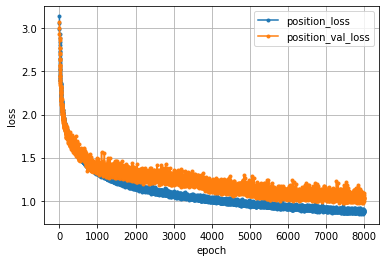

In [11]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [4]:
# 学習(位置)
epochs = 15000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/15000
8108/8108 [==============================] - 1s 115us/step - loss: 3.1586 - accuracy: 0.0734 - val_loss: 3.1070 - val_accuracy: 0.0927
Epoch 2/15000
8108/8108 [==============================] - 0s 36us/step - loss: 3.0646 - accuracy: 0.1089 - val_loss: 3.0341 - val_accuracy: 0.1302
Epoch 3/15000
8108/8108 [==============================] - 0s 32us/step - loss: 3.0007 - accuracy: 0.1358 - val_loss: 2.9722 - val_accuracy: 0.1342
Epoch 4/15000
8108/8108 [==============================] - 0s 33us/step - loss: 2.9394 - accuracy: 0.1511 - val_loss: 2.9156 - val_accuracy: 0.1697
Epoch 5/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8959 - accuracy: 0.1568 - val_loss: 2.8811 - val_accuracy: 0.1406
Epoch 6/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8491 - accuracy: 0.1702 - val_loss: 2.8252 - val_accuracy: 0.1880
Epoch 7/15000
8108/8108 [==============================] - 0s 3

Epoch 56/15000
8108/8108 [==============================] - 0s 33us/step - loss: 2.2150 - accuracy: 0.3192 - val_loss: 2.1662 - val_accuracy: 0.3300
Epoch 57/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.1822 - accuracy: 0.3345 - val_loss: 2.1702 - val_accuracy: 0.2960
Epoch 58/15000
8108/8108 [==============================] - 0s 33us/step - loss: 2.1764 - accuracy: 0.3471 - val_loss: 2.1118 - val_accuracy: 0.3537
Epoch 59/15000
8108/8108 [==============================] - 0s 30us/step - loss: 2.1825 - accuracy: 0.3398 - val_loss: 2.1648 - val_accuracy: 0.3463
Epoch 60/15000
8108/8108 [==============================] - 0s 32us/step - loss: 2.1772 - accuracy: 0.3436 - val_loss: 2.1445 - val_accuracy: 0.3187
Epoch 61/15000
8108/8108 [==============================] - 0s 33us/step - loss: 2.1827 - accuracy: 0.3410 - val_loss: 2.0862 - val_accuracy: 0.3715
Epoch 62/15000
8108/8108 [==============================] - 0s 32us/step - loss: 2.1551 - accuracy: 0.3510

Epoch 111/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.9889 - accuracy: 0.3868 - val_loss: 1.9612 - val_accuracy: 0.3947
Epoch 112/15000
8108/8108 [==============================] - 0s 33us/step - loss: 2.0018 - accuracy: 0.3794 - val_loss: 1.9773 - val_accuracy: 0.3789
Epoch 113/15000
8108/8108 [==============================] - 0s 32us/step - loss: 2.0021 - accuracy: 0.3793 - val_loss: 1.9928 - val_accuracy: 0.3577
Epoch 114/15000
8108/8108 [==============================] - 0s 37us/step - loss: 2.0056 - accuracy: 0.3826 - val_loss: 1.9760 - val_accuracy: 0.3917
Epoch 115/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.9819 - accuracy: 0.3875 - val_loss: 1.9216 - val_accuracy: 0.4060
Epoch 116/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.9788 - accuracy: 0.3927 - val_loss: 1.9211 - val_accuracy: 0.3888
Epoch 117/15000
8108/8108 [==============================] - 0s 34us/step - loss: 2.0067 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.9072 - accuracy: 0.4107 - val_loss: 1.8176 - val_accuracy: 0.4519
Epoch 166/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.8887 - accuracy: 0.4180 - val_loss: 1.8647 - val_accuracy: 0.4223
Epoch 167/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.9002 - accuracy: 0.4049 - val_loss: 1.8026 - val_accuracy: 0.4504
Epoch 168/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.9063 - accuracy: 0.3979 - val_loss: 1.8787 - val_accuracy: 0.4228
Epoch 169/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.9062 - accuracy: 0.4038 - val_loss: 1.7967 - val_accuracy: 0.4070
Epoch 170/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.9004 - accuracy: 0.4038 - val_loss: 1.8425 - val_accuracy: 0.4366
Epoch 171/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.9041 - accuracy: 0.3995 - val_lo

Epoch 220/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.8262 - accuracy: 0.4265 - val_loss: 1.7840 - val_accuracy: 0.4322
Epoch 221/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.8426 - accuracy: 0.4093 - val_loss: 1.8011 - val_accuracy: 0.4460
Epoch 222/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.8172 - accuracy: 0.4362 - val_loss: 1.8347 - val_accuracy: 0.3937
Epoch 223/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.8327 - accuracy: 0.4251 - val_loss: 1.8447 - val_accuracy: 0.4095
Epoch 224/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.8258 - accuracy: 0.4238 - val_loss: 1.8043 - val_accuracy: 0.4322
Epoch 225/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.8147 - accuracy: 0.4264 - val_loss: 1.8350 - val_accuracy: 0.4021
Epoch 226/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.8471 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 1.7822 - accuracy: 0.4278 - val_loss: 1.7287 - val_accuracy: 0.4578
Epoch 275/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7802 - accuracy: 0.4373 - val_loss: 1.6896 - val_accuracy: 0.4756
Epoch 276/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.7722 - accuracy: 0.4354 - val_loss: 1.7709 - val_accuracy: 0.4371
Epoch 277/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.8085 - accuracy: 0.4240 - val_loss: 1.8054 - val_accuracy: 0.4233
Epoch 278/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.8122 - accuracy: 0.4218 - val_loss: 1.7365 - val_accuracy: 0.4346
Epoch 279/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.7814 - accuracy: 0.4346 - val_loss: 1.7426 - val_accuracy: 0.4262
Epoch 280/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.7615 - accuracy: 0.4440 - val_lo

Epoch 329/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7275 - accuracy: 0.4536 - val_loss: 1.7290 - val_accuracy: 0.4277
Epoch 330/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.7534 - accuracy: 0.4302 - val_loss: 1.6635 - val_accuracy: 0.4647
Epoch 331/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.7283 - accuracy: 0.4441 - val_loss: 1.6647 - val_accuracy: 0.4346
Epoch 332/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7167 - accuracy: 0.4571 - val_loss: 1.6946 - val_accuracy: 0.4396
Epoch 333/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.7202 - accuracy: 0.4515 - val_loss: 1.6978 - val_accuracy: 0.4346
Epoch 334/15000
8108/8108 [==============================] - 0s 47us/step - loss: 1.7126 - accuracy: 0.4558 - val_loss: 1.6354 - val_accuracy: 0.4657
Epoch 335/15000
8108/8108 [==============================] - 0s 40us/step - loss: 1.7413 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.6966 - accuracy: 0.4539 - val_loss: 1.6568 - val_accuracy: 0.4213
Epoch 384/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6683 - accuracy: 0.4566 - val_loss: 1.6301 - val_accuracy: 0.4672
Epoch 385/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6837 - accuracy: 0.4560 - val_loss: 1.6638 - val_accuracy: 0.4267
Epoch 386/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6587 - accuracy: 0.4708 - val_loss: 1.6745 - val_accuracy: 0.4539
Epoch 387/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.6702 - accuracy: 0.4613 - val_loss: 1.6424 - val_accuracy: 0.4790
Epoch 388/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6738 - accuracy: 0.4542 - val_loss: 1.6642 - val_accuracy: 0.4401
Epoch 389/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6775 - accuracy: 0.4555 - val_lo

Epoch 438/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6505 - accuracy: 0.4672 - val_loss: 1.6063 - val_accuracy: 0.4697
Epoch 439/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6476 - accuracy: 0.4607 - val_loss: 1.5849 - val_accuracy: 0.4968
Epoch 440/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6771 - accuracy: 0.4412 - val_loss: 1.6503 - val_accuracy: 0.4480
Epoch 441/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6398 - accuracy: 0.4685 - val_loss: 1.6028 - val_accuracy: 0.4282
Epoch 442/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6392 - accuracy: 0.4620 - val_loss: 1.5824 - val_accuracy: 0.4721
Epoch 443/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6337 - accuracy: 0.4671 - val_loss: 1.5689 - val_accuracy: 0.4938
Epoch 444/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6338 - accuracy:

8108/8108 [==============================] - 0s 32us/step - loss: 1.6140 - accuracy: 0.4798 - val_loss: 1.6353 - val_accuracy: 0.4682
Epoch 493/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6154 - accuracy: 0.4740 - val_loss: 1.5518 - val_accuracy: 0.5037
Epoch 494/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6032 - accuracy: 0.4715 - val_loss: 1.5404 - val_accuracy: 0.5007
Epoch 495/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6024 - accuracy: 0.4730 - val_loss: 1.6104 - val_accuracy: 0.4356
Epoch 496/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6042 - accuracy: 0.4656 - val_loss: 1.5306 - val_accuracy: 0.5106
Epoch 497/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6052 - accuracy: 0.4739 - val_loss: 1.6477 - val_accuracy: 0.4642
Epoch 498/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.5972 - accuracy: 0.4736 - val_lo

Epoch 547/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.5890 - accuracy: 0.4693 - val_loss: 1.5274 - val_accuracy: 0.5047
Epoch 548/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.5508 - accuracy: 0.4921 - val_loss: 1.5326 - val_accuracy: 0.4973
Epoch 549/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.5547 - accuracy: 0.4912 - val_loss: 1.5432 - val_accuracy: 0.5224
Epoch 550/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.5595 - accuracy: 0.4868 - val_loss: 1.5020 - val_accuracy: 0.5175
Epoch 551/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5760 - accuracy: 0.4804 - val_loss: 1.5481 - val_accuracy: 0.5279
Epoch 552/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.5615 - accuracy: 0.4937 - val_loss: 1.6076 - val_accuracy: 0.4154
Epoch 553/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.5622 - accuracy:

8108/8108 [==============================] - 0s 38us/step - loss: 1.5615 - accuracy: 0.4764 - val_loss: 1.5528 - val_accuracy: 0.4795
Epoch 602/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.5227 - accuracy: 0.5022 - val_loss: 1.5399 - val_accuracy: 0.4657
Epoch 603/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.5622 - accuracy: 0.4736 - val_loss: 1.4612 - val_accuracy: 0.5274
Epoch 604/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.5069 - accuracy: 0.5115 - val_loss: 1.5133 - val_accuracy: 0.4810
Epoch 605/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5456 - accuracy: 0.4954 - val_loss: 1.4388 - val_accuracy: 0.5377
Epoch 606/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5247 - accuracy: 0.4993 - val_loss: 1.4785 - val_accuracy: 0.5210
Epoch 607/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5318 - accuracy: 0.4883 - val_lo

Epoch 656/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5271 - accuracy: 0.4903 - val_loss: 1.5418 - val_accuracy: 0.4854
Epoch 657/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5503 - accuracy: 0.4796 - val_loss: 1.5396 - val_accuracy: 0.4657
Epoch 658/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5158 - accuracy: 0.4920 - val_loss: 1.4653 - val_accuracy: 0.5308
Epoch 659/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5073 - accuracy: 0.4932 - val_loss: 1.5196 - val_accuracy: 0.4805
Epoch 660/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5150 - accuracy: 0.4882 - val_loss: 1.5145 - val_accuracy: 0.4642
Epoch 661/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5357 - accuracy: 0.4832 - val_loss: 1.4569 - val_accuracy: 0.5239
Epoch 662/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5003 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 1.5044 - accuracy: 0.5056 - val_loss: 1.4755 - val_accuracy: 0.4993
Epoch 711/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5000 - accuracy: 0.4937 - val_loss: 1.4804 - val_accuracy: 0.4771
Epoch 712/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4962 - accuracy: 0.4899 - val_loss: 1.4270 - val_accuracy: 0.5358
Epoch 713/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4869 - accuracy: 0.4951 - val_loss: 1.4670 - val_accuracy: 0.4958
Epoch 714/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4978 - accuracy: 0.4922 - val_loss: 1.5241 - val_accuracy: 0.4874
Epoch 715/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5060 - accuracy: 0.4944 - val_loss: 1.4848 - val_accuracy: 0.4904
Epoch 716/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5040 - accuracy: 0.4977 - val_lo

Epoch 765/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4817 - accuracy: 0.5044 - val_loss: 1.4653 - val_accuracy: 0.4993
Epoch 766/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4778 - accuracy: 0.5062 - val_loss: 1.4573 - val_accuracy: 0.5111
Epoch 767/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4891 - accuracy: 0.4981 - val_loss: 1.4886 - val_accuracy: 0.4721
Epoch 768/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4510 - accuracy: 0.5118 - val_loss: 1.4194 - val_accuracy: 0.5160
Epoch 769/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4655 - accuracy: 0.5032 - val_loss: 1.3998 - val_accuracy: 0.5249
Epoch 770/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4802 - accuracy: 0.5065 - val_loss: 1.4989 - val_accuracy: 0.4825
Epoch 771/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4759 - accuracy:

8108/8108 [==============================] - 0s 34us/step - loss: 1.4601 - accuracy: 0.5081 - val_loss: 1.4737 - val_accuracy: 0.4840
Epoch 820/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.4390 - accuracy: 0.5164 - val_loss: 1.4466 - val_accuracy: 0.4953
Epoch 821/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.4546 - accuracy: 0.5125 - val_loss: 1.4198 - val_accuracy: 0.5027
Epoch 822/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4476 - accuracy: 0.5273 - val_loss: 1.4469 - val_accuracy: 0.4963
Epoch 823/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.4561 - accuracy: 0.5065 - val_loss: 1.4778 - val_accuracy: 0.5012
Epoch 824/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.4857 - accuracy: 0.4944 - val_loss: 1.4250 - val_accuracy: 0.4879
Epoch 825/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.4440 - accuracy: 0.5138 - val_lo

Epoch 874/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4302 - accuracy: 0.5176 - val_loss: 1.4555 - val_accuracy: 0.4963
Epoch 875/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.4526 - accuracy: 0.5101 - val_loss: 1.3719 - val_accuracy: 0.5146
Epoch 876/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.4398 - accuracy: 0.5097 - val_loss: 1.4324 - val_accuracy: 0.4924
Epoch 877/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4232 - accuracy: 0.5089 - val_loss: 1.3602 - val_accuracy: 0.5442
Epoch 878/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4365 - accuracy: 0.5072 - val_loss: 1.4746 - val_accuracy: 0.5101
Epoch 879/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.4545 - accuracy: 0.5067 - val_loss: 1.4451 - val_accuracy: 0.5180
Epoch 880/15000
8108/8108 [==============================] - 0s 40us/step - loss: 1.4389 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.4519 - accuracy: 0.5058 - val_loss: 1.4060 - val_accuracy: 0.5229
Epoch 929/15000
8108/8108 [==============================] - 0s 40us/step - loss: 1.4254 - accuracy: 0.5136 - val_loss: 1.3758 - val_accuracy: 0.5146
Epoch 930/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.4436 - accuracy: 0.5069 - val_loss: 1.4403 - val_accuracy: 0.4958
Epoch 931/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.4180 - accuracy: 0.5201 - val_loss: 1.3660 - val_accuracy: 0.5289
Epoch 932/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3990 - accuracy: 0.5291 - val_loss: 1.3696 - val_accuracy: 0.5229
Epoch 933/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4082 - accuracy: 0.5173 - val_loss: 1.4301 - val_accuracy: 0.5259
Epoch 934/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4229 - accuracy: 0.5091 - val_lo

Epoch 983/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4266 - accuracy: 0.5053 - val_loss: 1.4078 - val_accuracy: 0.5155
Epoch 984/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.4091 - accuracy: 0.5179 - val_loss: 1.3518 - val_accuracy: 0.5205
Epoch 985/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4145 - accuracy: 0.5176 - val_loss: 1.3225 - val_accuracy: 0.5530
Epoch 986/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4065 - accuracy: 0.5173 - val_loss: 1.3235 - val_accuracy: 0.5550
Epoch 987/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4017 - accuracy: 0.5184 - val_loss: 1.3718 - val_accuracy: 0.5229
Epoch 988/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4449 - accuracy: 0.5068 - val_loss: 1.4273 - val_accuracy: 0.4948
Epoch 989/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4151 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 1.3891 - accuracy: 0.5295 - val_loss: 1.3970 - val_accuracy: 0.4983
Epoch 1038/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3800 - accuracy: 0.5329 - val_loss: 1.3989 - val_accuracy: 0.5215
Epoch 1039/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3965 - accuracy: 0.5208 - val_loss: 1.3367 - val_accuracy: 0.5407
Epoch 1040/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3820 - accuracy: 0.5323 - val_loss: 1.3578 - val_accuracy: 0.5200
Epoch 1041/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4008 - accuracy: 0.5143 - val_loss: 1.3819 - val_accuracy: 0.5200
Epoch 1042/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3814 - accuracy: 0.5307 - val_loss: 1.3703 - val_accuracy: 0.5170
Epoch 1043/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4353 - accuracy: 0.5113 - 

8108/8108 [==============================] - 0s 34us/step - loss: 1.3850 - accuracy: 0.5249 - val_loss: 1.3510 - val_accuracy: 0.5289
Epoch 1092/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3786 - accuracy: 0.5264 - val_loss: 1.4103 - val_accuracy: 0.5200
Epoch 1093/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3827 - accuracy: 0.5275 - val_loss: 1.4346 - val_accuracy: 0.4933
Epoch 1094/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3807 - accuracy: 0.5260 - val_loss: 1.4293 - val_accuracy: 0.4963
Epoch 1095/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3993 - accuracy: 0.5261 - val_loss: 1.4363 - val_accuracy: 0.4746
Epoch 1096/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3843 - accuracy: 0.5253 - val_loss: 1.3652 - val_accuracy: 0.5466
Epoch 1097/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3758 - accuracy: 0.5298 - 

8108/8108 [==============================] - 0s 35us/step - loss: 1.3777 - accuracy: 0.5258 - val_loss: 1.4403 - val_accuracy: 0.4948
Epoch 1146/15000
8108/8108 [==============================] - 0s 43us/step - loss: 1.3726 - accuracy: 0.5242 - val_loss: 1.3448 - val_accuracy: 0.5535
Epoch 1147/15000
8108/8108 [==============================] - 0s 42us/step - loss: 1.3597 - accuracy: 0.5405 - val_loss: 1.3051 - val_accuracy: 0.5777
Epoch 1148/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3531 - accuracy: 0.5390 - val_loss: 1.4211 - val_accuracy: 0.5279
Epoch 1149/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3839 - accuracy: 0.5274 - val_loss: 1.4363 - val_accuracy: 0.4697
Epoch 1150/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3643 - accuracy: 0.5255 - val_loss: 1.4204 - val_accuracy: 0.5205
Epoch 1151/15000
8108/8108 [==============================] - 0s 42us/step - loss: 1.3730 - accuracy: 0.5306 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.3368 - accuracy: 0.5401 - val_loss: 1.4353 - val_accuracy: 0.4741
Epoch 1200/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3584 - accuracy: 0.5401 - val_loss: 1.4070 - val_accuracy: 0.4988
Epoch 1201/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.3444 - accuracy: 0.5364 - val_loss: 1.3693 - val_accuracy: 0.5175
Epoch 1202/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3772 - accuracy: 0.5229 - val_loss: 1.3341 - val_accuracy: 0.5146
Epoch 1203/15000
8108/8108 [==============================] - 0s 42us/step - loss: 1.3510 - accuracy: 0.5333 - val_loss: 1.3146 - val_accuracy: 0.5432
Epoch 1204/15000
8108/8108 [==============================] - 0s 40us/step - loss: 1.3483 - accuracy: 0.5422 - val_loss: 1.3626 - val_accuracy: 0.5234
Epoch 1205/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3504 - accuracy: 0.5352 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.3597 - accuracy: 0.5307 - val_loss: 1.3739 - val_accuracy: 0.5052
Epoch 1254/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3743 - accuracy: 0.5289 - val_loss: 1.3035 - val_accuracy: 0.5343
Epoch 1255/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3428 - accuracy: 0.5295 - val_loss: 1.3412 - val_accuracy: 0.5150
Epoch 1256/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3618 - accuracy: 0.5212 - val_loss: 1.4001 - val_accuracy: 0.5032
Epoch 1257/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3717 - accuracy: 0.5215 - val_loss: 1.3958 - val_accuracy: 0.4953
Epoch 1258/15000
8108/8108 [==============================] - 0s 42us/step - loss: 1.3655 - accuracy: 0.5250 - val_loss: 1.3524 - val_accuracy: 0.5259
Epoch 1259/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3526 - accuracy: 0.5342 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.3435 - accuracy: 0.5390 - val_loss: 1.3617 - val_accuracy: 0.5323
Epoch 1308/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3338 - accuracy: 0.5339 - val_loss: 1.3617 - val_accuracy: 0.5007
Epoch 1309/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3369 - accuracy: 0.5305 - val_loss: 1.3407 - val_accuracy: 0.5254
Epoch 1310/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3396 - accuracy: 0.5465 - val_loss: 1.3066 - val_accuracy: 0.5397
Epoch 1311/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3270 - accuracy: 0.5338 - val_loss: 1.3463 - val_accuracy: 0.5387
Epoch 1312/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.3339 - accuracy: 0.5523 - val_loss: 1.4115 - val_accuracy: 0.5298
Epoch 1313/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3322 - accuracy: 0.5428 - 

8108/8108 [==============================] - 0s 46us/step - loss: 1.3186 - accuracy: 0.5502 - val_loss: 1.3860 - val_accuracy: 0.5234
Epoch 1362/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3256 - accuracy: 0.5449 - val_loss: 1.2424 - val_accuracy: 0.5841
Epoch 1363/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3226 - accuracy: 0.5364 - val_loss: 1.3394 - val_accuracy: 0.5363
Epoch 1364/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3192 - accuracy: 0.5400 - val_loss: 1.3336 - val_accuracy: 0.5456
Epoch 1365/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3084 - accuracy: 0.5487 - val_loss: 1.2937 - val_accuracy: 0.5303
Epoch 1366/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3250 - accuracy: 0.5437 - val_loss: 1.3115 - val_accuracy: 0.5353
Epoch 1367/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3156 - accuracy: 0.5472 - 

8108/8108 [==============================] - 0s 39us/step - loss: 1.3293 - accuracy: 0.5308 - val_loss: 1.2642 - val_accuracy: 0.5333
Epoch 1416/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3208 - accuracy: 0.5450 - val_loss: 1.4162 - val_accuracy: 0.4869
Epoch 1417/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3055 - accuracy: 0.5501 - val_loss: 1.3229 - val_accuracy: 0.5353
Epoch 1418/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3066 - accuracy: 0.5429 - val_loss: 1.2941 - val_accuracy: 0.5585
Epoch 1419/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3204 - accuracy: 0.5355 - val_loss: 1.3023 - val_accuracy: 0.5792
Epoch 1420/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3487 - accuracy: 0.5274 - val_loss: 1.4175 - val_accuracy: 0.5150
Epoch 1421/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3317 - accuracy: 0.5448 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.3224 - accuracy: 0.5459 - val_loss: 1.2947 - val_accuracy: 0.5565
Epoch 1470/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3105 - accuracy: 0.5414 - val_loss: 1.2715 - val_accuracy: 0.5673
Epoch 1471/15000
8108/8108 [==============================] - 0s 43us/step - loss: 1.3084 - accuracy: 0.5490 - val_loss: 1.3512 - val_accuracy: 0.5348
Epoch 1472/15000
8108/8108 [==============================] - 0s 40us/step - loss: 1.2966 - accuracy: 0.5471 - val_loss: 1.2982 - val_accuracy: 0.5303
Epoch 1473/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3198 - accuracy: 0.5428 - val_loss: 1.2941 - val_accuracy: 0.5649
Epoch 1474/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3016 - accuracy: 0.5411 - val_loss: 1.3272 - val_accuracy: 0.5294
Epoch 1475/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3091 - accuracy: 0.5507 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.2995 - accuracy: 0.5507 - val_loss: 1.2555 - val_accuracy: 0.5940
Epoch 1524/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3053 - accuracy: 0.5460 - val_loss: 1.2824 - val_accuracy: 0.5713
Epoch 1525/15000
8108/8108 [==============================] - 0s 44us/step - loss: 1.2984 - accuracy: 0.5514 - val_loss: 1.3207 - val_accuracy: 0.5511
Epoch 1526/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3006 - accuracy: 0.5480 - val_loss: 1.2849 - val_accuracy: 0.5387
Epoch 1527/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2885 - accuracy: 0.5623 - val_loss: 1.3275 - val_accuracy: 0.5155
Epoch 1528/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3175 - accuracy: 0.5465 - val_loss: 1.2749 - val_accuracy: 0.5668
Epoch 1529/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3166 - accuracy: 0.5475 - 

8108/8108 [==============================] - 0s 33us/step - loss: 1.3002 - accuracy: 0.5550 - val_loss: 1.2580 - val_accuracy: 0.5496
Epoch 1578/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2918 - accuracy: 0.5495 - val_loss: 1.2366 - val_accuracy: 0.5565
Epoch 1579/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2672 - accuracy: 0.5660 - val_loss: 1.2811 - val_accuracy: 0.5540
Epoch 1580/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.2822 - accuracy: 0.5588 - val_loss: 1.2209 - val_accuracy: 0.5629
Epoch 1581/15000
8108/8108 [==============================] - 0s 42us/step - loss: 1.2721 - accuracy: 0.5620 - val_loss: 1.2635 - val_accuracy: 0.5580
Epoch 1582/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2631 - accuracy: 0.5635 - val_loss: 1.3446 - val_accuracy: 0.5200
Epoch 1583/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2898 - accuracy: 0.5480 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.2850 - accuracy: 0.5514 - val_loss: 1.2436 - val_accuracy: 0.5427
Epoch 1632/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3004 - accuracy: 0.5435 - val_loss: 1.3351 - val_accuracy: 0.5358
Epoch 1633/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2857 - accuracy: 0.5479 - val_loss: 1.2642 - val_accuracy: 0.5540
Epoch 1634/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2590 - accuracy: 0.5644 - val_loss: 1.2713 - val_accuracy: 0.5570
Epoch 1635/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2615 - accuracy: 0.5598 - val_loss: 1.2298 - val_accuracy: 0.5797
Epoch 1636/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3162 - accuracy: 0.5448 - val_loss: 1.2657 - val_accuracy: 0.5348
Epoch 1637/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.2670 - accuracy: 0.5612 - 

8108/8108 [==============================] - 0s 40us/step - loss: 1.2609 - accuracy: 0.5560 - val_loss: 1.2996 - val_accuracy: 0.4983
Epoch 1686/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.2666 - accuracy: 0.5609 - val_loss: 1.2571 - val_accuracy: 0.5619
Epoch 1687/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.2669 - accuracy: 0.5604 - val_loss: 1.2591 - val_accuracy: 0.5442
Epoch 1688/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.2890 - accuracy: 0.5482 - val_loss: 1.3770 - val_accuracy: 0.5190
Epoch 1689/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2952 - accuracy: 0.5538 - val_loss: 1.2894 - val_accuracy: 0.5279
Epoch 1690/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.2624 - accuracy: 0.5567 - val_loss: 1.3124 - val_accuracy: 0.5072
Epoch 1691/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2882 - accuracy: 0.5449 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.2591 - accuracy: 0.5651 - val_loss: 1.2510 - val_accuracy: 0.5984
Epoch 1740/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2745 - accuracy: 0.5613 - val_loss: 1.2507 - val_accuracy: 0.5461
Epoch 1741/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2753 - accuracy: 0.5575 - val_loss: 1.2927 - val_accuracy: 0.5372
Epoch 1742/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2927 - accuracy: 0.5456 - val_loss: 1.2735 - val_accuracy: 0.5451
Epoch 1743/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2825 - accuracy: 0.5528 - val_loss: 1.3075 - val_accuracy: 0.5180
Epoch 1744/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2926 - accuracy: 0.5495 - val_loss: 1.2149 - val_accuracy: 0.5861
Epoch 1745/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2525 - accuracy: 0.5672 - 

8108/8108 [==============================] - 0s 44us/step - loss: 1.2679 - accuracy: 0.5564 - val_loss: 1.1977 - val_accuracy: 0.5787
Epoch 1794/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2561 - accuracy: 0.5556 - val_loss: 1.2124 - val_accuracy: 0.5910
Epoch 1795/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2568 - accuracy: 0.5609 - val_loss: 1.2357 - val_accuracy: 0.5698
Epoch 1796/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.2501 - accuracy: 0.5635 - val_loss: 1.2243 - val_accuracy: 0.5555
Epoch 1797/15000
8108/8108 [==============================] - 0s 50us/step - loss: 1.2426 - accuracy: 0.5681 - val_loss: 1.2936 - val_accuracy: 0.5150
Epoch 1798/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.2416 - accuracy: 0.5697 - val_loss: 1.2480 - val_accuracy: 0.5372
Epoch 1799/15000
8108/8108 [==============================] - 0s 46us/step - loss: 1.2658 - accuracy: 0.5556 - 

8108/8108 [==============================] - 0s 34us/step - loss: 1.2451 - accuracy: 0.5686 - val_loss: 1.2468 - val_accuracy: 0.5471
Epoch 1848/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2274 - accuracy: 0.5715 - val_loss: 1.3046 - val_accuracy: 0.5506
Epoch 1849/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2541 - accuracy: 0.5611 - val_loss: 1.3035 - val_accuracy: 0.5348
Epoch 1850/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2622 - accuracy: 0.5617 - val_loss: 1.2282 - val_accuracy: 0.5654
Epoch 1851/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2617 - accuracy: 0.5535 - val_loss: 1.1931 - val_accuracy: 0.5920
Epoch 1852/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2419 - accuracy: 0.5649 - val_loss: 1.3050 - val_accuracy: 0.5136
Epoch 1853/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2515 - accuracy: 0.5560 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.2494 - accuracy: 0.5607 - val_loss: 1.2041 - val_accuracy: 0.5797
Epoch 1902/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2767 - accuracy: 0.5443 - val_loss: 1.3291 - val_accuracy: 0.5294
Epoch 1903/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2504 - accuracy: 0.5660 - val_loss: 1.2540 - val_accuracy: 0.5353
Epoch 1904/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2373 - accuracy: 0.5618 - val_loss: 1.2194 - val_accuracy: 0.6038
Epoch 1905/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2314 - accuracy: 0.5723 - val_loss: 1.3238 - val_accuracy: 0.5363
Epoch 1906/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2373 - accuracy: 0.5698 - val_loss: 1.2532 - val_accuracy: 0.5703
Epoch 1907/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2582 - accuracy: 0.5618 - 

8108/8108 [==============================] - 0s 35us/step - loss: 1.2341 - accuracy: 0.5688 - val_loss: 1.2046 - val_accuracy: 0.5609
Epoch 1956/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.2412 - accuracy: 0.5599 - val_loss: 1.3039 - val_accuracy: 0.5451
Epoch 1957/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.2556 - accuracy: 0.5583 - val_loss: 1.2231 - val_accuracy: 0.5718
Epoch 1958/15000
8108/8108 [==============================] - 0s 40us/step - loss: 1.2261 - accuracy: 0.5739 - val_loss: 1.1893 - val_accuracy: 0.5895
Epoch 1959/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2284 - accuracy: 0.5682 - val_loss: 1.2145 - val_accuracy: 0.6024
Epoch 1960/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2286 - accuracy: 0.5687 - val_loss: 1.2562 - val_accuracy: 0.5338
Epoch 1961/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2437 - accuracy: 0.5561 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.2155 - accuracy: 0.5751 - val_loss: 1.2524 - val_accuracy: 0.5565
Epoch 2010/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2299 - accuracy: 0.5655 - val_loss: 1.2449 - val_accuracy: 0.5629
Epoch 2011/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2252 - accuracy: 0.5694 - val_loss: 1.1949 - val_accuracy: 0.5733
Epoch 2012/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2135 - accuracy: 0.5741 - val_loss: 1.1927 - val_accuracy: 0.5619
Epoch 2013/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.2244 - accuracy: 0.5650 - val_loss: 1.2528 - val_accuracy: 0.5392
Epoch 2014/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2350 - accuracy: 0.5666 - val_loss: 1.1923 - val_accuracy: 0.5974
Epoch 2015/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2406 - accuracy: 0.5676 - 

8108/8108 [==============================] - 0s 33us/step - loss: 1.2206 - accuracy: 0.5750 - val_loss: 1.2196 - val_accuracy: 0.5708
Epoch 2064/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2150 - accuracy: 0.5757 - val_loss: 1.2673 - val_accuracy: 0.5377
Epoch 2065/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2270 - accuracy: 0.5680 - val_loss: 1.2345 - val_accuracy: 0.5560
Epoch 2066/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2264 - accuracy: 0.5689 - val_loss: 1.2395 - val_accuracy: 0.5757
Epoch 2067/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2442 - accuracy: 0.5598 - val_loss: 1.2086 - val_accuracy: 0.5594
Epoch 2068/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2282 - accuracy: 0.5662 - val_loss: 1.2082 - val_accuracy: 0.5728
Epoch 2069/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2259 - accuracy: 0.5604 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.2129 - accuracy: 0.5685 - val_loss: 1.2383 - val_accuracy: 0.5496
Epoch 2118/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2189 - accuracy: 0.5659 - val_loss: 1.2198 - val_accuracy: 0.5516
Epoch 2119/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2030 - accuracy: 0.5824 - val_loss: 1.2879 - val_accuracy: 0.5752
Epoch 2120/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2296 - accuracy: 0.5629 - val_loss: 1.2017 - val_accuracy: 0.5984
Epoch 2121/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2102 - accuracy: 0.5740 - val_loss: 1.2098 - val_accuracy: 0.5496
Epoch 2122/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2004 - accuracy: 0.5830 - val_loss: 1.2202 - val_accuracy: 0.5649
Epoch 2123/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2222 - accuracy: 0.5735 - 

8108/8108 [==============================] - 0s 40us/step - loss: 1.2214 - accuracy: 0.5709 - val_loss: 1.1678 - val_accuracy: 0.5900
Epoch 2172/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.2207 - accuracy: 0.5720 - val_loss: 1.2765 - val_accuracy: 0.5363
Epoch 2173/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1966 - accuracy: 0.5830 - val_loss: 1.1771 - val_accuracy: 0.5728
Epoch 2174/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2365 - accuracy: 0.5628 - val_loss: 1.2689 - val_accuracy: 0.5417
Epoch 2175/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2250 - accuracy: 0.5570 - val_loss: 1.1890 - val_accuracy: 0.6024
Epoch 2176/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2702 - accuracy: 0.5458 - val_loss: 1.2520 - val_accuracy: 0.5609
Epoch 2177/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2021 - accuracy: 0.5749 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.2114 - accuracy: 0.5599 - val_loss: 1.2143 - val_accuracy: 0.5545
Epoch 2226/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.2143 - accuracy: 0.5697 - val_loss: 1.1578 - val_accuracy: 0.5871
Epoch 2227/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.2084 - accuracy: 0.5710 - val_loss: 1.1922 - val_accuracy: 0.6241
Epoch 2228/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2191 - accuracy: 0.5694 - val_loss: 1.1358 - val_accuracy: 0.6147
Epoch 2229/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.2023 - accuracy: 0.5808 - val_loss: 1.2065 - val_accuracy: 0.5545
Epoch 2230/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2176 - accuracy: 0.5662 - val_loss: 1.1827 - val_accuracy: 0.5831
Epoch 2231/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1897 - accuracy: 0.5799 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.1870 - accuracy: 0.5804 - val_loss: 1.2388 - val_accuracy: 0.5580
Epoch 2280/15000
8108/8108 [==============================] - 0s 47us/step - loss: 1.2072 - accuracy: 0.5698 - val_loss: 1.1870 - val_accuracy: 0.5821
Epoch 2281/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.1855 - accuracy: 0.5815 - val_loss: 1.2273 - val_accuracy: 0.5624
Epoch 2282/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1881 - accuracy: 0.5874 - val_loss: 1.2253 - val_accuracy: 0.5802
Epoch 2283/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1885 - accuracy: 0.5879 - val_loss: 1.1989 - val_accuracy: 0.5792
Epoch 2284/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.1814 - accuracy: 0.5900 - val_loss: 1.1930 - val_accuracy: 0.5525
Epoch 2285/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.2026 - accuracy: 0.5768 - 

8108/8108 [==============================] - 0s 33us/step - loss: 1.1975 - accuracy: 0.5712 - val_loss: 1.1600 - val_accuracy: 0.5777
Epoch 2334/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1768 - accuracy: 0.5879 - val_loss: 1.1623 - val_accuracy: 0.5826
Epoch 2335/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1739 - accuracy: 0.5910 - val_loss: 1.2276 - val_accuracy: 0.5836
Epoch 2336/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1923 - accuracy: 0.5839 - val_loss: 1.2112 - val_accuracy: 0.5708
Epoch 2337/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1901 - accuracy: 0.5851 - val_loss: 1.2262 - val_accuracy: 0.5506
Epoch 2338/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.1945 - accuracy: 0.5793 - val_loss: 1.2012 - val_accuracy: 0.5812
Epoch 2339/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.2030 - accuracy: 0.5718 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.1651 - accuracy: 0.5927 - val_loss: 1.1566 - val_accuracy: 0.5969
Epoch 2388/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1762 - accuracy: 0.5857 - val_loss: 1.1629 - val_accuracy: 0.5861
Epoch 2389/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1966 - accuracy: 0.5826 - val_loss: 1.1852 - val_accuracy: 0.5535
Epoch 2390/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1927 - accuracy: 0.5686 - val_loss: 1.1844 - val_accuracy: 0.5540
Epoch 2391/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1821 - accuracy: 0.5688 - val_loss: 1.1580 - val_accuracy: 0.5678
Epoch 2392/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1677 - accuracy: 0.5879 - val_loss: 1.2140 - val_accuracy: 0.5530
Epoch 2393/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1971 - accuracy: 0.5747 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.2009 - accuracy: 0.5781 - val_loss: 1.1800 - val_accuracy: 0.5841
Epoch 2442/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1743 - accuracy: 0.5816 - val_loss: 1.1798 - val_accuracy: 0.5693
Epoch 2443/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1734 - accuracy: 0.5886 - val_loss: 1.1999 - val_accuracy: 0.5506
Epoch 2444/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1696 - accuracy: 0.5887 - val_loss: 1.1508 - val_accuracy: 0.5812
Epoch 2445/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1785 - accuracy: 0.5814 - val_loss: 1.2261 - val_accuracy: 0.5866
Epoch 2446/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2075 - accuracy: 0.5701 - val_loss: 1.2008 - val_accuracy: 0.5752
Epoch 2447/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1674 - accuracy: 0.5819 - 

8108/8108 [==============================] - 0s 34us/step - loss: 1.1758 - accuracy: 0.5809 - val_loss: 1.1670 - val_accuracy: 0.5881
Epoch 2496/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1625 - accuracy: 0.5853 - val_loss: 1.1933 - val_accuracy: 0.5668
Epoch 2497/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.1830 - accuracy: 0.5731 - val_loss: 1.2470 - val_accuracy: 0.5590
Epoch 2498/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.1805 - accuracy: 0.5856 - val_loss: 1.1338 - val_accuracy: 0.5960
Epoch 2499/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1726 - accuracy: 0.5820 - val_loss: 1.2313 - val_accuracy: 0.5298
Epoch 2500/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1769 - accuracy: 0.5783 - val_loss: 1.1578 - val_accuracy: 0.5920
Epoch 2501/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1664 - accuracy: 0.5857 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.1709 - accuracy: 0.5852 - val_loss: 1.1685 - val_accuracy: 0.5782
Epoch 2550/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.1603 - accuracy: 0.5837 - val_loss: 1.1425 - val_accuracy: 0.5866
Epoch 2551/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1515 - accuracy: 0.6018 - val_loss: 1.2289 - val_accuracy: 0.5678
Epoch 2552/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1560 - accuracy: 0.5923 - val_loss: 1.2004 - val_accuracy: 0.5599
Epoch 2553/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1763 - accuracy: 0.5834 - val_loss: 1.2019 - val_accuracy: 0.5659
Epoch 2554/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2023 - accuracy: 0.5738 - val_loss: 1.2232 - val_accuracy: 0.5476
Epoch 2555/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1678 - accuracy: 0.5878 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.1476 - accuracy: 0.5993 - val_loss: 1.1668 - val_accuracy: 0.5733
Epoch 2604/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1740 - accuracy: 0.5804 - val_loss: 1.1908 - val_accuracy: 0.5733
Epoch 2605/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1598 - accuracy: 0.5932 - val_loss: 1.1636 - val_accuracy: 0.5693
Epoch 2606/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1722 - accuracy: 0.5824 - val_loss: 1.1516 - val_accuracy: 0.5890
Epoch 2607/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1494 - accuracy: 0.5976 - val_loss: 1.1489 - val_accuracy: 0.5964
Epoch 2608/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1645 - accuracy: 0.5865 - val_loss: 1.1739 - val_accuracy: 0.5989
Epoch 2609/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1453 - accuracy: 0.5924 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.1612 - accuracy: 0.5920 - val_loss: 1.1937 - val_accuracy: 0.5752
Epoch 2658/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1519 - accuracy: 0.5973 - val_loss: 1.1641 - val_accuracy: 0.5688
Epoch 2659/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1559 - accuracy: 0.5855 - val_loss: 1.1452 - val_accuracy: 0.5895
Epoch 2660/15000
8108/8108 [==============================] - 0s 48us/step - loss: 1.1435 - accuracy: 0.5939 - val_loss: 1.1865 - val_accuracy: 0.5807
Epoch 2661/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1615 - accuracy: 0.5881 - val_loss: 1.1560 - val_accuracy: 0.5782
Epoch 2662/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1492 - accuracy: 0.5953 - val_loss: 1.2088 - val_accuracy: 0.5481
Epoch 2663/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1655 - accuracy: 0.5853 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1462 - accuracy: 0.5968 - val_loss: 1.1249 - val_accuracy: 0.6073
Epoch 2712/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1544 - accuracy: 0.5836 - val_loss: 1.1389 - val_accuracy: 0.5757
Epoch 2713/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1335 - accuracy: 0.5952 - val_loss: 1.2200 - val_accuracy: 0.5797
Epoch 2714/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1408 - accuracy: 0.5921 - val_loss: 1.1352 - val_accuracy: 0.5895
Epoch 2715/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1454 - accuracy: 0.5895 - val_loss: 1.1610 - val_accuracy: 0.5698
Epoch 2716/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1512 - accuracy: 0.5887 - val_loss: 1.1666 - val_accuracy: 0.5881
Epoch 2717/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1689 - accuracy: 0.5863 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1740 - accuracy: 0.5826 - val_loss: 1.1288 - val_accuracy: 0.5836
Epoch 2766/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1509 - accuracy: 0.5882 - val_loss: 1.1715 - val_accuracy: 0.5782
Epoch 2767/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1222 - accuracy: 0.6101 - val_loss: 1.2348 - val_accuracy: 0.5259
Epoch 2768/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1364 - accuracy: 0.5999 - val_loss: 1.1625 - val_accuracy: 0.5881
Epoch 2769/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1684 - accuracy: 0.5852 - val_loss: 1.1478 - val_accuracy: 0.5910
Epoch 2770/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1555 - accuracy: 0.5831 - val_loss: 1.1588 - val_accuracy: 0.5782
Epoch 2771/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1456 - accuracy: 0.5839 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.1287 - accuracy: 0.5989 - val_loss: 1.1339 - val_accuracy: 0.5792
Epoch 2820/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1337 - accuracy: 0.5918 - val_loss: 1.1910 - val_accuracy: 0.5619
Epoch 2821/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1593 - accuracy: 0.5887 - val_loss: 1.1481 - val_accuracy: 0.5910
Epoch 2822/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1386 - accuracy: 0.5966 - val_loss: 1.2478 - val_accuracy: 0.5565
Epoch 2823/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1658 - accuracy: 0.5868 - val_loss: 1.2002 - val_accuracy: 0.5703
Epoch 2824/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1623 - accuracy: 0.5799 - val_loss: 1.1506 - val_accuracy: 0.5703
Epoch 2825/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1375 - accuracy: 0.5920 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1481 - accuracy: 0.5927 - val_loss: 1.1575 - val_accuracy: 0.5871
Epoch 2874/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1259 - accuracy: 0.5967 - val_loss: 1.1346 - val_accuracy: 0.5738
Epoch 2875/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1440 - accuracy: 0.5950 - val_loss: 1.1940 - val_accuracy: 0.5659
Epoch 2876/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1648 - accuracy: 0.5820 - val_loss: 1.1705 - val_accuracy: 0.5762
Epoch 2877/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1487 - accuracy: 0.5953 - val_loss: 1.1829 - val_accuracy: 0.5797
Epoch 2878/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1334 - accuracy: 0.6031 - val_loss: 1.1766 - val_accuracy: 0.5812
Epoch 2879/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1232 - accuracy: 0.6068 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.1233 - accuracy: 0.5987 - val_loss: 1.1510 - val_accuracy: 0.5960
Epoch 2928/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1477 - accuracy: 0.5914 - val_loss: 1.1593 - val_accuracy: 0.5935
Epoch 2929/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1397 - accuracy: 0.5908 - val_loss: 1.1575 - val_accuracy: 0.5935
Epoch 2930/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1338 - accuracy: 0.5940 - val_loss: 1.1561 - val_accuracy: 0.5964
Epoch 2931/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1433 - accuracy: 0.5879 - val_loss: 1.1593 - val_accuracy: 0.5747
Epoch 2932/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1427 - accuracy: 0.5969 - val_loss: 1.1271 - val_accuracy: 0.5895
Epoch 2933/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1383 - accuracy: 0.5950 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1133 - accuracy: 0.6078 - val_loss: 1.1232 - val_accuracy: 0.6191
Epoch 2982/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1178 - accuracy: 0.6052 - val_loss: 1.1702 - val_accuracy: 0.5782
Epoch 2983/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1234 - accuracy: 0.5977 - val_loss: 1.1378 - val_accuracy: 0.5738
Epoch 2984/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1268 - accuracy: 0.5967 - val_loss: 1.1404 - val_accuracy: 0.5802
Epoch 2985/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1521 - accuracy: 0.5788 - val_loss: 1.1705 - val_accuracy: 0.5802
Epoch 2986/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1251 - accuracy: 0.5957 - val_loss: 1.0906 - val_accuracy: 0.6122
Epoch 2987/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1299 - accuracy: 0.5963 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1411 - accuracy: 0.5914 - val_loss: 1.1271 - val_accuracy: 0.5999
Epoch 3036/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1237 - accuracy: 0.5960 - val_loss: 1.1009 - val_accuracy: 0.6093
Epoch 3037/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1241 - accuracy: 0.5939 - val_loss: 1.0970 - val_accuracy: 0.6142
Epoch 3038/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.1030 - accuracy: 0.6024 - val_loss: 1.1372 - val_accuracy: 0.5876
Epoch 3039/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.1180 - accuracy: 0.6027 - val_loss: 1.1741 - val_accuracy: 0.5634
Epoch 3040/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1237 - accuracy: 0.6006 - val_loss: 1.1567 - val_accuracy: 0.6231
Epoch 3041/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1183 - accuracy: 0.6057 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1242 - accuracy: 0.6011 - val_loss: 1.1260 - val_accuracy: 0.5782
Epoch 3090/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1262 - accuracy: 0.6004 - val_loss: 1.0945 - val_accuracy: 0.6043
Epoch 3091/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1303 - accuracy: 0.5892 - val_loss: 1.1349 - val_accuracy: 0.5871
Epoch 3092/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1176 - accuracy: 0.6016 - val_loss: 1.0714 - val_accuracy: 0.6038
Epoch 3093/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1127 - accuracy: 0.5956 - val_loss: 1.1472 - val_accuracy: 0.5609
Epoch 3094/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1312 - accuracy: 0.5894 - val_loss: 1.1639 - val_accuracy: 0.5955
Epoch 3095/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1203 - accuracy: 0.5977 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1105 - accuracy: 0.5944 - val_loss: 1.0880 - val_accuracy: 0.6093
Epoch 3144/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1242 - accuracy: 0.6020 - val_loss: 1.1340 - val_accuracy: 0.6093
Epoch 3145/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1216 - accuracy: 0.5934 - val_loss: 1.1163 - val_accuracy: 0.5816
Epoch 3146/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1571 - accuracy: 0.5831 - val_loss: 1.1853 - val_accuracy: 0.5876
Epoch 3147/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1114 - accuracy: 0.6036 - val_loss: 1.1160 - val_accuracy: 0.5900
Epoch 3148/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1220 - accuracy: 0.5956 - val_loss: 1.1831 - val_accuracy: 0.5678
Epoch 3149/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0931 - accuracy: 0.6032 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.1170 - accuracy: 0.5999 - val_loss: 1.1336 - val_accuracy: 0.5664
Epoch 3198/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1298 - accuracy: 0.5919 - val_loss: 1.1206 - val_accuracy: 0.5905
Epoch 3199/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1199 - accuracy: 0.5972 - val_loss: 1.0910 - val_accuracy: 0.6034
Epoch 3200/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1292 - accuracy: 0.5944 - val_loss: 1.0958 - val_accuracy: 0.5950
Epoch 3201/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1091 - accuracy: 0.5998 - val_loss: 1.1426 - val_accuracy: 0.5708
Epoch 3202/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1140 - accuracy: 0.6020 - val_loss: 1.1796 - val_accuracy: 0.5792
Epoch 3203/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1243 - accuracy: 0.6036 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.1254 - accuracy: 0.6008 - val_loss: 1.0825 - val_accuracy: 0.6108
Epoch 3252/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1072 - accuracy: 0.6016 - val_loss: 1.1603 - val_accuracy: 0.6043
Epoch 3253/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0998 - accuracy: 0.6034 - val_loss: 1.1071 - val_accuracy: 0.6048
Epoch 3254/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1081 - accuracy: 0.6034 - val_loss: 1.1334 - val_accuracy: 0.5905
Epoch 3255/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1042 - accuracy: 0.6055 - val_loss: 1.1528 - val_accuracy: 0.6177
Epoch 3256/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1083 - accuracy: 0.6106 - val_loss: 1.1505 - val_accuracy: 0.5575
Epoch 3257/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1101 - accuracy: 0.5982 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.0972 - accuracy: 0.6067 - val_loss: 1.1745 - val_accuracy: 0.5570
Epoch 3306/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1083 - accuracy: 0.5951 - val_loss: 1.1009 - val_accuracy: 0.5930
Epoch 3307/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1064 - accuracy: 0.6059 - val_loss: 1.0718 - val_accuracy: 0.6162
Epoch 3308/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0988 - accuracy: 0.6093 - val_loss: 1.1183 - val_accuracy: 0.5777
Epoch 3309/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1063 - accuracy: 0.6040 - val_loss: 1.1222 - val_accuracy: 0.6029
Epoch 3310/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0957 - accuracy: 0.6089 - val_loss: 1.0911 - val_accuracy: 0.6053
Epoch 3311/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0905 - accuracy: 0.6090 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0780 - accuracy: 0.6136 - val_loss: 1.0800 - val_accuracy: 0.6137
Epoch 3360/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1009 - accuracy: 0.6042 - val_loss: 1.1066 - val_accuracy: 0.5895
Epoch 3361/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1131 - accuracy: 0.5998 - val_loss: 1.0975 - val_accuracy: 0.5940
Epoch 3362/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1018 - accuracy: 0.6026 - val_loss: 1.0549 - val_accuracy: 0.6221
Epoch 3363/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1212 - accuracy: 0.5988 - val_loss: 1.1104 - val_accuracy: 0.6078
Epoch 3364/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0863 - accuracy: 0.6089 - val_loss: 1.0549 - val_accuracy: 0.6127
Epoch 3365/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1259 - accuracy: 0.6018 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0892 - accuracy: 0.6083 - val_loss: 1.0714 - val_accuracy: 0.6083
Epoch 3414/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0741 - accuracy: 0.6124 - val_loss: 1.1017 - val_accuracy: 0.6186
Epoch 3415/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0801 - accuracy: 0.6104 - val_loss: 1.0702 - val_accuracy: 0.6157
Epoch 3416/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0736 - accuracy: 0.6115 - val_loss: 1.1055 - val_accuracy: 0.5886
Epoch 3417/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0832 - accuracy: 0.6137 - val_loss: 1.1996 - val_accuracy: 0.5594
Epoch 3418/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1137 - accuracy: 0.6001 - val_loss: 1.0957 - val_accuracy: 0.6167
Epoch 3419/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1058 - accuracy: 0.6048 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0924 - accuracy: 0.6115 - val_loss: 1.0396 - val_accuracy: 0.6330
Epoch 3468/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0873 - accuracy: 0.6117 - val_loss: 1.1171 - val_accuracy: 0.5713
Epoch 3469/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1108 - accuracy: 0.6046 - val_loss: 1.1131 - val_accuracy: 0.5895
Epoch 3470/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0857 - accuracy: 0.6183 - val_loss: 1.1168 - val_accuracy: 0.5742
Epoch 3471/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0926 - accuracy: 0.6117 - val_loss: 1.0731 - val_accuracy: 0.6142
Epoch 3472/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0835 - accuracy: 0.6124 - val_loss: 1.0719 - val_accuracy: 0.6053
Epoch 3473/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1074 - accuracy: 0.5952 - 

8108/8108 [==============================] - 0s 33us/step - loss: 1.0941 - accuracy: 0.6168 - val_loss: 1.0938 - val_accuracy: 0.6014
Epoch 3522/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1064 - accuracy: 0.5992 - val_loss: 1.0705 - val_accuracy: 0.6078
Epoch 3523/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0949 - accuracy: 0.6089 - val_loss: 1.0691 - val_accuracy: 0.6117
Epoch 3524/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0656 - accuracy: 0.6198 - val_loss: 1.0930 - val_accuracy: 0.6093
Epoch 3525/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0793 - accuracy: 0.6156 - val_loss: 1.1240 - val_accuracy: 0.5935
Epoch 3526/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0874 - accuracy: 0.6110 - val_loss: 1.1724 - val_accuracy: 0.5555
Epoch 3527/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1109 - accuracy: 0.5961 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0946 - accuracy: 0.6036 - val_loss: 1.0777 - val_accuracy: 0.5930
Epoch 3576/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0791 - accuracy: 0.6143 - val_loss: 1.1759 - val_accuracy: 0.5619
Epoch 3577/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0917 - accuracy: 0.6072 - val_loss: 1.0844 - val_accuracy: 0.6063
Epoch 3578/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0923 - accuracy: 0.6055 - val_loss: 1.0623 - val_accuracy: 0.6157
Epoch 3579/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0693 - accuracy: 0.6185 - val_loss: 1.0836 - val_accuracy: 0.5974
Epoch 3580/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0738 - accuracy: 0.6126 - val_loss: 1.0847 - val_accuracy: 0.5777
Epoch 3581/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0902 - accuracy: 0.6046 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0792 - accuracy: 0.6114 - val_loss: 1.0902 - val_accuracy: 0.6201
Epoch 3630/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0805 - accuracy: 0.6109 - val_loss: 1.0690 - val_accuracy: 0.6182
Epoch 3631/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0841 - accuracy: 0.6013 - val_loss: 1.1213 - val_accuracy: 0.5816
Epoch 3632/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0841 - accuracy: 0.6145 - val_loss: 1.1882 - val_accuracy: 0.5668
Epoch 3633/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0725 - accuracy: 0.6177 - val_loss: 1.1301 - val_accuracy: 0.6058
Epoch 3634/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0815 - accuracy: 0.6040 - val_loss: 1.0623 - val_accuracy: 0.6038
Epoch 3635/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0632 - accuracy: 0.6159 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0866 - accuracy: 0.6135 - val_loss: 1.0864 - val_accuracy: 0.6246
Epoch 3684/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0897 - accuracy: 0.6075 - val_loss: 1.1198 - val_accuracy: 0.5886
Epoch 3685/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0793 - accuracy: 0.6077 - val_loss: 1.0937 - val_accuracy: 0.6117
Epoch 3686/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0844 - accuracy: 0.6130 - val_loss: 1.0797 - val_accuracy: 0.6112
Epoch 3687/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0535 - accuracy: 0.6211 - val_loss: 1.0706 - val_accuracy: 0.5925
Epoch 3688/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0615 - accuracy: 0.6253 - val_loss: 1.1201 - val_accuracy: 0.6083
Epoch 3689/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0922 - accuracy: 0.6045 - 

8108/8108 [==============================] - 0s 33us/step - loss: 1.0654 - accuracy: 0.6184 - val_loss: 1.0933 - val_accuracy: 0.6093
Epoch 3738/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0681 - accuracy: 0.6156 - val_loss: 1.1552 - val_accuracy: 0.6019
Epoch 3739/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0900 - accuracy: 0.6040 - val_loss: 1.0550 - val_accuracy: 0.6285
Epoch 3740/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0867 - accuracy: 0.6122 - val_loss: 1.0633 - val_accuracy: 0.6038
Epoch 3741/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0672 - accuracy: 0.6196 - val_loss: 1.1019 - val_accuracy: 0.6112
Epoch 3742/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0569 - accuracy: 0.6231 - val_loss: 1.0990 - val_accuracy: 0.6117
Epoch 3743/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0562 - accuracy: 0.6219 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0788 - accuracy: 0.6111 - val_loss: 1.0397 - val_accuracy: 0.6334
Epoch 3792/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0634 - accuracy: 0.6201 - val_loss: 1.0467 - val_accuracy: 0.6246
Epoch 3793/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0741 - accuracy: 0.6133 - val_loss: 1.0939 - val_accuracy: 0.5979
Epoch 3794/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0680 - accuracy: 0.6148 - val_loss: 1.0789 - val_accuracy: 0.6280
Epoch 3795/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0686 - accuracy: 0.6270 - val_loss: 1.1416 - val_accuracy: 0.5506
Epoch 3796/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0832 - accuracy: 0.6056 - val_loss: 1.0611 - val_accuracy: 0.6142
Epoch 3797/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0464 - accuracy: 0.6269 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0900 - accuracy: 0.5983 - val_loss: 1.0594 - val_accuracy: 0.6034
Epoch 3846/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0575 - accuracy: 0.6173 - val_loss: 1.0535 - val_accuracy: 0.6404
Epoch 3847/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0552 - accuracy: 0.6193 - val_loss: 1.0986 - val_accuracy: 0.5994
Epoch 3848/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0567 - accuracy: 0.6259 - val_loss: 1.0984 - val_accuracy: 0.5841
Epoch 3849/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0743 - accuracy: 0.6104 - val_loss: 1.0635 - val_accuracy: 0.6068
Epoch 3850/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0391 - accuracy: 0.6321 - val_loss: 1.0811 - val_accuracy: 0.6221
Epoch 3851/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0614 - accuracy: 0.6222 - 

8108/8108 [==============================] - 0s 33us/step - loss: 1.0572 - accuracy: 0.6196 - val_loss: 1.1311 - val_accuracy: 0.5816
Epoch 3900/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0587 - accuracy: 0.6172 - val_loss: 1.0628 - val_accuracy: 0.6177
Epoch 3901/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0535 - accuracy: 0.6172 - val_loss: 1.0906 - val_accuracy: 0.5925
Epoch 3902/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0599 - accuracy: 0.6161 - val_loss: 1.1568 - val_accuracy: 0.5752
Epoch 3903/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0772 - accuracy: 0.6117 - val_loss: 1.1030 - val_accuracy: 0.6167
Epoch 3904/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0584 - accuracy: 0.6163 - val_loss: 1.1214 - val_accuracy: 0.5792
Epoch 3905/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0535 - accuracy: 0.6207 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0687 - accuracy: 0.6103 - val_loss: 1.1027 - val_accuracy: 0.6088
Epoch 3954/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0428 - accuracy: 0.6279 - val_loss: 1.1003 - val_accuracy: 0.5782
Epoch 3955/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0474 - accuracy: 0.6222 - val_loss: 1.1162 - val_accuracy: 0.5969
Epoch 3956/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0807 - accuracy: 0.6105 - val_loss: 1.0597 - val_accuracy: 0.6068
Epoch 3957/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0530 - accuracy: 0.6182 - val_loss: 1.0436 - val_accuracy: 0.6043
Epoch 3958/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0565 - accuracy: 0.6196 - val_loss: 1.1354 - val_accuracy: 0.6157
Epoch 3959/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0528 - accuracy: 0.6232 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0375 - accuracy: 0.6339 - val_loss: 1.0418 - val_accuracy: 0.6379
Epoch 4008/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0618 - accuracy: 0.6158 - val_loss: 1.0924 - val_accuracy: 0.6117
Epoch 4009/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0287 - accuracy: 0.6327 - val_loss: 1.0222 - val_accuracy: 0.6196
Epoch 4010/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0580 - accuracy: 0.6201 - val_loss: 1.0398 - val_accuracy: 0.6226
Epoch 4011/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0682 - accuracy: 0.6131 - val_loss: 1.0418 - val_accuracy: 0.6325
Epoch 4012/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0355 - accuracy: 0.6272 - val_loss: 1.0718 - val_accuracy: 0.6073
Epoch 4013/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0594 - accuracy: 0.6133 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0522 - accuracy: 0.6249 - val_loss: 1.0810 - val_accuracy: 0.6122
Epoch 4062/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0320 - accuracy: 0.6278 - val_loss: 1.0369 - val_accuracy: 0.6315
Epoch 4063/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0457 - accuracy: 0.6290 - val_loss: 1.0850 - val_accuracy: 0.5920
Epoch 4064/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0184 - accuracy: 0.6444 - val_loss: 1.0109 - val_accuracy: 0.6581
Epoch 4065/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0425 - accuracy: 0.6304 - val_loss: 1.0865 - val_accuracy: 0.5969
Epoch 4066/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0530 - accuracy: 0.6193 - val_loss: 1.0462 - val_accuracy: 0.6260
Epoch 4067/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0447 - accuracy: 0.6232 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0521 - accuracy: 0.6170 - val_loss: 1.1067 - val_accuracy: 0.5767
Epoch 4116/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0689 - accuracy: 0.6059 - val_loss: 1.1179 - val_accuracy: 0.5708
Epoch 4117/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0445 - accuracy: 0.6244 - val_loss: 1.0320 - val_accuracy: 0.6566
Epoch 4118/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0460 - accuracy: 0.6214 - val_loss: 1.0914 - val_accuracy: 0.6034
Epoch 4119/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0624 - accuracy: 0.6191 - val_loss: 1.0751 - val_accuracy: 0.5979
Epoch 4120/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0421 - accuracy: 0.6219 - val_loss: 1.1031 - val_accuracy: 0.6088
Epoch 4121/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0471 - accuracy: 0.6256 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0307 - accuracy: 0.6347 - val_loss: 1.0302 - val_accuracy: 0.6221
Epoch 4170/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0439 - accuracy: 0.6242 - val_loss: 1.0426 - val_accuracy: 0.6112
Epoch 4171/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0337 - accuracy: 0.6310 - val_loss: 1.0281 - val_accuracy: 0.6404
Epoch 4172/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0389 - accuracy: 0.6209 - val_loss: 1.0878 - val_accuracy: 0.6142
Epoch 4173/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0428 - accuracy: 0.6204 - val_loss: 1.0701 - val_accuracy: 0.6122
Epoch 4174/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0492 - accuracy: 0.6221 - val_loss: 1.0504 - val_accuracy: 0.6142
Epoch 4175/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0560 - accuracy: 0.6201 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.0372 - accuracy: 0.6180 - val_loss: 1.0657 - val_accuracy: 0.6275
Epoch 4224/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0562 - accuracy: 0.6156 - val_loss: 1.1161 - val_accuracy: 0.5752
Epoch 4225/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0512 - accuracy: 0.6219 - val_loss: 1.1279 - val_accuracy: 0.5960
Epoch 4226/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0194 - accuracy: 0.6389 - val_loss: 0.9911 - val_accuracy: 0.6591
Epoch 4227/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0393 - accuracy: 0.6230 - val_loss: 1.0869 - val_accuracy: 0.6073
Epoch 4228/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0456 - accuracy: 0.6190 - val_loss: 1.0582 - val_accuracy: 0.6152
Epoch 4229/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0269 - accuracy: 0.6334 - 

8108/8108 [==============================] - 0s 52us/step - loss: 1.0303 - accuracy: 0.6320 - val_loss: 1.0732 - val_accuracy: 0.6122
Epoch 4278/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0350 - accuracy: 0.6263 - val_loss: 1.1315 - val_accuracy: 0.5940
Epoch 4279/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0812 - accuracy: 0.6020 - val_loss: 1.0927 - val_accuracy: 0.5935
Epoch 4280/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0307 - accuracy: 0.6318 - val_loss: 1.0501 - val_accuracy: 0.6132
Epoch 4281/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0523 - accuracy: 0.6188 - val_loss: 1.0672 - val_accuracy: 0.6024
Epoch 4282/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0401 - accuracy: 0.6230 - val_loss: 1.0615 - val_accuracy: 0.5994
Epoch 4283/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0463 - accuracy: 0.6207 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0499 - accuracy: 0.6191 - val_loss: 1.0871 - val_accuracy: 0.6127
Epoch 4332/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0463 - accuracy: 0.6283 - val_loss: 1.0756 - val_accuracy: 0.6004
Epoch 4333/15000
8108/8108 [==============================] - 0s 52us/step - loss: 1.0310 - accuracy: 0.6269 - val_loss: 1.0782 - val_accuracy: 0.5886
Epoch 4334/15000
8108/8108 [==============================] - 0s 42us/step - loss: 1.0487 - accuracy: 0.6225 - val_loss: 1.0434 - val_accuracy: 0.6285
Epoch 4335/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.0331 - accuracy: 0.6314 - val_loss: 1.1452 - val_accuracy: 0.6038
Epoch 4336/15000
8108/8108 [==============================] - 0s 42us/step - loss: 1.0462 - accuracy: 0.6241 - val_loss: 1.0220 - val_accuracy: 0.6256
Epoch 4337/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0253 - accuracy: 0.6252 - 

8108/8108 [==============================] - 0s 31us/step - loss: 1.0527 - accuracy: 0.6204 - val_loss: 1.0921 - val_accuracy: 0.5836
Epoch 4386/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0252 - accuracy: 0.6322 - val_loss: 1.0261 - val_accuracy: 0.6246
Epoch 4387/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0451 - accuracy: 0.6211 - val_loss: 1.0940 - val_accuracy: 0.5989
Epoch 4388/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0383 - accuracy: 0.6260 - val_loss: 1.0498 - val_accuracy: 0.6275
Epoch 4389/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0566 - accuracy: 0.6138 - val_loss: 1.0932 - val_accuracy: 0.6191
Epoch 4390/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0735 - accuracy: 0.6142 - val_loss: 1.0302 - val_accuracy: 0.6320
Epoch 4391/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0260 - accuracy: 0.6248 - 

8108/8108 [==============================] - 0s 33us/step - loss: 1.0148 - accuracy: 0.6351 - val_loss: 1.0119 - val_accuracy: 0.6428
Epoch 4440/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0486 - accuracy: 0.6200 - val_loss: 1.1125 - val_accuracy: 0.6068
Epoch 4441/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0295 - accuracy: 0.6281 - val_loss: 1.0705 - val_accuracy: 0.6024
Epoch 4442/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0632 - accuracy: 0.6148 - val_loss: 1.0596 - val_accuracy: 0.6206
Epoch 4443/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0324 - accuracy: 0.6295 - val_loss: 1.0121 - val_accuracy: 0.6576
Epoch 4444/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0261 - accuracy: 0.6212 - val_loss: 1.0426 - val_accuracy: 0.6034
Epoch 4445/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0400 - accuracy: 0.6147 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0515 - accuracy: 0.6217 - val_loss: 1.1277 - val_accuracy: 0.6127
Epoch 4494/15000
8108/8108 [==============================] - 0s 39us/step - loss: 1.0482 - accuracy: 0.6179 - val_loss: 1.0240 - val_accuracy: 0.6127
Epoch 4495/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0099 - accuracy: 0.6332 - val_loss: 1.0350 - val_accuracy: 0.6354
Epoch 4496/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0216 - accuracy: 0.6302 - val_loss: 1.0640 - val_accuracy: 0.5841
Epoch 4497/15000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0106 - accuracy: 0.6323 - val_loss: 1.0187 - val_accuracy: 0.6399
Epoch 4498/15000
8108/8108 [==============================] - 0s 48us/step - loss: 1.0584 - accuracy: 0.6167 - val_loss: 1.0112 - val_accuracy: 0.6438
Epoch 4499/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0220 - accuracy: 0.6325 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.0411 - accuracy: 0.6182 - val_loss: 1.0617 - val_accuracy: 0.6256
Epoch 4548/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0295 - accuracy: 0.6264 - val_loss: 1.0185 - val_accuracy: 0.6186
Epoch 4549/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0274 - accuracy: 0.6232 - val_loss: 1.0901 - val_accuracy: 0.6167
Epoch 4550/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0266 - accuracy: 0.6268 - val_loss: 1.0604 - val_accuracy: 0.6127
Epoch 4551/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0170 - accuracy: 0.6300 - val_loss: 1.0449 - val_accuracy: 0.6251
Epoch 4552/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0257 - accuracy: 0.6270 - val_loss: 1.0572 - val_accuracy: 0.6216
Epoch 4553/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0518 - accuracy: 0.6195 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0253 - accuracy: 0.6280 - val_loss: 1.0409 - val_accuracy: 0.6182
Epoch 4602/15000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0315 - accuracy: 0.6221 - val_loss: 1.0641 - val_accuracy: 0.6117
Epoch 4603/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0427 - accuracy: 0.6179 - val_loss: 1.0899 - val_accuracy: 0.5979
Epoch 4604/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0126 - accuracy: 0.6355 - val_loss: 1.1327 - val_accuracy: 0.5915
Epoch 4605/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0369 - accuracy: 0.6207 - val_loss: 1.0631 - val_accuracy: 0.6157
Epoch 4606/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0255 - accuracy: 0.6281 - val_loss: 1.0189 - val_accuracy: 0.6497
Epoch 4607/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0262 - accuracy: 0.6334 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0130 - accuracy: 0.6305 - val_loss: 1.0720 - val_accuracy: 0.5964
Epoch 4656/15000
8108/8108 [==============================] - 0s 41us/step - loss: 1.0054 - accuracy: 0.6417 - val_loss: 1.0096 - val_accuracy: 0.6586
Epoch 4657/15000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0039 - accuracy: 0.6421 - val_loss: 1.0694 - val_accuracy: 0.5851
Epoch 4658/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0176 - accuracy: 0.6311 - val_loss: 1.0467 - val_accuracy: 0.6349
Epoch 4659/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0224 - accuracy: 0.6260 - val_loss: 1.0935 - val_accuracy: 0.5846
Epoch 4660/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0285 - accuracy: 0.6201 - val_loss: 1.0568 - val_accuracy: 0.6344
Epoch 4661/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0295 - accuracy: 0.6258 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.0122 - accuracy: 0.6338 - val_loss: 1.0489 - val_accuracy: 0.6098
Epoch 4710/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0274 - accuracy: 0.6333 - val_loss: 1.0835 - val_accuracy: 0.5797
Epoch 4711/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0191 - accuracy: 0.6278 - val_loss: 1.0486 - val_accuracy: 0.6048
Epoch 4712/15000
8108/8108 [==============================] - 0s 40us/step - loss: 1.0403 - accuracy: 0.6168 - val_loss: 1.1207 - val_accuracy: 0.6162
Epoch 4713/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0434 - accuracy: 0.6146 - val_loss: 1.0781 - val_accuracy: 0.6186
Epoch 4714/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0363 - accuracy: 0.6339 - val_loss: 1.0686 - val_accuracy: 0.6132
Epoch 4715/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0364 - accuracy: 0.6268 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0051 - accuracy: 0.6320 - val_loss: 1.1027 - val_accuracy: 0.6063
Epoch 4764/15000
8108/8108 [==============================] - 0s 27us/step - loss: 1.0186 - accuracy: 0.6295 - val_loss: 1.0378 - val_accuracy: 0.5994
Epoch 4765/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0298 - accuracy: 0.6310 - val_loss: 1.1271 - val_accuracy: 0.5836
Epoch 4766/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0205 - accuracy: 0.6257 - val_loss: 1.0848 - val_accuracy: 0.6157
Epoch 4767/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0245 - accuracy: 0.6272 - val_loss: 1.0184 - val_accuracy: 0.6251
Epoch 4768/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0327 - accuracy: 0.6249 - val_loss: 1.0886 - val_accuracy: 0.6083
Epoch 4769/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0270 - accuracy: 0.6231 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.0009 - accuracy: 0.6349 - val_loss: 1.0283 - val_accuracy: 0.6260
Epoch 4818/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0001 - accuracy: 0.6395 - val_loss: 1.0701 - val_accuracy: 0.6009
Epoch 4819/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9920 - accuracy: 0.6432 - val_loss: 1.0242 - val_accuracy: 0.6034
Epoch 4820/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0184 - accuracy: 0.6291 - val_loss: 1.0867 - val_accuracy: 0.6231
Epoch 4821/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0091 - accuracy: 0.6254 - val_loss: 1.0058 - val_accuracy: 0.6482
Epoch 4822/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0029 - accuracy: 0.6358 - val_loss: 1.1032 - val_accuracy: 0.6349
Epoch 4823/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9902 - accuracy: 0.6423 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0227 - accuracy: 0.6247 - val_loss: 0.9829 - val_accuracy: 0.6764
Epoch 4872/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0206 - accuracy: 0.6235 - val_loss: 1.0911 - val_accuracy: 0.6029
Epoch 4873/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0148 - accuracy: 0.6312 - val_loss: 1.0830 - val_accuracy: 0.6191
Epoch 4874/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0070 - accuracy: 0.6331 - val_loss: 1.0491 - val_accuracy: 0.6186
Epoch 4875/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0359 - accuracy: 0.6253 - val_loss: 1.0157 - val_accuracy: 0.6344
Epoch 4876/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0091 - accuracy: 0.6330 - val_loss: 1.0459 - val_accuracy: 0.6009
Epoch 4877/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0194 - accuracy: 0.6267 - 

8108/8108 [==============================] - 0s 32us/step - loss: 1.0164 - accuracy: 0.6301 - val_loss: 1.0767 - val_accuracy: 0.5866
Epoch 4926/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0449 - accuracy: 0.6214 - val_loss: 1.0186 - val_accuracy: 0.6389
Epoch 4927/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0368 - accuracy: 0.6263 - val_loss: 1.0525 - val_accuracy: 0.6142
Epoch 4928/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0034 - accuracy: 0.6293 - val_loss: 0.9869 - val_accuracy: 0.6497
Epoch 4929/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9937 - accuracy: 0.6399 - val_loss: 1.0090 - val_accuracy: 0.6423
Epoch 4930/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0235 - accuracy: 0.6278 - val_loss: 1.1038 - val_accuracy: 0.5831
Epoch 4931/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9969 - accuracy: 0.6406 - 

8108/8108 [==============================] - 0s 33us/step - loss: 1.0008 - accuracy: 0.6374 - val_loss: 1.0071 - val_accuracy: 0.6473
Epoch 4980/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0457 - accuracy: 0.6260 - val_loss: 1.0830 - val_accuracy: 0.5876
Epoch 4981/15000
8108/8108 [==============================] - 0s 40us/step - loss: 1.0070 - accuracy: 0.6349 - val_loss: 0.9795 - val_accuracy: 0.6517
Epoch 4982/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9753 - accuracy: 0.6576 - val_loss: 1.0606 - val_accuracy: 0.5886
Epoch 4983/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0138 - accuracy: 0.6343 - val_loss: 1.0024 - val_accuracy: 0.6270
Epoch 4984/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0169 - accuracy: 0.6295 - val_loss: 0.9857 - val_accuracy: 0.6310
Epoch 4985/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0005 - accuracy: 0.6425 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9973 - accuracy: 0.6454 - val_loss: 1.0349 - val_accuracy: 0.6423
Epoch 5034/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0207 - accuracy: 0.6279 - val_loss: 0.9778 - val_accuracy: 0.6507
Epoch 5035/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0251 - accuracy: 0.6136 - val_loss: 1.0884 - val_accuracy: 0.5984
Epoch 5036/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9987 - accuracy: 0.6331 - val_loss: 1.0488 - val_accuracy: 0.6034
Epoch 5037/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0024 - accuracy: 0.6351 - val_loss: 1.0366 - val_accuracy: 0.6295
Epoch 5038/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0018 - accuracy: 0.6411 - val_loss: 1.1066 - val_accuracy: 0.5910
Epoch 5039/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0167 - accuracy: 0.6295 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9912 - accuracy: 0.6421 - val_loss: 1.0930 - val_accuracy: 0.5772
Epoch 5088/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0126 - accuracy: 0.6236 - val_loss: 1.0153 - val_accuracy: 0.6561
Epoch 5089/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0070 - accuracy: 0.6286 - val_loss: 1.0272 - val_accuracy: 0.6280
Epoch 5090/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9875 - accuracy: 0.6506 - val_loss: 0.9801 - val_accuracy: 0.6527
Epoch 5091/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9891 - accuracy: 0.6411 - val_loss: 1.0158 - val_accuracy: 0.6034
Epoch 5092/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0066 - accuracy: 0.6338 - val_loss: 1.0229 - val_accuracy: 0.6236
Epoch 5093/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0050 - accuracy: 0.6363 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9975 - accuracy: 0.6344 - val_loss: 1.0226 - val_accuracy: 0.6241
Epoch 5142/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0198 - accuracy: 0.6280 - val_loss: 0.9965 - val_accuracy: 0.6443
Epoch 5143/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9943 - accuracy: 0.6368 - val_loss: 1.0359 - val_accuracy: 0.6063
Epoch 5144/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9940 - accuracy: 0.6462 - val_loss: 1.0569 - val_accuracy: 0.6112
Epoch 5145/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0014 - accuracy: 0.6358 - val_loss: 1.0269 - val_accuracy: 0.6246
Epoch 5146/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0222 - accuracy: 0.6207 - val_loss: 1.0077 - val_accuracy: 0.6093
Epoch 5147/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9790 - accuracy: 0.6441 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.0044 - accuracy: 0.6347 - val_loss: 0.9929 - val_accuracy: 0.6413
Epoch 5196/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0067 - accuracy: 0.6349 - val_loss: 1.1016 - val_accuracy: 0.5950
Epoch 5197/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0225 - accuracy: 0.6228 - val_loss: 0.9970 - val_accuracy: 0.6221
Epoch 5198/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9807 - accuracy: 0.6491 - val_loss: 1.0289 - val_accuracy: 0.6256
Epoch 5199/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9940 - accuracy: 0.6396 - val_loss: 1.0574 - val_accuracy: 0.6231
Epoch 5200/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0143 - accuracy: 0.6295 - val_loss: 0.9800 - val_accuracy: 0.6453
Epoch 5201/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9835 - accuracy: 0.6426 - 

8108/8108 [==============================] - 0s 38us/step - loss: 1.0077 - accuracy: 0.6348 - val_loss: 1.0029 - val_accuracy: 0.6670
Epoch 5250/15000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0210 - accuracy: 0.6284 - val_loss: 1.0686 - val_accuracy: 0.5925
Epoch 5251/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9747 - accuracy: 0.6510 - val_loss: 0.9981 - val_accuracy: 0.6542
Epoch 5252/15000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0044 - accuracy: 0.6336 - val_loss: 1.0128 - val_accuracy: 0.6260
Epoch 5253/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9876 - accuracy: 0.6417 - val_loss: 1.0090 - val_accuracy: 0.6502
Epoch 5254/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.9923 - accuracy: 0.6434 - val_loss: 0.9673 - val_accuracy: 0.6497
Epoch 5255/15000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0098 - accuracy: 0.6360 - 

8108/8108 [==============================] - 0s 26us/step - loss: 0.9808 - accuracy: 0.6484 - val_loss: 1.0203 - val_accuracy: 0.6344
Epoch 5304/15000
8108/8108 [==============================] - 0s 25us/step - loss: 1.0015 - accuracy: 0.6331 - val_loss: 1.0028 - val_accuracy: 0.6226
Epoch 5305/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.9971 - accuracy: 0.6300 - val_loss: 1.0868 - val_accuracy: 0.5659
Epoch 5306/15000
8108/8108 [==============================] - 0s 25us/step - loss: 1.0090 - accuracy: 0.6275 - val_loss: 1.0784 - val_accuracy: 0.6265
Epoch 5307/15000
8108/8108 [==============================] - 0s 25us/step - loss: 1.0102 - accuracy: 0.6390 - val_loss: 1.0348 - val_accuracy: 0.6221
Epoch 5308/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.9858 - accuracy: 0.6438 - val_loss: 0.9989 - val_accuracy: 0.6552
Epoch 5309/15000
8108/8108 [==============================] - 0s 25us/step - loss: 1.0091 - accuracy: 0.6330 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.0092 - accuracy: 0.6331 - val_loss: 1.0334 - val_accuracy: 0.6300
Epoch 5358/15000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0133 - accuracy: 0.6264 - val_loss: 1.0070 - val_accuracy: 0.6433
Epoch 5359/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9753 - accuracy: 0.6511 - val_loss: 1.0538 - val_accuracy: 0.6172
Epoch 5360/15000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0012 - accuracy: 0.6332 - val_loss: 0.9849 - val_accuracy: 0.6670
Epoch 5361/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9913 - accuracy: 0.6465 - val_loss: 0.9951 - val_accuracy: 0.6478
Epoch 5362/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9795 - accuracy: 0.6464 - val_loss: 0.9733 - val_accuracy: 0.6389
Epoch 5363/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9795 - accuracy: 0.6465 - 

8108/8108 [==============================] - 0s 28us/step - loss: 1.0007 - accuracy: 0.6294 - val_loss: 1.0267 - val_accuracy: 0.6221
Epoch 5412/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9854 - accuracy: 0.6386 - val_loss: 1.0778 - val_accuracy: 0.6226
Epoch 5413/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9984 - accuracy: 0.6344 - val_loss: 1.0209 - val_accuracy: 0.6413
Epoch 5414/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9712 - accuracy: 0.6543 - val_loss: 0.9841 - val_accuracy: 0.6492
Epoch 5415/15000
8108/8108 [==============================] - 0s 47us/step - loss: 0.9702 - accuracy: 0.6481 - val_loss: 0.9860 - val_accuracy: 0.6231
Epoch 5416/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9848 - accuracy: 0.6439 - val_loss: 1.0059 - val_accuracy: 0.6349
Epoch 5417/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9749 - accuracy: 0.6412 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9697 - accuracy: 0.6479 - val_loss: 1.0388 - val_accuracy: 0.6117
Epoch 5466/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9929 - accuracy: 0.6385 - val_loss: 1.0652 - val_accuracy: 0.5871
Epoch 5467/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9848 - accuracy: 0.6439 - val_loss: 1.0443 - val_accuracy: 0.6142
Epoch 5468/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0052 - accuracy: 0.6326 - val_loss: 1.0248 - val_accuracy: 0.6157
Epoch 5469/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9723 - accuracy: 0.6481 - val_loss: 1.0666 - val_accuracy: 0.6182
Epoch 5470/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.9910 - accuracy: 0.6323 - val_loss: 0.9643 - val_accuracy: 0.6601
Epoch 5471/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9764 - accuracy: 0.6439 - 

8108/8108 [==============================] - 0s 30us/step - loss: 1.0223 - accuracy: 0.6193 - val_loss: 1.0232 - val_accuracy: 0.6394
Epoch 5520/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9680 - accuracy: 0.6421 - val_loss: 0.9974 - val_accuracy: 0.6256
Epoch 5521/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9912 - accuracy: 0.6342 - val_loss: 0.9552 - val_accuracy: 0.6700
Epoch 5522/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9645 - accuracy: 0.6538 - val_loss: 1.0362 - val_accuracy: 0.6300
Epoch 5523/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9932 - accuracy: 0.6365 - val_loss: 0.9788 - val_accuracy: 0.6374
Epoch 5524/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9847 - accuracy: 0.6400 - val_loss: 1.0080 - val_accuracy: 0.6547
Epoch 5525/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9910 - accuracy: 0.6396 - 

8108/8108 [==============================] - 0s 29us/step - loss: 1.0041 - accuracy: 0.6330 - val_loss: 1.1150 - val_accuracy: 0.5723
Epoch 5574/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9989 - accuracy: 0.6351 - val_loss: 1.0651 - val_accuracy: 0.6083
Epoch 5575/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9844 - accuracy: 0.6405 - val_loss: 0.9973 - val_accuracy: 0.6433
Epoch 5576/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9782 - accuracy: 0.6445 - val_loss: 1.0149 - val_accuracy: 0.6512
Epoch 5577/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9956 - accuracy: 0.6267 - val_loss: 0.9886 - val_accuracy: 0.6433
Epoch 5578/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9944 - accuracy: 0.6374 - val_loss: 1.0556 - val_accuracy: 0.5999
Epoch 5579/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9983 - accuracy: 0.6388 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9770 - accuracy: 0.6442 - val_loss: 1.0033 - val_accuracy: 0.6246
Epoch 5628/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0012 - accuracy: 0.6290 - val_loss: 1.0367 - val_accuracy: 0.6315
Epoch 5629/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9732 - accuracy: 0.6442 - val_loss: 1.0728 - val_accuracy: 0.6167
Epoch 5630/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9725 - accuracy: 0.6449 - val_loss: 0.9972 - val_accuracy: 0.6305
Epoch 5631/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9937 - accuracy: 0.6322 - val_loss: 0.9793 - val_accuracy: 0.6478
Epoch 5632/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9673 - accuracy: 0.6508 - val_loss: 0.9953 - val_accuracy: 0.6630
Epoch 5633/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9856 - accuracy: 0.6358 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9724 - accuracy: 0.6501 - val_loss: 0.9828 - val_accuracy: 0.6404
Epoch 5682/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9700 - accuracy: 0.6417 - val_loss: 0.9899 - val_accuracy: 0.6359
Epoch 5683/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9698 - accuracy: 0.6469 - val_loss: 0.9598 - val_accuracy: 0.6616
Epoch 5684/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9947 - accuracy: 0.6373 - val_loss: 1.0646 - val_accuracy: 0.6231
Epoch 5685/15000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0015 - accuracy: 0.6401 - val_loss: 1.0106 - val_accuracy: 0.6216
Epoch 5686/15000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0228 - accuracy: 0.6244 - val_loss: 0.9649 - val_accuracy: 0.6704
Epoch 5687/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9918 - accuracy: 0.6368 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9723 - accuracy: 0.6516 - val_loss: 1.0063 - val_accuracy: 0.6226
Epoch 5736/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9721 - accuracy: 0.6507 - val_loss: 0.9976 - val_accuracy: 0.6162
Epoch 5737/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9760 - accuracy: 0.6397 - val_loss: 1.0142 - val_accuracy: 0.6349
Epoch 5738/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9937 - accuracy: 0.6281 - val_loss: 0.9892 - val_accuracy: 0.6285
Epoch 5739/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9780 - accuracy: 0.6380 - val_loss: 1.0450 - val_accuracy: 0.6186
Epoch 5740/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9927 - accuracy: 0.6309 - val_loss: 1.0024 - val_accuracy: 0.6428
Epoch 5741/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9684 - accuracy: 0.6404 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.9689 - accuracy: 0.6470 - val_loss: 0.9686 - val_accuracy: 0.6601
Epoch 5790/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9794 - accuracy: 0.6413 - val_loss: 1.1049 - val_accuracy: 0.5999
Epoch 5791/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9822 - accuracy: 0.6402 - val_loss: 1.1123 - val_accuracy: 0.5950
Epoch 5792/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9796 - accuracy: 0.6444 - val_loss: 1.0225 - val_accuracy: 0.6246
Epoch 5793/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9964 - accuracy: 0.6432 - val_loss: 0.9505 - val_accuracy: 0.6675
Epoch 5794/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.9751 - accuracy: 0.6534 - val_loss: 1.0198 - val_accuracy: 0.6167
Epoch 5795/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9783 - accuracy: 0.6413 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9688 - accuracy: 0.6444 - val_loss: 0.9971 - val_accuracy: 0.6334
Epoch 5844/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9790 - accuracy: 0.6402 - val_loss: 1.0077 - val_accuracy: 0.6487
Epoch 5845/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9988 - accuracy: 0.6325 - val_loss: 0.9889 - val_accuracy: 0.6507
Epoch 5846/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0146 - accuracy: 0.6305 - val_loss: 0.9841 - val_accuracy: 0.6344
Epoch 5847/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9420 - accuracy: 0.6598 - val_loss: 1.0162 - val_accuracy: 0.6320
Epoch 5848/15000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0006 - accuracy: 0.6291 - val_loss: 0.9908 - val_accuracy: 0.6251
Epoch 5849/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9586 - accuracy: 0.6580 - 

8108/8108 [==============================] - 0s 27us/step - loss: 0.9799 - accuracy: 0.6415 - val_loss: 1.0278 - val_accuracy: 0.6098
Epoch 5898/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9770 - accuracy: 0.6470 - val_loss: 1.0028 - val_accuracy: 0.6468
Epoch 5899/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9806 - accuracy: 0.6379 - val_loss: 1.0214 - val_accuracy: 0.6103
Epoch 5900/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9872 - accuracy: 0.6347 - val_loss: 0.9991 - val_accuracy: 0.6256
Epoch 5901/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9706 - accuracy: 0.6464 - val_loss: 1.0096 - val_accuracy: 0.6379
Epoch 5902/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9869 - accuracy: 0.6384 - val_loss: 1.0130 - val_accuracy: 0.6226
Epoch 5903/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9663 - accuracy: 0.6480 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9536 - accuracy: 0.6490 - val_loss: 0.9793 - val_accuracy: 0.6468
Epoch 5952/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9585 - accuracy: 0.6538 - val_loss: 0.9970 - val_accuracy: 0.6552
Epoch 5953/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9694 - accuracy: 0.6427 - val_loss: 0.9713 - val_accuracy: 0.6581
Epoch 5954/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9701 - accuracy: 0.6459 - val_loss: 0.9874 - val_accuracy: 0.6300
Epoch 5955/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9770 - accuracy: 0.6385 - val_loss: 1.0367 - val_accuracy: 0.6137
Epoch 5956/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9787 - accuracy: 0.6413 - val_loss: 0.9982 - val_accuracy: 0.6251
Epoch 5957/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9837 - accuracy: 0.6391 - 

8108/8108 [==============================] - 0s 26us/step - loss: 0.9600 - accuracy: 0.6506 - val_loss: 1.0346 - val_accuracy: 0.6359
Epoch 6006/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.9884 - accuracy: 0.6431 - val_loss: 1.0510 - val_accuracy: 0.6339
Epoch 6007/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.9917 - accuracy: 0.6358 - val_loss: 1.0043 - val_accuracy: 0.6300
Epoch 6008/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.9738 - accuracy: 0.6394 - val_loss: 1.0838 - val_accuracy: 0.5920
Epoch 6009/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9772 - accuracy: 0.6354 - val_loss: 1.0478 - val_accuracy: 0.6063
Epoch 6010/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9512 - accuracy: 0.6581 - val_loss: 0.9871 - val_accuracy: 0.6473
Epoch 6011/15000
8108/8108 [==============================] - 0s 45us/step - loss: 0.9723 - accuracy: 0.6406 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.9733 - accuracy: 0.6423 - val_loss: 1.0234 - val_accuracy: 0.6300
Epoch 6060/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9657 - accuracy: 0.6468 - val_loss: 1.0548 - val_accuracy: 0.6270
Epoch 6061/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9621 - accuracy: 0.6471 - val_loss: 1.0046 - val_accuracy: 0.6226
Epoch 6062/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9800 - accuracy: 0.6436 - val_loss: 0.9573 - val_accuracy: 0.6320
Epoch 6063/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9792 - accuracy: 0.6449 - val_loss: 1.0525 - val_accuracy: 0.6186
Epoch 6064/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9846 - accuracy: 0.6428 - val_loss: 1.0152 - val_accuracy: 0.6379
Epoch 6065/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9546 - accuracy: 0.6593 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9849 - accuracy: 0.6367 - val_loss: 1.0267 - val_accuracy: 0.6167
Epoch 6114/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9576 - accuracy: 0.6475 - val_loss: 1.0277 - val_accuracy: 0.6182
Epoch 6115/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9651 - accuracy: 0.6481 - val_loss: 1.0490 - val_accuracy: 0.5900
Epoch 6116/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9686 - accuracy: 0.6481 - val_loss: 1.0033 - val_accuracy: 0.6374
Epoch 6117/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9807 - accuracy: 0.6410 - val_loss: 0.9824 - val_accuracy: 0.6542
Epoch 6118/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9810 - accuracy: 0.6399 - val_loss: 1.0092 - val_accuracy: 0.6167
Epoch 6119/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9803 - accuracy: 0.6388 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9451 - accuracy: 0.6540 - val_loss: 0.9943 - val_accuracy: 0.6364
Epoch 6168/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9581 - accuracy: 0.6510 - val_loss: 1.0207 - val_accuracy: 0.6103
Epoch 6169/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9528 - accuracy: 0.6626 - val_loss: 0.9361 - val_accuracy: 0.6448
Epoch 6170/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9535 - accuracy: 0.6512 - val_loss: 0.9651 - val_accuracy: 0.6453
Epoch 6171/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9675 - accuracy: 0.6437 - val_loss: 0.9554 - val_accuracy: 0.6665
Epoch 6172/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9520 - accuracy: 0.6544 - val_loss: 1.0417 - val_accuracy: 0.6182
Epoch 6173/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9618 - accuracy: 0.6496 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9743 - accuracy: 0.6353 - val_loss: 1.0052 - val_accuracy: 0.6399
Epoch 6222/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9596 - accuracy: 0.6508 - val_loss: 1.0006 - val_accuracy: 0.6517
Epoch 6223/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9763 - accuracy: 0.6384 - val_loss: 0.9738 - val_accuracy: 0.6532
Epoch 6224/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9703 - accuracy: 0.6480 - val_loss: 1.0045 - val_accuracy: 0.6310
Epoch 6225/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9464 - accuracy: 0.6555 - val_loss: 1.0061 - val_accuracy: 0.6325
Epoch 6226/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9678 - accuracy: 0.6474 - val_loss: 1.0367 - val_accuracy: 0.6053
Epoch 6227/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9802 - accuracy: 0.6404 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9825 - accuracy: 0.6318 - val_loss: 0.9598 - val_accuracy: 0.6552
Epoch 6276/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9344 - accuracy: 0.6630 - val_loss: 0.9817 - val_accuracy: 0.6300
Epoch 6277/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9732 - accuracy: 0.6469 - val_loss: 0.9962 - val_accuracy: 0.6389
Epoch 6278/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9548 - accuracy: 0.6553 - val_loss: 0.9834 - val_accuracy: 0.6399
Epoch 6279/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9456 - accuracy: 0.6570 - val_loss: 0.9564 - val_accuracy: 0.6507
Epoch 6280/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9421 - accuracy: 0.6537 - val_loss: 0.9351 - val_accuracy: 0.6833
Epoch 6281/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9578 - accuracy: 0.6455 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.9418 - accuracy: 0.6553 - val_loss: 0.9893 - val_accuracy: 0.6098
Epoch 6330/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9764 - accuracy: 0.6460 - val_loss: 0.9420 - val_accuracy: 0.6448
Epoch 6331/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9684 - accuracy: 0.6550 - val_loss: 1.0254 - val_accuracy: 0.6334
Epoch 6332/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9561 - accuracy: 0.6505 - val_loss: 0.9703 - val_accuracy: 0.6695
Epoch 6333/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9497 - accuracy: 0.6510 - val_loss: 0.9987 - val_accuracy: 0.6182
Epoch 6334/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9212 - accuracy: 0.6738 - val_loss: 0.9953 - val_accuracy: 0.6236
Epoch 6335/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9607 - accuracy: 0.6490 - 

8108/8108 [==============================] - 0s 39us/step - loss: 0.9437 - accuracy: 0.6533 - val_loss: 0.9442 - val_accuracy: 0.6818
Epoch 6384/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9574 - accuracy: 0.6523 - val_loss: 0.9640 - val_accuracy: 0.6453
Epoch 6385/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9518 - accuracy: 0.6558 - val_loss: 0.9846 - val_accuracy: 0.6300
Epoch 6386/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9713 - accuracy: 0.6482 - val_loss: 0.9610 - val_accuracy: 0.6497
Epoch 6387/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9431 - accuracy: 0.6553 - val_loss: 0.9833 - val_accuracy: 0.6354
Epoch 6388/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9656 - accuracy: 0.6457 - val_loss: 0.9982 - val_accuracy: 0.6502
Epoch 6389/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9547 - accuracy: 0.6442 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9593 - accuracy: 0.6516 - val_loss: 0.9878 - val_accuracy: 0.6379
Epoch 6438/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9455 - accuracy: 0.6608 - val_loss: 0.9306 - val_accuracy: 0.6729
Epoch 6439/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9604 - accuracy: 0.6452 - val_loss: 1.0213 - val_accuracy: 0.6290
Epoch 6440/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9408 - accuracy: 0.6614 - val_loss: 0.9504 - val_accuracy: 0.6325
Epoch 6441/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.9363 - accuracy: 0.6575 - val_loss: 1.0286 - val_accuracy: 0.6384
Epoch 6442/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9501 - accuracy: 0.6507 - val_loss: 0.9494 - val_accuracy: 0.6606
Epoch 6443/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9630 - accuracy: 0.6441 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9506 - accuracy: 0.6566 - val_loss: 0.9948 - val_accuracy: 0.6512
Epoch 6492/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9653 - accuracy: 0.6510 - val_loss: 1.0590 - val_accuracy: 0.6305
Epoch 6493/15000
8108/8108 [==============================] - ETA: 0s - loss: 0.9529 - accuracy: 0.65 - 0s 44us/step - loss: 0.9505 - accuracy: 0.6510 - val_loss: 0.9421 - val_accuracy: 0.6759
Epoch 6494/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9448 - accuracy: 0.6565 - val_loss: 0.9690 - val_accuracy: 0.6408
Epoch 6495/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9510 - accuracy: 0.6516 - val_loss: 0.9487 - val_accuracy: 0.6428
Epoch 6496/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9614 - accuracy: 0.6537 - val_loss: 0.9912 - val_accuracy: 0.6310
Epoch 6497/15000
8108/8108 [==============================] - 0s 30us

8108/8108 [==============================] - 0s 35us/step - loss: 0.9708 - accuracy: 0.6469 - val_loss: 0.9886 - val_accuracy: 0.6231
Epoch 6546/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9552 - accuracy: 0.6518 - val_loss: 0.9347 - val_accuracy: 0.6961
Epoch 6547/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9408 - accuracy: 0.6518 - val_loss: 0.9807 - val_accuracy: 0.6512
Epoch 6548/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9755 - accuracy: 0.6373 - val_loss: 1.0355 - val_accuracy: 0.6320
Epoch 6549/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9486 - accuracy: 0.6511 - val_loss: 0.9842 - val_accuracy: 0.6433
Epoch 6550/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9500 - accuracy: 0.6513 - val_loss: 0.9499 - val_accuracy: 0.6547
Epoch 6551/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9650 - accuracy: 0.6515 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9735 - accuracy: 0.6485 - val_loss: 1.0479 - val_accuracy: 0.6241
Epoch 6600/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9495 - accuracy: 0.6579 - val_loss: 0.9535 - val_accuracy: 0.6774
Epoch 6601/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9455 - accuracy: 0.6482 - val_loss: 0.9786 - val_accuracy: 0.6374
Epoch 6602/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9276 - accuracy: 0.6684 - val_loss: 0.9814 - val_accuracy: 0.6325
Epoch 6603/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9427 - accuracy: 0.6585 - val_loss: 0.9441 - val_accuracy: 0.6630
Epoch 6604/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9637 - accuracy: 0.6482 - val_loss: 0.9599 - val_accuracy: 0.6635
Epoch 6605/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9496 - accuracy: 0.6529 - 

8108/8108 [==============================] - 0s 37us/step - loss: 0.9349 - accuracy: 0.6582 - val_loss: 0.9867 - val_accuracy: 0.6310
Epoch 6654/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9596 - accuracy: 0.6449 - val_loss: 0.9428 - val_accuracy: 0.6764
Epoch 6655/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9599 - accuracy: 0.6499 - val_loss: 0.9394 - val_accuracy: 0.6621
Epoch 6656/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9422 - accuracy: 0.6519 - val_loss: 0.9657 - val_accuracy: 0.6463
Epoch 6657/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9296 - accuracy: 0.6685 - val_loss: 0.9926 - val_accuracy: 0.6369
Epoch 6658/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9602 - accuracy: 0.6416 - val_loss: 0.9509 - val_accuracy: 0.6561
Epoch 6659/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9537 - accuracy: 0.6508 - 

8108/8108 [==============================] - 0s 26us/step - loss: 0.9538 - accuracy: 0.6529 - val_loss: 1.0357 - val_accuracy: 0.6394
Epoch 6708/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9602 - accuracy: 0.6508 - val_loss: 0.9628 - val_accuracy: 0.6349
Epoch 6709/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9431 - accuracy: 0.6524 - val_loss: 1.0444 - val_accuracy: 0.6112
Epoch 6710/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9393 - accuracy: 0.6579 - val_loss: 1.0090 - val_accuracy: 0.6142
Epoch 6711/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9435 - accuracy: 0.6536 - val_loss: 0.9719 - val_accuracy: 0.6601
Epoch 6712/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9494 - accuracy: 0.6561 - val_loss: 0.9939 - val_accuracy: 0.6482
Epoch 6713/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9244 - accuracy: 0.6606 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.9372 - accuracy: 0.6510 - val_loss: 1.0092 - val_accuracy: 0.6058
Epoch 6762/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9491 - accuracy: 0.6490 - val_loss: 0.9628 - val_accuracy: 0.6571
Epoch 6763/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9538 - accuracy: 0.6527 - val_loss: 0.9518 - val_accuracy: 0.6379
Epoch 6764/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9458 - accuracy: 0.6533 - val_loss: 0.9978 - val_accuracy: 0.6473
Epoch 6765/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9406 - accuracy: 0.6589 - val_loss: 0.9426 - val_accuracy: 0.6650
Epoch 6766/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9327 - accuracy: 0.6610 - val_loss: 0.9618 - val_accuracy: 0.6300
Epoch 6767/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9558 - accuracy: 0.6463 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9635 - accuracy: 0.6439 - val_loss: 1.0162 - val_accuracy: 0.6482
Epoch 6816/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9660 - accuracy: 0.6485 - val_loss: 0.9631 - val_accuracy: 0.6576
Epoch 6817/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9297 - accuracy: 0.6647 - val_loss: 0.9620 - val_accuracy: 0.6487
Epoch 6818/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9227 - accuracy: 0.6635 - val_loss: 0.9846 - val_accuracy: 0.6359
Epoch 6819/15000
8108/8108 [==============================] - 0s 47us/step - loss: 0.9385 - accuracy: 0.6601 - val_loss: 0.9445 - val_accuracy: 0.6522
Epoch 6820/15000
8108/8108 [==============================] - 0s 51us/step - loss: 0.9325 - accuracy: 0.6606 - val_loss: 1.0482 - val_accuracy: 0.6048
Epoch 6821/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.9496 - accuracy: 0.6511 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9209 - accuracy: 0.6637 - val_loss: 0.9708 - val_accuracy: 0.6502
Epoch 6870/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9346 - accuracy: 0.6597 - val_loss: 0.9963 - val_accuracy: 0.6325
Epoch 6871/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9462 - accuracy: 0.6533 - val_loss: 0.9848 - val_accuracy: 0.6295
Epoch 6872/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9512 - accuracy: 0.6517 - val_loss: 0.9174 - val_accuracy: 0.6907
Epoch 6873/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9377 - accuracy: 0.6556 - val_loss: 0.9561 - val_accuracy: 0.6611
Epoch 6874/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9447 - accuracy: 0.6545 - val_loss: 0.9645 - val_accuracy: 0.6571
Epoch 6875/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9368 - accuracy: 0.6573 - 

8108/8108 [==============================] - 0s 37us/step - loss: 0.9307 - accuracy: 0.6596 - val_loss: 0.9749 - val_accuracy: 0.6487
Epoch 6924/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9286 - accuracy: 0.6575 - val_loss: 0.9978 - val_accuracy: 0.6196
Epoch 6925/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9472 - accuracy: 0.6513 - val_loss: 0.9716 - val_accuracy: 0.6561
Epoch 6926/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9388 - accuracy: 0.6570 - val_loss: 1.0870 - val_accuracy: 0.6083
Epoch 6927/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9712 - accuracy: 0.6399 - val_loss: 0.9983 - val_accuracy: 0.6404
Epoch 6928/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9539 - accuracy: 0.6478 - val_loss: 0.9942 - val_accuracy: 0.6157
Epoch 6929/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9296 - accuracy: 0.6616 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9353 - accuracy: 0.6516 - val_loss: 0.9414 - val_accuracy: 0.6655
Epoch 6978/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9314 - accuracy: 0.6593 - val_loss: 1.0914 - val_accuracy: 0.6029
Epoch 6979/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9336 - accuracy: 0.6606 - val_loss: 0.9466 - val_accuracy: 0.6507
Epoch 6980/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9434 - accuracy: 0.6538 - val_loss: 0.9691 - val_accuracy: 0.6448
Epoch 6981/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9408 - accuracy: 0.6485 - val_loss: 1.0158 - val_accuracy: 0.6206
Epoch 6982/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9192 - accuracy: 0.6714 - val_loss: 0.9456 - val_accuracy: 0.6408
Epoch 6983/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9307 - accuracy: 0.6621 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9571 - accuracy: 0.6522 - val_loss: 0.9953 - val_accuracy: 0.6280
Epoch 7032/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9416 - accuracy: 0.6581 - val_loss: 0.9702 - val_accuracy: 0.6571
Epoch 7033/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9281 - accuracy: 0.6608 - val_loss: 0.9743 - val_accuracy: 0.6408
Epoch 7034/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9269 - accuracy: 0.6602 - val_loss: 0.9652 - val_accuracy: 0.6379
Epoch 7035/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9424 - accuracy: 0.6515 - val_loss: 0.9651 - val_accuracy: 0.6399
Epoch 7036/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9383 - accuracy: 0.6627 - val_loss: 1.0322 - val_accuracy: 0.6290
Epoch 7037/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9530 - accuracy: 0.6529 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9845 - accuracy: 0.6306 - val_loss: 0.9584 - val_accuracy: 0.6497
Epoch 7086/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9391 - accuracy: 0.6580 - val_loss: 0.9715 - val_accuracy: 0.6704
Epoch 7087/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9287 - accuracy: 0.6581 - val_loss: 0.9228 - val_accuracy: 0.6566
Epoch 7088/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9354 - accuracy: 0.6596 - val_loss: 0.9907 - val_accuracy: 0.6290
Epoch 7089/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9414 - accuracy: 0.6522 - val_loss: 0.9630 - val_accuracy: 0.6778
Epoch 7090/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9318 - accuracy: 0.6553 - val_loss: 0.9389 - val_accuracy: 0.6626
Epoch 7091/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9335 - accuracy: 0.6591 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.9597 - accuracy: 0.6458 - val_loss: 0.9837 - val_accuracy: 0.6315
Epoch 7140/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9322 - accuracy: 0.6598 - val_loss: 1.0193 - val_accuracy: 0.6186
Epoch 7141/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9387 - accuracy: 0.6550 - val_loss: 0.9611 - val_accuracy: 0.6354
Epoch 7142/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9306 - accuracy: 0.6591 - val_loss: 1.0083 - val_accuracy: 0.6463
Epoch 7143/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9459 - accuracy: 0.6485 - val_loss: 0.9296 - val_accuracy: 0.6695
Epoch 7144/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9323 - accuracy: 0.6555 - val_loss: 0.9824 - val_accuracy: 0.6428
Epoch 7145/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9408 - accuracy: 0.6533 - 

8108/8108 [==============================] - 0s 38us/step - loss: 0.9149 - accuracy: 0.6718 - val_loss: 0.9790 - val_accuracy: 0.6413
Epoch 7194/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9283 - accuracy: 0.6576 - val_loss: 1.0739 - val_accuracy: 0.6157
Epoch 7195/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9662 - accuracy: 0.6481 - val_loss: 1.0221 - val_accuracy: 0.6211
Epoch 7196/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9329 - accuracy: 0.6634 - val_loss: 0.9288 - val_accuracy: 0.6818
Epoch 7197/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9243 - accuracy: 0.6593 - val_loss: 0.9295 - val_accuracy: 0.6621
Epoch 7198/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9302 - accuracy: 0.6521 - val_loss: 0.9520 - val_accuracy: 0.6399
Epoch 7199/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9177 - accuracy: 0.6674 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9437 - accuracy: 0.6513 - val_loss: 0.9839 - val_accuracy: 0.6532
Epoch 7248/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9312 - accuracy: 0.6602 - val_loss: 0.9880 - val_accuracy: 0.6251
Epoch 7249/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9340 - accuracy: 0.6619 - val_loss: 0.9647 - val_accuracy: 0.6517
Epoch 7250/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9269 - accuracy: 0.6606 - val_loss: 1.0207 - val_accuracy: 0.6315
Epoch 7251/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9250 - accuracy: 0.6638 - val_loss: 0.9476 - val_accuracy: 0.6675
Epoch 7252/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9225 - accuracy: 0.6635 - val_loss: 0.9581 - val_accuracy: 0.6547
Epoch 7253/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9516 - accuracy: 0.6482 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9161 - accuracy: 0.6643 - val_loss: 0.9869 - val_accuracy: 0.6389
Epoch 7302/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9514 - accuracy: 0.6468 - val_loss: 0.9471 - val_accuracy: 0.6665
Epoch 7303/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9189 - accuracy: 0.6589 - val_loss: 0.9695 - val_accuracy: 0.6507
Epoch 7304/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9346 - accuracy: 0.6564 - val_loss: 0.9897 - val_accuracy: 0.6196
Epoch 7305/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9455 - accuracy: 0.6524 - val_loss: 0.9699 - val_accuracy: 0.6675
Epoch 7306/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9549 - accuracy: 0.6515 - val_loss: 1.0377 - val_accuracy: 0.6029
Epoch 7307/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9380 - accuracy: 0.6595 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9337 - accuracy: 0.6556 - val_loss: 0.9549 - val_accuracy: 0.6680
Epoch 7356/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9153 - accuracy: 0.6639 - val_loss: 0.9384 - val_accuracy: 0.6581
Epoch 7357/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9192 - accuracy: 0.6605 - val_loss: 0.9388 - val_accuracy: 0.6719
Epoch 7358/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9183 - accuracy: 0.6677 - val_loss: 0.9746 - val_accuracy: 0.6626
Epoch 7359/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9199 - accuracy: 0.6648 - val_loss: 0.9608 - val_accuracy: 0.6670
Epoch 7360/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9344 - accuracy: 0.6560 - val_loss: 0.9597 - val_accuracy: 0.6611
Epoch 7361/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9242 - accuracy: 0.6629 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9500 - accuracy: 0.6491 - val_loss: 0.9315 - val_accuracy: 0.6754
Epoch 7410/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9310 - accuracy: 0.6564 - val_loss: 0.9648 - val_accuracy: 0.6552
Epoch 7411/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9484 - accuracy: 0.6428 - val_loss: 0.9809 - val_accuracy: 0.6408
Epoch 7412/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9448 - accuracy: 0.6571 - val_loss: 1.0501 - val_accuracy: 0.6177
Epoch 7413/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9352 - accuracy: 0.6522 - val_loss: 0.9483 - val_accuracy: 0.6833
Epoch 7414/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9136 - accuracy: 0.6663 - val_loss: 0.9284 - val_accuracy: 0.6808
Epoch 7415/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9108 - accuracy: 0.6677 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9394 - accuracy: 0.6512 - val_loss: 0.9821 - val_accuracy: 0.6512
Epoch 7464/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9326 - accuracy: 0.6617 - val_loss: 1.0607 - val_accuracy: 0.6112
Epoch 7465/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9513 - accuracy: 0.6559 - val_loss: 0.9683 - val_accuracy: 0.6364
Epoch 7466/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9460 - accuracy: 0.6485 - val_loss: 1.0080 - val_accuracy: 0.6369
Epoch 7467/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9144 - accuracy: 0.6645 - val_loss: 1.0348 - val_accuracy: 0.6300
Epoch 7468/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9397 - accuracy: 0.6581 - val_loss: 0.9768 - val_accuracy: 0.6616
Epoch 7469/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9239 - accuracy: 0.6600 - 

8108/8108 [==============================] - 0s 27us/step - loss: 0.9178 - accuracy: 0.6628 - val_loss: 0.9435 - val_accuracy: 0.6798
Epoch 7518/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9158 - accuracy: 0.6634 - val_loss: 0.9529 - val_accuracy: 0.6527
Epoch 7519/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9252 - accuracy: 0.6580 - val_loss: 0.9744 - val_accuracy: 0.6487
Epoch 7520/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9044 - accuracy: 0.6702 - val_loss: 0.9723 - val_accuracy: 0.6354
Epoch 7521/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9209 - accuracy: 0.6616 - val_loss: 0.9673 - val_accuracy: 0.6606
Epoch 7522/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9073 - accuracy: 0.6691 - val_loss: 0.9437 - val_accuracy: 0.6547
Epoch 7523/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9139 - accuracy: 0.6651 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9472 - accuracy: 0.6527 - val_loss: 0.9346 - val_accuracy: 0.6754
Epoch 7572/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9058 - accuracy: 0.6696 - val_loss: 0.9178 - val_accuracy: 0.6778
Epoch 7573/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9302 - accuracy: 0.6612 - val_loss: 0.9473 - val_accuracy: 0.6650
Epoch 7574/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9272 - accuracy: 0.6648 - val_loss: 0.9394 - val_accuracy: 0.6709
Epoch 7575/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9074 - accuracy: 0.6693 - val_loss: 0.9684 - val_accuracy: 0.6458
Epoch 7576/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9038 - accuracy: 0.6686 - val_loss: 0.9177 - val_accuracy: 0.6616
Epoch 7577/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9124 - accuracy: 0.6628 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9346 - accuracy: 0.6608 - val_loss: 0.9733 - val_accuracy: 0.6433
Epoch 7626/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9251 - accuracy: 0.6639 - val_loss: 0.9608 - val_accuracy: 0.6626
Epoch 7627/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9134 - accuracy: 0.6730 - val_loss: 0.9529 - val_accuracy: 0.6502
Epoch 7628/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9222 - accuracy: 0.6590 - val_loss: 0.9557 - val_accuracy: 0.6438
Epoch 7629/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9156 - accuracy: 0.6654 - val_loss: 1.0395 - val_accuracy: 0.6196
Epoch 7630/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9284 - accuracy: 0.6566 - val_loss: 0.9309 - val_accuracy: 0.6704
Epoch 7631/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9553 - accuracy: 0.6487 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9318 - accuracy: 0.6568 - val_loss: 0.9707 - val_accuracy: 0.6408
Epoch 7680/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9057 - accuracy: 0.6719 - val_loss: 0.9190 - val_accuracy: 0.6724
Epoch 7681/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9141 - accuracy: 0.6616 - val_loss: 0.9238 - val_accuracy: 0.6606
Epoch 7682/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9346 - accuracy: 0.6558 - val_loss: 0.9734 - val_accuracy: 0.6487
Epoch 7683/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9063 - accuracy: 0.6714 - val_loss: 1.0071 - val_accuracy: 0.6172
Epoch 7684/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9306 - accuracy: 0.6573 - val_loss: 0.9942 - val_accuracy: 0.6236
Epoch 7685/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9592 - accuracy: 0.6473 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.9438 - accuracy: 0.6511 - val_loss: 0.9713 - val_accuracy: 0.6339
Epoch 7734/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9320 - accuracy: 0.6528 - val_loss: 0.9659 - val_accuracy: 0.6512
Epoch 7735/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9119 - accuracy: 0.6642 - val_loss: 0.9905 - val_accuracy: 0.6517
Epoch 7736/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9476 - accuracy: 0.6502 - val_loss: 1.0443 - val_accuracy: 0.6256
Epoch 7737/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9047 - accuracy: 0.6687 - val_loss: 0.9899 - val_accuracy: 0.6665
Epoch 7738/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9237 - accuracy: 0.6613 - val_loss: 0.9658 - val_accuracy: 0.6616
Epoch 7739/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9307 - accuracy: 0.6573 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9225 - accuracy: 0.6526 - val_loss: 0.9651 - val_accuracy: 0.6330
Epoch 7788/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9107 - accuracy: 0.6597 - val_loss: 0.9651 - val_accuracy: 0.6339
Epoch 7789/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9096 - accuracy: 0.6690 - val_loss: 0.9742 - val_accuracy: 0.6552
Epoch 7790/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9303 - accuracy: 0.6555 - val_loss: 0.9472 - val_accuracy: 0.6645
Epoch 7791/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9438 - accuracy: 0.6475 - val_loss: 0.9523 - val_accuracy: 0.6482
Epoch 7792/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9052 - accuracy: 0.6729 - val_loss: 0.9572 - val_accuracy: 0.6601
Epoch 7793/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9099 - accuracy: 0.6722 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9174 - accuracy: 0.6622 - val_loss: 0.9830 - val_accuracy: 0.6576
Epoch 7842/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9052 - accuracy: 0.6708 - val_loss: 0.9591 - val_accuracy: 0.6601
Epoch 7843/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9474 - accuracy: 0.6484 - val_loss: 0.9711 - val_accuracy: 0.6571
Epoch 7844/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9007 - accuracy: 0.6712 - val_loss: 0.9470 - val_accuracy: 0.6463
Epoch 7845/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9017 - accuracy: 0.6676 - val_loss: 0.9772 - val_accuracy: 0.6265
Epoch 7846/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9148 - accuracy: 0.6622 - val_loss: 0.9340 - val_accuracy: 0.6660
Epoch 7847/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8989 - accuracy: 0.6667 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8894 - accuracy: 0.6804 - val_loss: 0.9662 - val_accuracy: 0.6394
Epoch 7896/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9296 - accuracy: 0.6543 - val_loss: 1.1116 - val_accuracy: 0.5836
Epoch 7897/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9155 - accuracy: 0.6622 - val_loss: 0.9368 - val_accuracy: 0.6497
Epoch 7898/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9392 - accuracy: 0.6495 - val_loss: 0.9684 - val_accuracy: 0.6482
Epoch 7899/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9001 - accuracy: 0.6676 - val_loss: 0.9709 - val_accuracy: 0.6389
Epoch 7900/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9306 - accuracy: 0.6518 - val_loss: 0.9506 - val_accuracy: 0.6635
Epoch 7901/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9181 - accuracy: 0.6560 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8989 - accuracy: 0.6691 - val_loss: 0.9643 - val_accuracy: 0.6399
Epoch 7950/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8902 - accuracy: 0.6786 - val_loss: 0.9025 - val_accuracy: 0.6754
Epoch 7951/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9080 - accuracy: 0.6702 - val_loss: 0.9734 - val_accuracy: 0.6645
Epoch 7952/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9290 - accuracy: 0.6490 - val_loss: 0.9497 - val_accuracy: 0.6423
Epoch 7953/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9179 - accuracy: 0.6607 - val_loss: 0.9960 - val_accuracy: 0.6177
Epoch 7954/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9041 - accuracy: 0.6672 - val_loss: 1.0745 - val_accuracy: 0.6448
Epoch 7955/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9420 - accuracy: 0.6555 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9051 - accuracy: 0.6669 - val_loss: 0.9422 - val_accuracy: 0.6497
Epoch 8004/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9146 - accuracy: 0.6660 - val_loss: 0.9459 - val_accuracy: 0.6399
Epoch 8005/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9289 - accuracy: 0.6628 - val_loss: 0.9671 - val_accuracy: 0.6621
Epoch 8006/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9110 - accuracy: 0.6680 - val_loss: 0.9464 - val_accuracy: 0.6611
Epoch 8007/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9087 - accuracy: 0.6685 - val_loss: 1.0097 - val_accuracy: 0.6482
Epoch 8008/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9114 - accuracy: 0.6660 - val_loss: 0.9846 - val_accuracy: 0.6517
Epoch 8009/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8965 - accuracy: 0.6716 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.9068 - accuracy: 0.6666 - val_loss: 0.9538 - val_accuracy: 0.6665
Epoch 8058/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8964 - accuracy: 0.6749 - val_loss: 0.9340 - val_accuracy: 0.6788
Epoch 8059/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8979 - accuracy: 0.6677 - val_loss: 0.9431 - val_accuracy: 0.6576
Epoch 8060/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9238 - accuracy: 0.6569 - val_loss: 0.9755 - val_accuracy: 0.6364
Epoch 8061/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9330 - accuracy: 0.6595 - val_loss: 0.9835 - val_accuracy: 0.6433
Epoch 8062/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9541 - accuracy: 0.6478 - val_loss: 1.0033 - val_accuracy: 0.6285
Epoch 8063/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9131 - accuracy: 0.6667 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9085 - accuracy: 0.6688 - val_loss: 0.9541 - val_accuracy: 0.6463
Epoch 8112/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9284 - accuracy: 0.6601 - val_loss: 1.0178 - val_accuracy: 0.6280
Epoch 8113/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9332 - accuracy: 0.6598 - val_loss: 1.1024 - val_accuracy: 0.5900
Epoch 8114/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9162 - accuracy: 0.6603 - val_loss: 0.9870 - val_accuracy: 0.6270
Epoch 8115/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9176 - accuracy: 0.6630 - val_loss: 0.9548 - val_accuracy: 0.6354
Epoch 8116/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9112 - accuracy: 0.6614 - val_loss: 0.9354 - val_accuracy: 0.6532
Epoch 8117/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9220 - accuracy: 0.6582 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9116 - accuracy: 0.6623 - val_loss: 0.9035 - val_accuracy: 0.6665
Epoch 8166/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8910 - accuracy: 0.6750 - val_loss: 0.9319 - val_accuracy: 0.6507
Epoch 8167/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8944 - accuracy: 0.6667 - val_loss: 0.9586 - val_accuracy: 0.6359
Epoch 8168/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9196 - accuracy: 0.6649 - val_loss: 0.9522 - val_accuracy: 0.6487
Epoch 8169/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9210 - accuracy: 0.6596 - val_loss: 0.9292 - val_accuracy: 0.6492
Epoch 8170/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9318 - accuracy: 0.6612 - val_loss: 0.9930 - val_accuracy: 0.6616
Epoch 8171/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9117 - accuracy: 0.6680 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8998 - accuracy: 0.6666 - val_loss: 0.9511 - val_accuracy: 0.6532
Epoch 8220/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9001 - accuracy: 0.6642 - val_loss: 0.9304 - val_accuracy: 0.6655
Epoch 8221/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9319 - accuracy: 0.6603 - val_loss: 0.9661 - val_accuracy: 0.6339
Epoch 8222/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9030 - accuracy: 0.6672 - val_loss: 0.9768 - val_accuracy: 0.6522
Epoch 8223/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9507 - accuracy: 0.6516 - val_loss: 0.9661 - val_accuracy: 0.6216
Epoch 8224/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9231 - accuracy: 0.6548 - val_loss: 0.9006 - val_accuracy: 0.6892
Epoch 8225/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8878 - accuracy: 0.6738 - 

8108/8108 [==============================] - 0s 39us/step - loss: 0.9228 - accuracy: 0.6629 - val_loss: 1.0205 - val_accuracy: 0.5940
Epoch 8274/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9228 - accuracy: 0.6573 - val_loss: 1.0142 - val_accuracy: 0.6014
Epoch 8275/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9212 - accuracy: 0.6582 - val_loss: 1.0059 - val_accuracy: 0.6399
Epoch 8276/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9260 - accuracy: 0.6518 - val_loss: 0.9922 - val_accuracy: 0.6399
Epoch 8277/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9189 - accuracy: 0.6614 - val_loss: 0.9552 - val_accuracy: 0.6655
Epoch 8278/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8956 - accuracy: 0.6762 - val_loss: 0.9175 - val_accuracy: 0.6709
Epoch 8279/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.8946 - accuracy: 0.6738 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.8854 - accuracy: 0.6764 - val_loss: 0.9385 - val_accuracy: 0.6497
Epoch 8328/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9207 - accuracy: 0.6560 - val_loss: 1.0293 - val_accuracy: 0.6078
Epoch 8329/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9173 - accuracy: 0.6592 - val_loss: 0.9116 - val_accuracy: 0.6774
Epoch 8330/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8986 - accuracy: 0.6702 - val_loss: 0.9421 - val_accuracy: 0.6522
Epoch 8331/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9257 - accuracy: 0.6605 - val_loss: 0.9028 - val_accuracy: 0.6808
Epoch 8332/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.9075 - accuracy: 0.6702 - val_loss: 0.9341 - val_accuracy: 0.6596
Epoch 8333/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9181 - accuracy: 0.6681 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.9019 - accuracy: 0.6688 - val_loss: 0.9172 - val_accuracy: 0.6611
Epoch 8382/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8850 - accuracy: 0.6771 - val_loss: 0.9523 - val_accuracy: 0.6418
Epoch 8383/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9260 - accuracy: 0.6526 - val_loss: 0.9106 - val_accuracy: 0.6630
Epoch 8384/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9064 - accuracy: 0.6612 - val_loss: 0.9089 - val_accuracy: 0.6734
Epoch 8385/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9104 - accuracy: 0.6663 - val_loss: 0.9338 - val_accuracy: 0.6670
Epoch 8386/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9151 - accuracy: 0.6612 - val_loss: 0.9705 - val_accuracy: 0.6630
Epoch 8387/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8954 - accuracy: 0.6732 - 

8108/8108 [==============================] - 0s 39us/step - loss: 0.8890 - accuracy: 0.6808 - val_loss: 0.9339 - val_accuracy: 0.6384
Epoch 8436/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8984 - accuracy: 0.6692 - val_loss: 0.9830 - val_accuracy: 0.6142
Epoch 8437/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9190 - accuracy: 0.6611 - val_loss: 0.9337 - val_accuracy: 0.6650
Epoch 8438/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9295 - accuracy: 0.6538 - val_loss: 0.9758 - val_accuracy: 0.6404
Epoch 8439/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8908 - accuracy: 0.6711 - val_loss: 0.9369 - val_accuracy: 0.6926
Epoch 8440/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9071 - accuracy: 0.6690 - val_loss: 0.9352 - val_accuracy: 0.6798
Epoch 8441/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9103 - accuracy: 0.6595 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.8974 - accuracy: 0.6664 - val_loss: 0.9857 - val_accuracy: 0.6344
Epoch 8490/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9092 - accuracy: 0.6624 - val_loss: 0.9998 - val_accuracy: 0.6413
Epoch 8491/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8986 - accuracy: 0.6692 - val_loss: 0.9111 - val_accuracy: 0.6537
Epoch 8492/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8938 - accuracy: 0.6658 - val_loss: 0.8948 - val_accuracy: 0.6744
Epoch 8493/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9084 - accuracy: 0.6638 - val_loss: 0.9268 - val_accuracy: 0.6665
Epoch 8494/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9119 - accuracy: 0.6692 - val_loss: 0.9495 - val_accuracy: 0.6438
Epoch 8495/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9246 - accuracy: 0.6610 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.9135 - accuracy: 0.6569 - val_loss: 0.9055 - val_accuracy: 0.6803
Epoch 8544/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9184 - accuracy: 0.6559 - val_loss: 0.9805 - val_accuracy: 0.6478
Epoch 8545/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8944 - accuracy: 0.6693 - val_loss: 0.9979 - val_accuracy: 0.6359
Epoch 8546/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8892 - accuracy: 0.6792 - val_loss: 0.9170 - val_accuracy: 0.6719
Epoch 8547/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8868 - accuracy: 0.6770 - val_loss: 0.9466 - val_accuracy: 0.6719
Epoch 8548/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8987 - accuracy: 0.6698 - val_loss: 0.9583 - val_accuracy: 0.6478
Epoch 8549/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8919 - accuracy: 0.6717 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8913 - accuracy: 0.6723 - val_loss: 0.9507 - val_accuracy: 0.6468
Epoch 8598/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9234 - accuracy: 0.6564 - val_loss: 0.9255 - val_accuracy: 0.6473
Epoch 8599/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9024 - accuracy: 0.6669 - val_loss: 0.9618 - val_accuracy: 0.6334
Epoch 8600/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9078 - accuracy: 0.6666 - val_loss: 0.9320 - val_accuracy: 0.6497
Epoch 8601/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.9126 - accuracy: 0.6688 - val_loss: 0.9962 - val_accuracy: 0.6103
Epoch 8602/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8876 - accuracy: 0.6741 - val_loss: 0.9250 - val_accuracy: 0.6630
Epoch 8603/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8761 - accuracy: 0.6795 - 

8108/8108 [==============================] - ETA: 0s - loss: 0.9221 - accuracy: 0.65 - 0s 32us/step - loss: 0.9188 - accuracy: 0.6600 - val_loss: 1.0096 - val_accuracy: 0.6265
Epoch 8652/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8992 - accuracy: 0.6679 - val_loss: 0.9431 - val_accuracy: 0.6606
Epoch 8653/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.9113 - accuracy: 0.6610 - val_loss: 0.9652 - val_accuracy: 0.6438
Epoch 8654/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9083 - accuracy: 0.6563 - val_loss: 0.9620 - val_accuracy: 0.6566
Epoch 8655/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9048 - accuracy: 0.6777 - val_loss: 0.9479 - val_accuracy: 0.6537
Epoch 8656/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8944 - accuracy: 0.6704 - val_loss: 0.9517 - val_accuracy: 0.6645
Epoch 8657/15000
8108/8108 [==============================] - 0s 35us

8108/8108 [==============================] - 0s 35us/step - loss: 0.9110 - accuracy: 0.6575 - val_loss: 1.0237 - val_accuracy: 0.6497
Epoch 8706/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9054 - accuracy: 0.6741 - val_loss: 0.9923 - val_accuracy: 0.6448
Epoch 8707/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8966 - accuracy: 0.6729 - val_loss: 0.9333 - val_accuracy: 0.6334
Epoch 8708/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9038 - accuracy: 0.6664 - val_loss: 0.9772 - val_accuracy: 0.6265
Epoch 8709/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9069 - accuracy: 0.6645 - val_loss: 0.9788 - val_accuracy: 0.6330
Epoch 8710/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9125 - accuracy: 0.6618 - val_loss: 0.9016 - val_accuracy: 0.6867
Epoch 8711/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.9021 - accuracy: 0.6693 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8966 - accuracy: 0.6693 - val_loss: 0.9181 - val_accuracy: 0.6685
Epoch 8760/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9176 - accuracy: 0.6623 - val_loss: 0.8947 - val_accuracy: 0.6843
Epoch 8761/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9044 - accuracy: 0.6638 - val_loss: 0.9922 - val_accuracy: 0.6512
Epoch 8762/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9240 - accuracy: 0.6538 - val_loss: 0.9628 - val_accuracy: 0.6552
Epoch 8763/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8902 - accuracy: 0.6735 - val_loss: 0.9078 - val_accuracy: 0.6635
Epoch 8764/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9111 - accuracy: 0.6595 - val_loss: 0.9445 - val_accuracy: 0.6660
Epoch 8765/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8972 - accuracy: 0.6719 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8967 - accuracy: 0.6653 - val_loss: 0.9271 - val_accuracy: 0.6823
Epoch 8814/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9037 - accuracy: 0.6656 - val_loss: 0.9127 - val_accuracy: 0.6744
Epoch 8815/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8999 - accuracy: 0.6686 - val_loss: 0.9204 - val_accuracy: 0.6951
Epoch 8816/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9079 - accuracy: 0.6674 - val_loss: 0.9713 - val_accuracy: 0.6394
Epoch 8817/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9018 - accuracy: 0.6698 - val_loss: 0.9267 - val_accuracy: 0.6601
Epoch 8818/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9169 - accuracy: 0.6611 - val_loss: 0.9765 - val_accuracy: 0.6433
Epoch 8819/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8920 - accuracy: 0.6672 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.8971 - accuracy: 0.6723 - val_loss: 0.9375 - val_accuracy: 0.6448
Epoch 8868/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9018 - accuracy: 0.6649 - val_loss: 1.0411 - val_accuracy: 0.6211
Epoch 8869/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8883 - accuracy: 0.6691 - val_loss: 0.9458 - val_accuracy: 0.6640
Epoch 8870/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8999 - accuracy: 0.6679 - val_loss: 0.9645 - val_accuracy: 0.6507
Epoch 8871/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9093 - accuracy: 0.6630 - val_loss: 0.9243 - val_accuracy: 0.6556
Epoch 8872/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9186 - accuracy: 0.6590 - val_loss: 0.9034 - val_accuracy: 0.6561
Epoch 8873/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8999 - accuracy: 0.6637 - 

8108/8108 [==============================] - 0s 32us/step - loss: 0.8784 - accuracy: 0.6803 - val_loss: 0.9210 - val_accuracy: 0.6616
Epoch 8922/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8939 - accuracy: 0.6728 - val_loss: 0.9231 - val_accuracy: 0.6685
Epoch 8923/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8896 - accuracy: 0.6701 - val_loss: 0.9340 - val_accuracy: 0.6468
Epoch 8924/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8890 - accuracy: 0.6675 - val_loss: 0.9432 - val_accuracy: 0.6611
Epoch 8925/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9138 - accuracy: 0.6655 - val_loss: 0.8990 - val_accuracy: 0.6813
Epoch 8926/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9041 - accuracy: 0.6704 - val_loss: 0.9127 - val_accuracy: 0.6675
Epoch 8927/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9009 - accuracy: 0.6688 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9071 - accuracy: 0.6608 - val_loss: 0.8953 - val_accuracy: 0.7000
Epoch 8976/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8868 - accuracy: 0.6741 - val_loss: 0.9495 - val_accuracy: 0.6334
Epoch 8977/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9207 - accuracy: 0.6586 - val_loss: 0.9420 - val_accuracy: 0.6473
Epoch 8978/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8939 - accuracy: 0.6734 - val_loss: 0.9532 - val_accuracy: 0.6552
Epoch 8979/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8801 - accuracy: 0.6765 - val_loss: 0.9214 - val_accuracy: 0.6611
Epoch 8980/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8951 - accuracy: 0.6716 - val_loss: 0.9304 - val_accuracy: 0.6675
Epoch 8981/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9086 - accuracy: 0.6593 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.9135 - accuracy: 0.6660 - val_loss: 0.8912 - val_accuracy: 0.6931
Epoch 9030/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8937 - accuracy: 0.6723 - val_loss: 0.9094 - val_accuracy: 0.6922
Epoch 9031/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8867 - accuracy: 0.6746 - val_loss: 0.9848 - val_accuracy: 0.6547
Epoch 9032/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9071 - accuracy: 0.6670 - val_loss: 0.9603 - val_accuracy: 0.6330
Epoch 9033/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8972 - accuracy: 0.6664 - val_loss: 0.9000 - val_accuracy: 0.6764
Epoch 9034/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8894 - accuracy: 0.6704 - val_loss: 0.9372 - val_accuracy: 0.6675
Epoch 9035/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8984 - accuracy: 0.6671 - 

8108/8108 [==============================] - 0s 39us/step - loss: 0.8726 - accuracy: 0.6767 - val_loss: 0.9556 - val_accuracy: 0.6532
Epoch 9084/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8797 - accuracy: 0.6719 - val_loss: 0.9042 - val_accuracy: 0.6788
Epoch 9085/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9071 - accuracy: 0.6611 - val_loss: 0.9317 - val_accuracy: 0.6547
Epoch 9086/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9156 - accuracy: 0.6627 - val_loss: 0.9120 - val_accuracy: 0.6675
Epoch 9087/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9100 - accuracy: 0.6665 - val_loss: 0.9725 - val_accuracy: 0.6468
Epoch 9088/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9113 - accuracy: 0.6706 - val_loss: 0.8816 - val_accuracy: 0.6734
Epoch 9089/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9196 - accuracy: 0.6547 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.9011 - accuracy: 0.6670 - val_loss: 0.9860 - val_accuracy: 0.6714
Epoch 9138/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8988 - accuracy: 0.6729 - val_loss: 0.9647 - val_accuracy: 0.6315
Epoch 9139/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8947 - accuracy: 0.6651 - val_loss: 0.9373 - val_accuracy: 0.6556
Epoch 9140/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8885 - accuracy: 0.6719 - val_loss: 0.9766 - val_accuracy: 0.6369
Epoch 9141/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8897 - accuracy: 0.6695 - val_loss: 0.9172 - val_accuracy: 0.6640
Epoch 9142/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8920 - accuracy: 0.6723 - val_loss: 0.9758 - val_accuracy: 0.6325
Epoch 9143/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9238 - accuracy: 0.6579 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.9041 - accuracy: 0.6719 - val_loss: 0.9660 - val_accuracy: 0.6591
Epoch 9192/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8829 - accuracy: 0.6688 - val_loss: 1.0209 - val_accuracy: 0.6034
Epoch 9193/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8824 - accuracy: 0.6807 - val_loss: 0.9139 - val_accuracy: 0.6754
Epoch 9194/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8721 - accuracy: 0.6793 - val_loss: 0.9661 - val_accuracy: 0.6270
Epoch 9195/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8811 - accuracy: 0.6776 - val_loss: 0.8856 - val_accuracy: 0.6778
Epoch 9196/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8841 - accuracy: 0.6724 - val_loss: 0.9176 - val_accuracy: 0.6655
Epoch 9197/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9119 - accuracy: 0.6628 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8922 - accuracy: 0.6748 - val_loss: 0.9372 - val_accuracy: 0.6951
Epoch 9246/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8963 - accuracy: 0.6718 - val_loss: 0.8731 - val_accuracy: 0.6813
Epoch 9247/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8833 - accuracy: 0.6729 - val_loss: 0.8815 - val_accuracy: 0.6744
Epoch 9248/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8853 - accuracy: 0.6686 - val_loss: 1.0394 - val_accuracy: 0.6034
Epoch 9249/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8921 - accuracy: 0.6765 - val_loss: 0.9448 - val_accuracy: 0.6537
Epoch 9250/15000
8108/8108 [==============================] - 0s 43us/step - loss: 0.8701 - accuracy: 0.6796 - val_loss: 0.9534 - val_accuracy: 0.6537
Epoch 9251/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8879 - accuracy: 0.6670 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.9173 - accuracy: 0.6596 - val_loss: 0.9499 - val_accuracy: 0.6399
Epoch 9300/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9099 - accuracy: 0.6656 - val_loss: 0.9084 - val_accuracy: 0.6492
Epoch 9301/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.8974 - accuracy: 0.6702 - val_loss: 0.8973 - val_accuracy: 0.6813
Epoch 9302/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8697 - accuracy: 0.6872 - val_loss: 0.9047 - val_accuracy: 0.6902
Epoch 9303/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9019 - accuracy: 0.6687 - val_loss: 0.9375 - val_accuracy: 0.6655
Epoch 9304/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8916 - accuracy: 0.6712 - val_loss: 0.9384 - val_accuracy: 0.6497
Epoch 9305/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8812 - accuracy: 0.6735 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8816 - accuracy: 0.6791 - val_loss: 0.9327 - val_accuracy: 0.6724
Epoch 9354/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8912 - accuracy: 0.6719 - val_loss: 0.9624 - val_accuracy: 0.6882
Epoch 9355/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8935 - accuracy: 0.6745 - val_loss: 0.8927 - val_accuracy: 0.6843
Epoch 9356/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9005 - accuracy: 0.6746 - val_loss: 0.9230 - val_accuracy: 0.6764
Epoch 9357/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8980 - accuracy: 0.6666 - val_loss: 0.8763 - val_accuracy: 0.6783
Epoch 9358/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8790 - accuracy: 0.6767 - val_loss: 0.9856 - val_accuracy: 0.6221
Epoch 9359/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8980 - accuracy: 0.6643 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8747 - accuracy: 0.6774 - val_loss: 0.9718 - val_accuracy: 0.6270
Epoch 9408/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8743 - accuracy: 0.6754 - val_loss: 0.9185 - val_accuracy: 0.6616
Epoch 9409/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8789 - accuracy: 0.6748 - val_loss: 0.9022 - val_accuracy: 0.6793
Epoch 9410/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8948 - accuracy: 0.6692 - val_loss: 0.9426 - val_accuracy: 0.6448
Epoch 9411/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8830 - accuracy: 0.6753 - val_loss: 0.9734 - val_accuracy: 0.6413
Epoch 9412/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9190 - accuracy: 0.6587 - val_loss: 0.9487 - val_accuracy: 0.6556
Epoch 9413/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8800 - accuracy: 0.6783 - 

8108/8108 [==============================] - 0s 34us/step - loss: 0.8771 - accuracy: 0.6759 - val_loss: 0.9456 - val_accuracy: 0.6339
Epoch 9462/15000
8108/8108 [==============================] - 0s 50us/step - loss: 0.8699 - accuracy: 0.6817 - val_loss: 0.9868 - val_accuracy: 0.6453
Epoch 9463/15000
8108/8108 [==============================] - 0s 42us/step - loss: 0.9035 - accuracy: 0.6690 - val_loss: 0.9311 - val_accuracy: 0.6739
Epoch 9464/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8906 - accuracy: 0.6670 - val_loss: 0.9577 - val_accuracy: 0.6394
Epoch 9465/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9126 - accuracy: 0.6626 - val_loss: 0.9408 - val_accuracy: 0.6364
Epoch 9466/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9012 - accuracy: 0.6674 - val_loss: 0.9620 - val_accuracy: 0.6769
Epoch 9467/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8751 - accuracy: 0.6792 - 

8108/8108 [==============================] - 0s 31us/step - loss: 0.8787 - accuracy: 0.6793 - val_loss: 0.9866 - val_accuracy: 0.6374
Epoch 9516/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8937 - accuracy: 0.6686 - val_loss: 0.9660 - val_accuracy: 0.6448
Epoch 9517/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8883 - accuracy: 0.6737 - val_loss: 0.9576 - val_accuracy: 0.6433
Epoch 9518/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8923 - accuracy: 0.6697 - val_loss: 0.9218 - val_accuracy: 0.6556
Epoch 9519/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8746 - accuracy: 0.6806 - val_loss: 0.9456 - val_accuracy: 0.6517
Epoch 9520/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8956 - accuracy: 0.6638 - val_loss: 0.9347 - val_accuracy: 0.6497
Epoch 9521/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8914 - accuracy: 0.6714 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8733 - accuracy: 0.6803 - val_loss: 0.9182 - val_accuracy: 0.6527
Epoch 9570/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8780 - accuracy: 0.6777 - val_loss: 0.8965 - val_accuracy: 0.6675
Epoch 9571/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8656 - accuracy: 0.6848 - val_loss: 0.8631 - val_accuracy: 0.6917
Epoch 9572/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8717 - accuracy: 0.6880 - val_loss: 0.9127 - val_accuracy: 0.6695
Epoch 9573/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8918 - accuracy: 0.6693 - val_loss: 0.9267 - val_accuracy: 0.6675
Epoch 9574/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8842 - accuracy: 0.6713 - val_loss: 0.9716 - val_accuracy: 0.6428
Epoch 9575/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8802 - accuracy: 0.6697 - 

8108/8108 [==============================] - 0s 37us/step - loss: 0.8691 - accuracy: 0.6783 - val_loss: 0.9570 - val_accuracy: 0.6581
Epoch 9624/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8922 - accuracy: 0.6661 - val_loss: 0.9495 - val_accuracy: 0.6463
Epoch 9625/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8700 - accuracy: 0.6793 - val_loss: 0.9079 - val_accuracy: 0.6769
Epoch 9626/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8618 - accuracy: 0.6859 - val_loss: 0.9400 - val_accuracy: 0.6463
Epoch 9627/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8900 - accuracy: 0.6712 - val_loss: 0.9324 - val_accuracy: 0.6497
Epoch 9628/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9129 - accuracy: 0.6571 - val_loss: 0.9847 - val_accuracy: 0.6537
Epoch 9629/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8872 - accuracy: 0.6722 - 

8108/8108 [==============================] - 0s 33us/step - loss: 0.8587 - accuracy: 0.6818 - val_loss: 0.9010 - val_accuracy: 0.7153
Epoch 9678/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8621 - accuracy: 0.6880 - val_loss: 0.8815 - val_accuracy: 0.6680
Epoch 9679/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8738 - accuracy: 0.6795 - val_loss: 0.9581 - val_accuracy: 0.6670
Epoch 9680/15000
8108/8108 [==============================] - 0s 38us/step - loss: 0.8969 - accuracy: 0.6645 - val_loss: 0.9914 - val_accuracy: 0.6256
Epoch 9681/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8888 - accuracy: 0.6762 - val_loss: 0.9114 - val_accuracy: 0.6601
Epoch 9682/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8724 - accuracy: 0.6819 - val_loss: 0.9863 - val_accuracy: 0.6206
Epoch 9683/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8871 - accuracy: 0.6692 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8933 - accuracy: 0.6770 - val_loss: 0.9243 - val_accuracy: 0.6552
Epoch 9732/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8884 - accuracy: 0.6737 - val_loss: 0.9920 - val_accuracy: 0.6364
Epoch 9733/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8914 - accuracy: 0.6697 - val_loss: 0.8553 - val_accuracy: 0.6961
Epoch 9734/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8839 - accuracy: 0.6823 - val_loss: 0.8956 - val_accuracy: 0.6665
Epoch 9735/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8730 - accuracy: 0.6798 - val_loss: 0.9524 - val_accuracy: 0.6344
Epoch 9736/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8605 - accuracy: 0.6838 - val_loss: 0.9695 - val_accuracy: 0.6369
Epoch 9737/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8958 - accuracy: 0.6663 - 

8108/8108 [==============================] - 0s 30us/step - loss: 0.8666 - accuracy: 0.6864 - val_loss: 0.9038 - val_accuracy: 0.6734
Epoch 9786/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8690 - accuracy: 0.6788 - val_loss: 0.9466 - val_accuracy: 0.6571
Epoch 9787/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8914 - accuracy: 0.6691 - val_loss: 0.8786 - val_accuracy: 0.7065
Epoch 9788/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8811 - accuracy: 0.6749 - val_loss: 0.9198 - val_accuracy: 0.6616
Epoch 9789/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8687 - accuracy: 0.6872 - val_loss: 0.9641 - val_accuracy: 0.6334
Epoch 9790/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8841 - accuracy: 0.6755 - val_loss: 0.9273 - val_accuracy: 0.6458
Epoch 9791/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8799 - accuracy: 0.6778 - 

8108/8108 [==============================] - 0s 28us/step - loss: 0.8745 - accuracy: 0.6843 - val_loss: 0.9194 - val_accuracy: 0.6828
Epoch 9840/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8765 - accuracy: 0.6823 - val_loss: 0.9368 - val_accuracy: 0.6581
Epoch 9841/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8921 - accuracy: 0.6661 - val_loss: 0.9162 - val_accuracy: 0.6507
Epoch 9842/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8672 - accuracy: 0.6825 - val_loss: 0.8706 - val_accuracy: 0.6749
Epoch 9843/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8880 - accuracy: 0.6712 - val_loss: 0.9308 - val_accuracy: 0.6670
Epoch 9844/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8807 - accuracy: 0.6691 - val_loss: 0.8911 - val_accuracy: 0.6848
Epoch 9845/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8747 - accuracy: 0.6808 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.8645 - accuracy: 0.6841 - val_loss: 0.9303 - val_accuracy: 0.6418
Epoch 9894/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8643 - accuracy: 0.6832 - val_loss: 0.9082 - val_accuracy: 0.6611
Epoch 9895/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8732 - accuracy: 0.6737 - val_loss: 0.9213 - val_accuracy: 0.6744
Epoch 9896/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8796 - accuracy: 0.6762 - val_loss: 0.8864 - val_accuracy: 0.6700
Epoch 9897/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8834 - accuracy: 0.6725 - val_loss: 0.9281 - val_accuracy: 0.6675
Epoch 9898/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8896 - accuracy: 0.6778 - val_loss: 0.9387 - val_accuracy: 0.6468
Epoch 9899/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9103 - accuracy: 0.6597 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.8702 - accuracy: 0.6730 - val_loss: 0.9245 - val_accuracy: 0.6601
Epoch 9948/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8550 - accuracy: 0.6848 - val_loss: 0.9859 - val_accuracy: 0.6374
Epoch 9949/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8896 - accuracy: 0.6761 - val_loss: 0.9162 - val_accuracy: 0.6616
Epoch 9950/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8783 - accuracy: 0.6770 - val_loss: 0.9139 - val_accuracy: 0.6690
Epoch 9951/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8769 - accuracy: 0.6750 - val_loss: 0.9878 - val_accuracy: 0.6507
Epoch 9952/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9087 - accuracy: 0.6690 - val_loss: 0.9027 - val_accuracy: 0.6601
Epoch 9953/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8836 - accuracy: 0.6728 - 

8108/8108 [==============================] - 0s 29us/step - loss: 0.8627 - accuracy: 0.6786 - val_loss: 0.9200 - val_accuracy: 0.6512
Epoch 10002/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8768 - accuracy: 0.6801 - val_loss: 0.8988 - val_accuracy: 0.7129
Epoch 10003/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8675 - accuracy: 0.6846 - val_loss: 0.9271 - val_accuracy: 0.6448
Epoch 10004/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8832 - accuracy: 0.6728 - val_loss: 0.9483 - val_accuracy: 0.6448
Epoch 10005/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8627 - accuracy: 0.6817 - val_loss: 0.8848 - val_accuracy: 0.6897
Epoch 10006/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8629 - accuracy: 0.6851 - val_loss: 0.9838 - val_accuracy: 0.6527
Epoch 10007/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8811 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8956 - accuracy: 0.6643 - val_loss: 0.9205 - val_accuracy: 0.6714
Epoch 10056/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8960 - accuracy: 0.6692 - val_loss: 0.9430 - val_accuracy: 0.6714
Epoch 10057/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8744 - accuracy: 0.6803 - val_loss: 0.9172 - val_accuracy: 0.6552
Epoch 10058/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8719 - accuracy: 0.6740 - val_loss: 0.8882 - val_accuracy: 0.6739
Epoch 10059/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8740 - accuracy: 0.6856 - val_loss: 0.9399 - val_accuracy: 0.6601
Epoch 10060/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8649 - accuracy: 0.6819 - val_loss: 0.9339 - val_accuracy: 0.6478
Epoch 10061/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8714 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8840 - accuracy: 0.6674 - val_loss: 0.9105 - val_accuracy: 0.6818
Epoch 10110/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8745 - accuracy: 0.6795 - val_loss: 0.8967 - val_accuracy: 0.6487
Epoch 10111/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8648 - accuracy: 0.6870 - val_loss: 0.9181 - val_accuracy: 0.6547
Epoch 10112/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8912 - accuracy: 0.6656 - val_loss: 0.9570 - val_accuracy: 0.6280
Epoch 10113/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8886 - accuracy: 0.6679 - val_loss: 0.9408 - val_accuracy: 0.6389
Epoch 10114/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8910 - accuracy: 0.6698 - val_loss: 0.8936 - val_accuracy: 0.6463
Epoch 10115/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8719 - accuracy: 0.6

8108/8108 [==============================] - 0s 37us/step - loss: 0.8742 - accuracy: 0.6818 - val_loss: 0.8945 - val_accuracy: 0.6616
Epoch 10164/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8809 - accuracy: 0.6785 - val_loss: 0.9852 - val_accuracy: 0.6251
Epoch 10165/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8799 - accuracy: 0.6729 - val_loss: 0.9839 - val_accuracy: 0.6561
Epoch 10166/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8776 - accuracy: 0.6780 - val_loss: 0.9473 - val_accuracy: 0.6611
Epoch 10167/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8694 - accuracy: 0.6730 - val_loss: 0.8981 - val_accuracy: 0.6971
Epoch 10168/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8616 - accuracy: 0.6809 - val_loss: 0.9223 - val_accuracy: 0.6581
Epoch 10169/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8719 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8854 - accuracy: 0.6782 - val_loss: 0.9198 - val_accuracy: 0.6542
Epoch 10218/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8766 - accuracy: 0.6745 - val_loss: 0.9224 - val_accuracy: 0.6492
Epoch 10219/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8902 - accuracy: 0.6704 - val_loss: 0.8995 - val_accuracy: 0.6655
Epoch 10220/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8939 - accuracy: 0.6750 - val_loss: 0.9083 - val_accuracy: 0.6645
Epoch 10221/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8721 - accuracy: 0.6759 - val_loss: 0.9753 - val_accuracy: 0.6231
Epoch 10222/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8717 - accuracy: 0.6803 - val_loss: 0.8970 - val_accuracy: 0.6537
Epoch 10223/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8830 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8696 - accuracy: 0.6767 - val_loss: 0.9119 - val_accuracy: 0.6655
Epoch 10272/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8731 - accuracy: 0.6825 - val_loss: 0.9705 - val_accuracy: 0.6645
Epoch 10273/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8888 - accuracy: 0.6696 - val_loss: 0.9140 - val_accuracy: 0.6626
Epoch 10274/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8716 - accuracy: 0.6786 - val_loss: 0.9366 - val_accuracy: 0.6586
Epoch 10275/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8534 - accuracy: 0.6829 - val_loss: 0.9578 - val_accuracy: 0.6374
Epoch 10276/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8612 - accuracy: 0.6855 - val_loss: 0.8974 - val_accuracy: 0.6670
Epoch 10277/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8721 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8677 - accuracy: 0.6857 - val_loss: 0.8709 - val_accuracy: 0.6833
Epoch 10326/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8427 - accuracy: 0.6954 - val_loss: 0.9005 - val_accuracy: 0.6670
Epoch 10327/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8842 - accuracy: 0.6674 - val_loss: 0.8945 - val_accuracy: 0.6857
Epoch 10328/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8690 - accuracy: 0.6774 - val_loss: 0.8851 - val_accuracy: 0.6695
Epoch 10329/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8679 - accuracy: 0.6833 - val_loss: 0.9292 - val_accuracy: 0.6448
Epoch 10330/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8646 - accuracy: 0.6812 - val_loss: 0.9484 - val_accuracy: 0.6492
Epoch 10331/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8837 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8809 - accuracy: 0.6740 - val_loss: 0.8883 - val_accuracy: 0.6719
Epoch 10380/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8529 - accuracy: 0.6899 - val_loss: 0.8934 - val_accuracy: 0.6808
Epoch 10381/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8636 - accuracy: 0.6807 - val_loss: 0.8970 - val_accuracy: 0.6838
Epoch 10382/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8511 - accuracy: 0.6925 - val_loss: 0.8902 - val_accuracy: 0.6665
Epoch 10383/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8764 - accuracy: 0.6727 - val_loss: 0.9025 - val_accuracy: 0.6655
Epoch 10384/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8696 - accuracy: 0.6782 - val_loss: 0.8981 - val_accuracy: 0.6734
Epoch 10385/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8618 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8486 - accuracy: 0.6903 - val_loss: 0.9348 - val_accuracy: 0.6448
Epoch 10434/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8533 - accuracy: 0.6917 - val_loss: 0.8919 - val_accuracy: 0.6862
Epoch 10435/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8610 - accuracy: 0.6850 - val_loss: 0.8760 - val_accuracy: 0.6857
Epoch 10436/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8727 - accuracy: 0.6769 - val_loss: 0.8835 - val_accuracy: 0.6764
Epoch 10437/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8745 - accuracy: 0.6725 - val_loss: 0.9338 - val_accuracy: 0.6478
Epoch 10438/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8787 - accuracy: 0.6872 - val_loss: 0.9308 - val_accuracy: 0.6384
Epoch 10439/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8838 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8445 - accuracy: 0.6919 - val_loss: 0.9144 - val_accuracy: 0.6438
Epoch 10488/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8701 - accuracy: 0.6787 - val_loss: 0.9381 - val_accuracy: 0.6709
Epoch 10489/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8537 - accuracy: 0.6872 - val_loss: 0.9391 - val_accuracy: 0.6635
Epoch 10490/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8723 - accuracy: 0.6772 - val_loss: 0.9001 - val_accuracy: 0.6828
Epoch 10491/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8634 - accuracy: 0.6808 - val_loss: 0.9239 - val_accuracy: 0.6547
Epoch 10492/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8655 - accuracy: 0.6820 - val_loss: 0.9632 - val_accuracy: 0.6443
Epoch 10493/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8839 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8823 - accuracy: 0.6735 - val_loss: 0.9095 - val_accuracy: 0.6635
Epoch 10542/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8767 - accuracy: 0.6686 - val_loss: 0.8942 - val_accuracy: 0.6764
Epoch 10543/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8809 - accuracy: 0.6704 - val_loss: 0.9679 - val_accuracy: 0.6364
Epoch 10544/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8777 - accuracy: 0.6687 - val_loss: 0.9114 - val_accuracy: 0.6497
Epoch 10545/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8463 - accuracy: 0.6896 - val_loss: 0.9063 - val_accuracy: 0.6872
Epoch 10546/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8319 - accuracy: 0.7058 - val_loss: 0.8981 - val_accuracy: 0.6778
Epoch 10547/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8580 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8785 - accuracy: 0.6766 - val_loss: 0.9246 - val_accuracy: 0.6611
Epoch 10596/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8729 - accuracy: 0.6795 - val_loss: 0.9657 - val_accuracy: 0.6369
Epoch 10597/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8736 - accuracy: 0.6762 - val_loss: 0.9088 - val_accuracy: 0.6852
Epoch 10598/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8654 - accuracy: 0.6817 - val_loss: 0.9468 - val_accuracy: 0.6556
Epoch 10599/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8894 - accuracy: 0.6738 - val_loss: 0.9136 - val_accuracy: 0.6739
Epoch 10600/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8874 - accuracy: 0.6695 - val_loss: 0.9097 - val_accuracy: 0.6695
Epoch 10601/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8613 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8871 - accuracy: 0.6711 - val_loss: 0.8831 - val_accuracy: 0.7045
Epoch 10650/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8801 - accuracy: 0.6743 - val_loss: 1.0269 - val_accuracy: 0.6423
Epoch 10651/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8991 - accuracy: 0.6632 - val_loss: 0.9318 - val_accuracy: 0.6310
Epoch 10652/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8978 - accuracy: 0.6650 - val_loss: 0.9443 - val_accuracy: 0.6606
Epoch 10653/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8821 - accuracy: 0.6693 - val_loss: 0.9101 - val_accuracy: 0.6537
Epoch 10654/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8439 - accuracy: 0.6830 - val_loss: 0.9597 - val_accuracy: 0.6532
Epoch 10655/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8626 - accuracy: 0.6

8108/8108 [==============================] - 0s 26us/step - loss: 0.8480 - accuracy: 0.6881 - val_loss: 0.8817 - val_accuracy: 0.6986
Epoch 10704/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8413 - accuracy: 0.6915 - val_loss: 0.9032 - val_accuracy: 0.6838
Epoch 10705/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8958 - accuracy: 0.6690 - val_loss: 0.8899 - val_accuracy: 0.6591
Epoch 10706/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8734 - accuracy: 0.6745 - val_loss: 0.9172 - val_accuracy: 0.6527
Epoch 10707/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8574 - accuracy: 0.6833 - val_loss: 0.9650 - val_accuracy: 0.6473
Epoch 10708/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8579 - accuracy: 0.6835 - val_loss: 0.9030 - val_accuracy: 0.6675
Epoch 10709/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8763 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8615 - accuracy: 0.6812 - val_loss: 0.8738 - val_accuracy: 0.6986
Epoch 10758/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8571 - accuracy: 0.6902 - val_loss: 0.8712 - val_accuracy: 0.6818
Epoch 10759/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8709 - accuracy: 0.6751 - val_loss: 0.8829 - val_accuracy: 0.6897
Epoch 10760/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8554 - accuracy: 0.6849 - val_loss: 0.9101 - val_accuracy: 0.6418
Epoch 10761/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8522 - accuracy: 0.6881 - val_loss: 0.8731 - val_accuracy: 0.6966
Epoch 10762/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8731 - accuracy: 0.6750 - val_loss: 0.9275 - val_accuracy: 0.6828
Epoch 10763/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8508 - accuracy: 0.6

8108/8108 [==============================] - 0s 28us/step - loss: 0.8668 - accuracy: 0.6809 - val_loss: 0.9350 - val_accuracy: 0.6394
Epoch 10812/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8484 - accuracy: 0.6873 - val_loss: 0.9184 - val_accuracy: 0.6749
Epoch 10813/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8682 - accuracy: 0.6801 - val_loss: 0.8599 - val_accuracy: 0.6966
Epoch 10814/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8474 - accuracy: 0.6892 - val_loss: 0.9044 - val_accuracy: 0.6670
Epoch 10815/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8604 - accuracy: 0.6848 - val_loss: 0.9186 - val_accuracy: 0.6468
Epoch 10816/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8443 - accuracy: 0.6886 - val_loss: 0.8954 - val_accuracy: 0.6739
Epoch 10817/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8853 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8636 - accuracy: 0.6791 - val_loss: 0.8646 - val_accuracy: 0.7188
Epoch 10866/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8617 - accuracy: 0.6772 - val_loss: 1.0182 - val_accuracy: 0.6280
Epoch 10867/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8640 - accuracy: 0.6793 - val_loss: 0.8853 - val_accuracy: 0.6709
Epoch 10868/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8593 - accuracy: 0.6799 - val_loss: 0.8668 - val_accuracy: 0.6833
Epoch 10869/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8646 - accuracy: 0.6814 - val_loss: 0.8760 - val_accuracy: 0.6744
Epoch 10870/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8431 - accuracy: 0.6881 - val_loss: 0.9031 - val_accuracy: 0.6848
Epoch 10871/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8598 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8539 - accuracy: 0.6908 - val_loss: 0.8634 - val_accuracy: 0.6774
Epoch 10920/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8517 - accuracy: 0.6850 - val_loss: 0.9738 - val_accuracy: 0.6334
Epoch 10921/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8787 - accuracy: 0.6754 - val_loss: 0.9078 - val_accuracy: 0.6867
Epoch 10922/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8420 - accuracy: 0.6893 - val_loss: 0.9412 - val_accuracy: 0.6384
Epoch 10923/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8563 - accuracy: 0.6862 - val_loss: 0.8893 - val_accuracy: 0.6887
Epoch 10924/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8612 - accuracy: 0.6865 - val_loss: 0.9260 - val_accuracy: 0.6611
Epoch 10925/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8461 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8329 - accuracy: 0.6954 - val_loss: 0.9682 - val_accuracy: 0.6251
Epoch 10974/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8838 - accuracy: 0.6716 - val_loss: 0.8652 - val_accuracy: 0.7005
Epoch 10975/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8652 - accuracy: 0.6795 - val_loss: 0.8728 - val_accuracy: 0.6645
Epoch 10976/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8562 - accuracy: 0.6904 - val_loss: 0.9022 - val_accuracy: 0.6680
Epoch 10977/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8506 - accuracy: 0.6809 - val_loss: 0.9447 - val_accuracy: 0.6606
Epoch 10978/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8513 - accuracy: 0.6838 - val_loss: 0.9033 - val_accuracy: 0.6561
Epoch 10979/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8706 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8735 - accuracy: 0.6771 - val_loss: 0.8818 - val_accuracy: 0.6547
Epoch 11028/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8668 - accuracy: 0.6820 - val_loss: 0.9249 - val_accuracy: 0.6586
Epoch 11029/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8418 - accuracy: 0.6923 - val_loss: 0.9715 - val_accuracy: 0.6369
Epoch 11030/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8733 - accuracy: 0.6775 - val_loss: 0.9848 - val_accuracy: 0.6537
Epoch 11031/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8515 - accuracy: 0.6825 - val_loss: 0.9819 - val_accuracy: 0.6399
Epoch 11032/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8691 - accuracy: 0.6782 - val_loss: 0.9161 - val_accuracy: 0.6700
Epoch 11033/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8682 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8518 - accuracy: 0.6865 - val_loss: 0.8510 - val_accuracy: 0.7025
Epoch 11082/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8727 - accuracy: 0.6808 - val_loss: 0.9056 - val_accuracy: 0.6428
Epoch 11083/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8603 - accuracy: 0.6843 - val_loss: 0.9600 - val_accuracy: 0.6379
Epoch 11084/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8790 - accuracy: 0.6718 - val_loss: 0.8985 - val_accuracy: 0.6665
Epoch 11085/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8409 - accuracy: 0.6891 - val_loss: 0.9304 - val_accuracy: 0.6734
Epoch 11086/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8513 - accuracy: 0.6799 - val_loss: 1.0406 - val_accuracy: 0.6246
Epoch 11087/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8811 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8612 - accuracy: 0.6813 - val_loss: 0.9035 - val_accuracy: 0.6576
Epoch 11136/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8480 - accuracy: 0.6899 - val_loss: 0.9273 - val_accuracy: 0.6369
Epoch 11137/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8497 - accuracy: 0.6888 - val_loss: 0.8952 - val_accuracy: 0.6931
Epoch 11138/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8765 - accuracy: 0.6817 - val_loss: 0.8829 - val_accuracy: 0.6754
Epoch 11139/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8470 - accuracy: 0.6854 - val_loss: 0.9099 - val_accuracy: 0.6601
Epoch 11140/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8658 - accuracy: 0.6825 - val_loss: 0.9131 - val_accuracy: 0.6823
Epoch 11141/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8636 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8499 - accuracy: 0.6880 - val_loss: 0.8847 - val_accuracy: 0.6630
Epoch 11190/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8658 - accuracy: 0.6846 - val_loss: 0.9390 - val_accuracy: 0.6522
Epoch 11191/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8552 - accuracy: 0.6827 - val_loss: 0.9260 - val_accuracy: 0.6547
Epoch 11192/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8502 - accuracy: 0.6903 - val_loss: 0.9432 - val_accuracy: 0.6344
Epoch 11193/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8496 - accuracy: 0.6873 - val_loss: 0.8563 - val_accuracy: 0.6833
Epoch 11194/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8444 - accuracy: 0.6909 - val_loss: 0.8912 - val_accuracy: 0.6803
Epoch 11195/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8626 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8376 - accuracy: 0.6952 - val_loss: 0.9042 - val_accuracy: 0.6626
Epoch 11244/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8655 - accuracy: 0.6802 - val_loss: 0.9260 - val_accuracy: 0.6621
Epoch 11245/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8844 - accuracy: 0.6664 - val_loss: 0.9342 - val_accuracy: 0.6478
Epoch 11246/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8715 - accuracy: 0.6782 - val_loss: 0.9347 - val_accuracy: 0.6734
Epoch 11247/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8585 - accuracy: 0.6906 - val_loss: 0.8941 - val_accuracy: 0.6922
Epoch 11248/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8593 - accuracy: 0.6777 - val_loss: 0.9406 - val_accuracy: 0.6404
Epoch 11249/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8541 - accuracy: 0.6

8108/8108 [==============================] - 0s 28us/step - loss: 0.8431 - accuracy: 0.6876 - val_loss: 0.8746 - val_accuracy: 0.6778
Epoch 11298/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8415 - accuracy: 0.6875 - val_loss: 0.8856 - val_accuracy: 0.6803
Epoch 11299/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8390 - accuracy: 0.6920 - val_loss: 0.8839 - val_accuracy: 0.6917
Epoch 11300/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8474 - accuracy: 0.6894 - val_loss: 0.8616 - val_accuracy: 0.6783
Epoch 11301/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8524 - accuracy: 0.6849 - val_loss: 0.8488 - val_accuracy: 0.7163
Epoch 11302/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8528 - accuracy: 0.6883 - val_loss: 0.8591 - val_accuracy: 0.7148
Epoch 11303/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8464 - accuracy: 0.6

8108/8108 [==============================] - 0s 28us/step - loss: 0.8444 - accuracy: 0.6899 - val_loss: 0.9216 - val_accuracy: 0.6552
Epoch 11352/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8409 - accuracy: 0.6892 - val_loss: 0.8723 - val_accuracy: 0.6892
Epoch 11353/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8295 - accuracy: 0.6986 - val_loss: 0.8597 - val_accuracy: 0.6966
Epoch 11354/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8421 - accuracy: 0.6947 - val_loss: 0.8881 - val_accuracy: 0.6645
Epoch 11355/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8358 - accuracy: 0.6945 - val_loss: 0.8778 - val_accuracy: 0.6867
Epoch 11356/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8549 - accuracy: 0.6797 - val_loss: 0.8788 - val_accuracy: 0.6897
Epoch 11357/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8844 - accuracy: 0.6

8108/8108 [==============================] - 0s 35us/step - loss: 0.8502 - accuracy: 0.6891 - val_loss: 0.8951 - val_accuracy: 0.6981
Epoch 11406/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8447 - accuracy: 0.6917 - val_loss: 0.9794 - val_accuracy: 0.6334
Epoch 11407/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8531 - accuracy: 0.6876 - val_loss: 0.8822 - val_accuracy: 0.6971
Epoch 11408/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8574 - accuracy: 0.6790 - val_loss: 0.8828 - val_accuracy: 0.6754
Epoch 11409/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8444 - accuracy: 0.6944 - val_loss: 0.8907 - val_accuracy: 0.6468
Epoch 11410/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8577 - accuracy: 0.6790 - val_loss: 0.8985 - val_accuracy: 0.6887
Epoch 11411/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8485 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8538 - accuracy: 0.6919 - val_loss: 0.9373 - val_accuracy: 0.6463
Epoch 11460/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8642 - accuracy: 0.6729 - val_loss: 0.9090 - val_accuracy: 0.6754
Epoch 11461/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8624 - accuracy: 0.6766 - val_loss: 0.9523 - val_accuracy: 0.6497
Epoch 11462/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8469 - accuracy: 0.6919 - val_loss: 0.8678 - val_accuracy: 0.6823
Epoch 11463/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8573 - accuracy: 0.6814 - val_loss: 0.8825 - val_accuracy: 0.6650
Epoch 11464/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8231 - accuracy: 0.6947 - val_loss: 0.9224 - val_accuracy: 0.6532
Epoch 11465/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8451 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8346 - accuracy: 0.6922 - val_loss: 0.8693 - val_accuracy: 0.6690
Epoch 11514/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8467 - accuracy: 0.6832 - val_loss: 0.8698 - val_accuracy: 0.6759
Epoch 11515/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8716 - accuracy: 0.6741 - val_loss: 0.9187 - val_accuracy: 0.6635
Epoch 11516/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8456 - accuracy: 0.6887 - val_loss: 0.9120 - val_accuracy: 0.6690
Epoch 11517/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8437 - accuracy: 0.6854 - val_loss: 0.9671 - val_accuracy: 0.6453
Epoch 11518/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8357 - accuracy: 0.6940 - val_loss: 0.8732 - val_accuracy: 0.6754
Epoch 11519/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8473 - accuracy: 0.6

8108/8108 [==============================] - 0s 35us/step - loss: 0.8816 - accuracy: 0.6765 - val_loss: 0.8650 - val_accuracy: 0.6857
Epoch 11568/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8696 - accuracy: 0.6775 - val_loss: 0.9793 - val_accuracy: 0.6206
Epoch 11569/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8575 - accuracy: 0.6871 - val_loss: 0.8858 - val_accuracy: 0.6586
Epoch 11570/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8760 - accuracy: 0.6735 - val_loss: 0.9474 - val_accuracy: 0.6542
Epoch 11571/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8622 - accuracy: 0.6812 - val_loss: 0.8912 - val_accuracy: 0.6882
Epoch 11572/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8380 - accuracy: 0.6977 - val_loss: 0.9360 - val_accuracy: 0.6695
Epoch 11573/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8682 - accuracy: 0.6

8108/8108 [==============================] - 0s 32us/step - loss: 0.8484 - accuracy: 0.6878 - val_loss: 0.8992 - val_accuracy: 0.6764
Epoch 11622/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8413 - accuracy: 0.6956 - val_loss: 0.9062 - val_accuracy: 0.6685
Epoch 11623/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8404 - accuracy: 0.6846 - val_loss: 0.9204 - val_accuracy: 0.6527
Epoch 11624/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8532 - accuracy: 0.6791 - val_loss: 0.9247 - val_accuracy: 0.6675
Epoch 11625/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8530 - accuracy: 0.6888 - val_loss: 0.8674 - val_accuracy: 0.6862
Epoch 11626/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8731 - accuracy: 0.6775 - val_loss: 0.9603 - val_accuracy: 0.6695
Epoch 11627/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8635 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8464 - accuracy: 0.6878 - val_loss: 0.9346 - val_accuracy: 0.6537
Epoch 11676/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8543 - accuracy: 0.6813 - val_loss: 0.8752 - val_accuracy: 0.6902
Epoch 11677/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8778 - accuracy: 0.6756 - val_loss: 0.8656 - val_accuracy: 0.6996
Epoch 11678/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8663 - accuracy: 0.6809 - val_loss: 0.8718 - val_accuracy: 0.6719
Epoch 11679/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8938 - accuracy: 0.6670 - val_loss: 0.9745 - val_accuracy: 0.6423
Epoch 11680/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8766 - accuracy: 0.6781 - val_loss: 0.9206 - val_accuracy: 0.6749
Epoch 11681/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8623 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8335 - accuracy: 0.6970 - val_loss: 0.8727 - val_accuracy: 0.6867
Epoch 11730/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8732 - accuracy: 0.6740 - val_loss: 0.9507 - val_accuracy: 0.6448
Epoch 11731/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8414 - accuracy: 0.6897 - val_loss: 0.9611 - val_accuracy: 0.6552
Epoch 11732/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8511 - accuracy: 0.6897 - val_loss: 0.9385 - val_accuracy: 0.6700
Epoch 11733/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8726 - accuracy: 0.6701 - val_loss: 0.9154 - val_accuracy: 0.6621
Epoch 11734/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8525 - accuracy: 0.6856 - val_loss: 0.8956 - val_accuracy: 0.6892
Epoch 11735/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8618 - accuracy: 0.6

8108/8108 [==============================] - 0s 28us/step - loss: 0.8592 - accuracy: 0.6827 - val_loss: 0.9269 - val_accuracy: 0.6783
Epoch 11784/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8301 - accuracy: 0.6971 - val_loss: 0.8896 - val_accuracy: 0.6759
Epoch 11785/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8564 - accuracy: 0.6774 - val_loss: 0.9347 - val_accuracy: 0.6482
Epoch 11786/15000
8108/8108 [==============================] - 0s 47us/step - loss: 0.8583 - accuracy: 0.6836 - val_loss: 0.9296 - val_accuracy: 0.6700
Epoch 11787/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.8541 - accuracy: 0.6839 - val_loss: 0.9305 - val_accuracy: 0.6561
Epoch 11788/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8588 - accuracy: 0.6829 - val_loss: 0.9060 - val_accuracy: 0.6823
Epoch 11789/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8620 - accuracy: 0.6

8108/8108 [==============================] - 0s 26us/step - loss: 0.8618 - accuracy: 0.6806 - val_loss: 0.8922 - val_accuracy: 0.6704
Epoch 11838/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8507 - accuracy: 0.6780 - val_loss: 0.8611 - val_accuracy: 0.6877
Epoch 11839/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8276 - accuracy: 0.7005 - val_loss: 0.8890 - val_accuracy: 0.6971
Epoch 11840/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8371 - accuracy: 0.6891 - val_loss: 0.8703 - val_accuracy: 0.6818
Epoch 11841/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8427 - accuracy: 0.6908 - val_loss: 0.8902 - val_accuracy: 0.6946
Epoch 11842/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8347 - accuracy: 0.6967 - val_loss: 0.9254 - val_accuracy: 0.6596
Epoch 11843/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8328 - accuracy: 0.6

8108/8108 [==============================] - 0s 27us/step - loss: 0.8452 - accuracy: 0.6892 - val_loss: 0.9287 - val_accuracy: 0.6611
Epoch 11892/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8505 - accuracy: 0.6836 - val_loss: 0.9381 - val_accuracy: 0.6650
Epoch 11893/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8353 - accuracy: 0.6996 - val_loss: 0.9412 - val_accuracy: 0.6552
Epoch 11894/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8427 - accuracy: 0.6898 - val_loss: 0.9848 - val_accuracy: 0.6497
Epoch 11895/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8586 - accuracy: 0.6845 - val_loss: 0.8774 - val_accuracy: 0.6788
Epoch 11896/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8527 - accuracy: 0.6843 - val_loss: 0.9450 - val_accuracy: 0.6389
Epoch 11897/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8457 - accuracy: 0.6

8108/8108 [==============================] - 0s 28us/step - loss: 0.8427 - accuracy: 0.6877 - val_loss: 0.8944 - val_accuracy: 0.6724
Epoch 11946/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8489 - accuracy: 0.6899 - val_loss: 0.8716 - val_accuracy: 0.6719
Epoch 11947/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8554 - accuracy: 0.6836 - val_loss: 0.8804 - val_accuracy: 0.6774
Epoch 11948/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8615 - accuracy: 0.6851 - val_loss: 0.8744 - val_accuracy: 0.6823
Epoch 11949/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8529 - accuracy: 0.6841 - val_loss: 0.9664 - val_accuracy: 0.6542
Epoch 11950/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8871 - accuracy: 0.6714 - val_loss: 0.9162 - val_accuracy: 0.6936
Epoch 11951/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8541 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8400 - accuracy: 0.6883 - val_loss: 0.8698 - val_accuracy: 0.6724
Epoch 12000/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8675 - accuracy: 0.6782 - val_loss: 0.9090 - val_accuracy: 0.6749
Epoch 12001/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8501 - accuracy: 0.6909 - val_loss: 0.9035 - val_accuracy: 0.6635
Epoch 12002/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8524 - accuracy: 0.6823 - val_loss: 0.8382 - val_accuracy: 0.7213
Epoch 12003/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8469 - accuracy: 0.6920 - val_loss: 0.9454 - val_accuracy: 0.6492
Epoch 12004/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8510 - accuracy: 0.6833 - val_loss: 0.9432 - val_accuracy: 0.6330
Epoch 12005/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8609 - accuracy: 0.6

8108/8108 [==============================] - 0s 34us/step - loss: 0.8372 - accuracy: 0.6899 - val_loss: 0.9220 - val_accuracy: 0.6537
Epoch 12054/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8466 - accuracy: 0.6857 - val_loss: 0.8713 - val_accuracy: 0.6897
Epoch 12055/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8421 - accuracy: 0.6913 - val_loss: 0.8873 - val_accuracy: 0.6709
Epoch 12056/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8307 - accuracy: 0.6973 - val_loss: 0.8506 - val_accuracy: 0.6917
Epoch 12057/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8309 - accuracy: 0.6951 - val_loss: 0.9309 - val_accuracy: 0.6724
Epoch 12058/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8860 - accuracy: 0.6719 - val_loss: 0.8768 - val_accuracy: 0.6591
Epoch 12059/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8429 - accuracy: 0.6

8108/8108 [==============================] - 0s 27us/step - loss: 0.8300 - accuracy: 0.6997 - val_loss: 0.8934 - val_accuracy: 0.6897
Epoch 12108/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8383 - accuracy: 0.6862 - val_loss: 0.9322 - val_accuracy: 0.6754
Epoch 12109/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8549 - accuracy: 0.6871 - val_loss: 0.8921 - val_accuracy: 0.6754
Epoch 12110/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8454 - accuracy: 0.6856 - val_loss: 0.9001 - val_accuracy: 0.6556
Epoch 12111/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8661 - accuracy: 0.6741 - val_loss: 0.8657 - val_accuracy: 0.6813
Epoch 12112/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8317 - accuracy: 0.6935 - val_loss: 0.8496 - val_accuracy: 0.7050
Epoch 12113/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8412 - accuracy: 0.6

8108/8108 [==============================] - 0s 28us/step - loss: 0.8406 - accuracy: 0.6934 - val_loss: 0.8700 - val_accuracy: 0.6848
Epoch 12162/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8469 - accuracy: 0.6867 - val_loss: 0.8777 - val_accuracy: 0.6833
Epoch 12163/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8607 - accuracy: 0.6838 - val_loss: 0.8697 - val_accuracy: 0.6754
Epoch 12164/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8555 - accuracy: 0.6856 - val_loss: 0.9095 - val_accuracy: 0.6596
Epoch 12165/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8532 - accuracy: 0.6908 - val_loss: 0.8743 - val_accuracy: 0.6764
Epoch 12166/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8299 - accuracy: 0.6951 - val_loss: 0.8786 - val_accuracy: 0.6788
Epoch 12167/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8707 - accuracy: 0.6

8108/8108 [==============================] - 0s 26us/step - loss: 0.8501 - accuracy: 0.6941 - val_loss: 0.8738 - val_accuracy: 0.6808
Epoch 12216/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.8318 - accuracy: 0.6869 - val_loss: 0.9050 - val_accuracy: 0.6778
Epoch 12217/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.8732 - accuracy: 0.6735 - val_loss: 0.9299 - val_accuracy: 0.6512
Epoch 12218/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8577 - accuracy: 0.6790 - val_loss: 0.8777 - val_accuracy: 0.6680
Epoch 12219/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8275 - accuracy: 0.6949 - val_loss: 0.8832 - val_accuracy: 0.6843
Epoch 12220/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8475 - accuracy: 0.6841 - val_loss: 0.8693 - val_accuracy: 0.7015
Epoch 12221/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8329 - accuracy: 0.6

8108/8108 [==============================] - 0s 27us/step - loss: 0.8738 - accuracy: 0.6759 - val_loss: 0.8672 - val_accuracy: 0.6813
Epoch 12270/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8350 - accuracy: 0.6862 - val_loss: 0.8844 - val_accuracy: 0.6660
Epoch 12271/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8227 - accuracy: 0.6961 - val_loss: 0.8550 - val_accuracy: 0.7060
Epoch 12272/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8265 - accuracy: 0.6939 - val_loss: 0.8809 - val_accuracy: 0.6576
Epoch 12273/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8420 - accuracy: 0.6852 - val_loss: 0.8878 - val_accuracy: 0.6754
Epoch 12274/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8434 - accuracy: 0.6824 - val_loss: 0.9096 - val_accuracy: 0.6778
Epoch 12275/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8469 - accuracy: 0.6

8108/8108 [==============================] - 0s 28us/step - loss: 0.8590 - accuracy: 0.6850 - val_loss: 0.9085 - val_accuracy: 0.6611
Epoch 12324/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8353 - accuracy: 0.6893 - val_loss: 0.8552 - val_accuracy: 0.7089
Epoch 12325/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8269 - accuracy: 0.6893 - val_loss: 0.9801 - val_accuracy: 0.6334
Epoch 12326/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8576 - accuracy: 0.6765 - val_loss: 0.9321 - val_accuracy: 0.6621
Epoch 12327/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8497 - accuracy: 0.6838 - val_loss: 0.9555 - val_accuracy: 0.6527
Epoch 12328/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8497 - accuracy: 0.6923 - val_loss: 0.8477 - val_accuracy: 0.6843
Epoch 12329/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8208 - accuracy: 0.6

8108/8108 [==============================] - 0s 25us/step - loss: 0.8214 - accuracy: 0.6994 - val_loss: 0.9192 - val_accuracy: 0.6596
Epoch 12378/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8414 - accuracy: 0.6883 - val_loss: 0.8606 - val_accuracy: 0.6981
Epoch 12379/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8274 - accuracy: 0.6918 - val_loss: 0.8695 - val_accuracy: 0.6843
Epoch 12380/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8471 - accuracy: 0.6844 - val_loss: 0.8688 - val_accuracy: 0.6912
Epoch 12381/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8299 - accuracy: 0.6956 - val_loss: 0.8427 - val_accuracy: 0.6976
Epoch 12382/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8430 - accuracy: 0.6904 - val_loss: 0.8687 - val_accuracy: 0.6991
Epoch 12383/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8416 - accuracy: 0.6

8108/8108 [==============================] - 0s 37us/step - loss: 0.8467 - accuracy: 0.6915 - val_loss: 0.9314 - val_accuracy: 0.6468
Epoch 12432/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8477 - accuracy: 0.6859 - val_loss: 0.8912 - val_accuracy: 0.6872
Epoch 12433/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8630 - accuracy: 0.6770 - val_loss: 0.9316 - val_accuracy: 0.6478
Epoch 12434/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8477 - accuracy: 0.6872 - val_loss: 0.9036 - val_accuracy: 0.6596
Epoch 12435/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8377 - accuracy: 0.6920 - val_loss: 0.9075 - val_accuracy: 0.6621
Epoch 12436/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8211 - accuracy: 0.6938 - val_loss: 0.8946 - val_accuracy: 0.6818
Epoch 12437/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8468 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8448 - accuracy: 0.6854 - val_loss: 0.8531 - val_accuracy: 0.7045
Epoch 12486/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8475 - accuracy: 0.6848 - val_loss: 0.8726 - val_accuracy: 0.6852
Epoch 12487/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8306 - accuracy: 0.6978 - val_loss: 0.8946 - val_accuracy: 0.6561
Epoch 12488/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8751 - accuracy: 0.6717 - val_loss: 0.8353 - val_accuracy: 0.7000
Epoch 12489/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8338 - accuracy: 0.6984 - val_loss: 0.8718 - val_accuracy: 0.7065
Epoch 12490/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8164 - accuracy: 0.7044 - val_loss: 0.8647 - val_accuracy: 0.6951
Epoch 12491/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8348 - accuracy: 0.6

Epoch 12539/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8228 - accuracy: 0.7008 - val_loss: 0.8766 - val_accuracy: 0.6793
Epoch 12540/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8383 - accuracy: 0.6973 - val_loss: 0.9370 - val_accuracy: 0.6507
Epoch 12541/15000
8108/8108 [==============================] - ETA: 0s - loss: 0.8303 - accuracy: 0.69 - 0s 32us/step - loss: 0.8292 - accuracy: 0.6947 - val_loss: 0.8826 - val_accuracy: 0.6877
Epoch 12542/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8456 - accuracy: 0.6806 - val_loss: 0.9222 - val_accuracy: 0.6754
Epoch 12543/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8650 - accuracy: 0.6746 - val_loss: 0.8753 - val_accuracy: 0.6729
Epoch 12544/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8521 - accuracy: 0.6841 - val_loss: 0.8442 - val_accuracy: 0.6912
Epoch 12545/15000
8108/8108 [=================

8108/8108 [==============================] - 0s 27us/step - loss: 0.8373 - accuracy: 0.6901 - val_loss: 0.9718 - val_accuracy: 0.6320
Epoch 12593/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8398 - accuracy: 0.6876 - val_loss: 0.8774 - val_accuracy: 0.6778
Epoch 12594/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8455 - accuracy: 0.6838 - val_loss: 0.8643 - val_accuracy: 0.6749
Epoch 12595/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8146 - accuracy: 0.6975 - val_loss: 0.8847 - val_accuracy: 0.6798
Epoch 12596/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8524 - accuracy: 0.6886 - val_loss: 0.8396 - val_accuracy: 0.6917
Epoch 12597/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8504 - accuracy: 0.6840 - val_loss: 0.8751 - val_accuracy: 0.6848
Epoch 12598/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8227 - accuracy: 0.6

8108/8108 [==============================] - 0s 33us/step - loss: 0.8485 - accuracy: 0.6840 - val_loss: 0.9183 - val_accuracy: 0.6576
Epoch 12647/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8259 - accuracy: 0.6945 - val_loss: 0.8459 - val_accuracy: 0.6788
Epoch 12648/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8355 - accuracy: 0.6896 - val_loss: 0.9040 - val_accuracy: 0.6754
Epoch 12649/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8347 - accuracy: 0.6957 - val_loss: 0.8985 - val_accuracy: 0.6803
Epoch 12650/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8313 - accuracy: 0.6892 - val_loss: 0.9509 - val_accuracy: 0.6433
Epoch 12651/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8447 - accuracy: 0.6859 - val_loss: 0.8710 - val_accuracy: 0.6946
Epoch 12652/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8211 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8299 - accuracy: 0.7049 - val_loss: 0.8773 - val_accuracy: 0.6660
Epoch 12701/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8350 - accuracy: 0.6907 - val_loss: 0.8580 - val_accuracy: 0.6971
Epoch 12702/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8495 - accuracy: 0.6825 - val_loss: 0.8486 - val_accuracy: 0.6951
Epoch 12703/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8346 - accuracy: 0.6951 - val_loss: 0.9146 - val_accuracy: 0.6655
Epoch 12704/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8392 - accuracy: 0.6913 - val_loss: 0.9463 - val_accuracy: 0.6344
Epoch 12705/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8518 - accuracy: 0.6898 - val_loss: 0.9032 - val_accuracy: 0.6823
Epoch 12706/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8341 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8419 - accuracy: 0.6878 - val_loss: 0.9268 - val_accuracy: 0.6754
Epoch 12755/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8454 - accuracy: 0.6848 - val_loss: 0.9070 - val_accuracy: 0.6650
Epoch 12756/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8533 - accuracy: 0.6772 - val_loss: 0.8826 - val_accuracy: 0.6852
Epoch 12757/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8488 - accuracy: 0.6850 - val_loss: 0.9033 - val_accuracy: 0.6626
Epoch 12758/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8342 - accuracy: 0.6909 - val_loss: 0.8639 - val_accuracy: 0.6744
Epoch 12759/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8371 - accuracy: 0.6965 - val_loss: 0.9214 - val_accuracy: 0.6443
Epoch 12760/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8296 - accuracy: 0.6

8108/8108 [==============================] - 0s 32us/step - loss: 0.8088 - accuracy: 0.7039 - val_loss: 0.8479 - val_accuracy: 0.6838
Epoch 12809/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8204 - accuracy: 0.6968 - val_loss: 0.8414 - val_accuracy: 0.6872
Epoch 12810/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8365 - accuracy: 0.6935 - val_loss: 0.8579 - val_accuracy: 0.6986
Epoch 12811/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8603 - accuracy: 0.6808 - val_loss: 0.9648 - val_accuracy: 0.6754
Epoch 12812/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8334 - accuracy: 0.6880 - val_loss: 0.9567 - val_accuracy: 0.6532
Epoch 12813/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8271 - accuracy: 0.6973 - val_loss: 0.8582 - val_accuracy: 0.6813
Epoch 12814/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8567 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8454 - accuracy: 0.6802 - val_loss: 0.8774 - val_accuracy: 0.6759
Epoch 12863/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8278 - accuracy: 0.6897 - val_loss: 0.8942 - val_accuracy: 0.6823
Epoch 12864/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8293 - accuracy: 0.6963 - val_loss: 0.8896 - val_accuracy: 0.6685
Epoch 12865/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8453 - accuracy: 0.6802 - val_loss: 0.8930 - val_accuracy: 0.6823
Epoch 12866/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8376 - accuracy: 0.6851 - val_loss: 0.9027 - val_accuracy: 0.6685
Epoch 12867/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8299 - accuracy: 0.6922 - val_loss: 0.8845 - val_accuracy: 0.6606
Epoch 12868/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8255 - accuracy: 0.6

8108/8108 [==============================] - 0s 33us/step - loss: 0.8181 - accuracy: 0.6996 - val_loss: 0.8766 - val_accuracy: 0.6739
Epoch 12917/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8277 - accuracy: 0.6977 - val_loss: 0.8881 - val_accuracy: 0.6848
Epoch 12918/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8519 - accuracy: 0.6869 - val_loss: 0.8560 - val_accuracy: 0.6941
Epoch 12919/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8254 - accuracy: 0.6944 - val_loss: 0.8791 - val_accuracy: 0.6862
Epoch 12920/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8232 - accuracy: 0.6926 - val_loss: 0.9700 - val_accuracy: 0.6630
Epoch 12921/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8493 - accuracy: 0.6822 - val_loss: 0.9342 - val_accuracy: 0.6660
Epoch 12922/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8316 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8268 - accuracy: 0.6886 - val_loss: 0.8744 - val_accuracy: 0.6635
Epoch 12971/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8375 - accuracy: 0.6846 - val_loss: 0.9543 - val_accuracy: 0.6532
Epoch 12972/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8426 - accuracy: 0.6909 - val_loss: 0.9124 - val_accuracy: 0.6774
Epoch 12973/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8576 - accuracy: 0.6873 - val_loss: 0.8888 - val_accuracy: 0.6857
Epoch 12974/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8596 - accuracy: 0.6787 - val_loss: 0.8598 - val_accuracy: 0.6788
Epoch 12975/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8151 - accuracy: 0.7099 - val_loss: 0.8620 - val_accuracy: 0.6778
Epoch 12976/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8550 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8374 - accuracy: 0.6957 - val_loss: 0.9523 - val_accuracy: 0.6349
Epoch 13025/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8373 - accuracy: 0.6859 - val_loss: 0.8955 - val_accuracy: 0.6695
Epoch 13026/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8478 - accuracy: 0.6902 - val_loss: 0.9027 - val_accuracy: 0.6690
Epoch 13027/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8407 - accuracy: 0.6828 - val_loss: 0.8970 - val_accuracy: 0.6591
Epoch 13028/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8490 - accuracy: 0.6943 - val_loss: 0.9155 - val_accuracy: 0.6433
Epoch 13029/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8733 - accuracy: 0.6745 - val_loss: 0.9277 - val_accuracy: 0.6458
Epoch 13030/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8344 - accuracy: 0.6

8108/8108 [==============================] - 0s 32us/step - loss: 0.8439 - accuracy: 0.6914 - val_loss: 0.9368 - val_accuracy: 0.6695
Epoch 13079/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8217 - accuracy: 0.6946 - val_loss: 0.9603 - val_accuracy: 0.6251
Epoch 13080/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8470 - accuracy: 0.6855 - val_loss: 0.8919 - val_accuracy: 0.6670
Epoch 13081/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8438 - accuracy: 0.6880 - val_loss: 0.8667 - val_accuracy: 0.7173
Epoch 13082/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8358 - accuracy: 0.6923 - val_loss: 0.8954 - val_accuracy: 0.6709
Epoch 13083/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8585 - accuracy: 0.6840 - val_loss: 0.8680 - val_accuracy: 0.6907
Epoch 13084/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8205 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8331 - accuracy: 0.6931 - val_loss: 0.8855 - val_accuracy: 0.6971
Epoch 13133/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8202 - accuracy: 0.6960 - val_loss: 0.8701 - val_accuracy: 0.6862
Epoch 13134/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8277 - accuracy: 0.6930 - val_loss: 0.9472 - val_accuracy: 0.6394
Epoch 13135/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8649 - accuracy: 0.6833 - val_loss: 0.9691 - val_accuracy: 0.6285
Epoch 13136/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8463 - accuracy: 0.6857 - val_loss: 0.8720 - val_accuracy: 0.6887
Epoch 13137/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8300 - accuracy: 0.6930 - val_loss: 0.8797 - val_accuracy: 0.6685
Epoch 13138/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8336 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8233 - accuracy: 0.6891 - val_loss: 0.8519 - val_accuracy: 0.6843
Epoch 13187/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8252 - accuracy: 0.6939 - val_loss: 0.8420 - val_accuracy: 0.6803
Epoch 13188/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8329 - accuracy: 0.6926 - val_loss: 0.9201 - val_accuracy: 0.6522
Epoch 13189/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8480 - accuracy: 0.6844 - val_loss: 0.9371 - val_accuracy: 0.6704
Epoch 13190/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8466 - accuracy: 0.6836 - val_loss: 0.8389 - val_accuracy: 0.6936
Epoch 13191/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8358 - accuracy: 0.6830 - val_loss: 0.8430 - val_accuracy: 0.6971
Epoch 13192/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8358 - accuracy: 0.6

8108/8108 [==============================] - 0s 40us/step - loss: 0.8291 - accuracy: 0.6982 - val_loss: 0.8233 - val_accuracy: 0.7020
Epoch 13241/15000
8108/8108 [==============================] - 0s 48us/step - loss: 0.8350 - accuracy: 0.6902 - val_loss: 0.8230 - val_accuracy: 0.7079
Epoch 13242/15000
8108/8108 [==============================] - 0s 49us/step - loss: 0.8235 - accuracy: 0.6929 - val_loss: 0.8853 - val_accuracy: 0.6838
Epoch 13243/15000
8108/8108 [==============================] - 0s 46us/step - loss: 0.8123 - accuracy: 0.6997 - val_loss: 0.8416 - val_accuracy: 0.7020
Epoch 13244/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8272 - accuracy: 0.6951 - val_loss: 0.8662 - val_accuracy: 0.6976
Epoch 13245/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8187 - accuracy: 0.6994 - val_loss: 0.9463 - val_accuracy: 0.6325
Epoch 13246/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8221 - accuracy: 0.7

8108/8108 [==============================] - 0s 30us/step - loss: 0.8328 - accuracy: 0.6928 - val_loss: 0.8595 - val_accuracy: 0.6917
Epoch 13295/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8190 - accuracy: 0.7028 - val_loss: 0.8735 - val_accuracy: 0.7005
Epoch 13296/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8294 - accuracy: 0.6925 - val_loss: 0.8807 - val_accuracy: 0.6630
Epoch 13297/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8128 - accuracy: 0.7044 - val_loss: 0.8529 - val_accuracy: 0.7010
Epoch 13298/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8651 - accuracy: 0.6788 - val_loss: 0.9401 - val_accuracy: 0.6532
Epoch 13299/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8241 - accuracy: 0.6952 - val_loss: 0.8499 - val_accuracy: 0.6813
Epoch 13300/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8275 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8353 - accuracy: 0.6926 - val_loss: 0.8914 - val_accuracy: 0.6596
Epoch 13349/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8269 - accuracy: 0.6994 - val_loss: 0.8380 - val_accuracy: 0.7257
Epoch 13350/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8156 - accuracy: 0.7061 - val_loss: 0.9034 - val_accuracy: 0.6478
Epoch 13351/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8176 - accuracy: 0.6952 - val_loss: 0.8808 - val_accuracy: 0.7089
Epoch 13352/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8165 - accuracy: 0.7039 - val_loss: 0.8849 - val_accuracy: 0.6882
Epoch 13353/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8404 - accuracy: 0.6901 - val_loss: 0.8446 - val_accuracy: 0.7065
Epoch 13354/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8217 - accuracy: 0.6

8108/8108 [==============================] - 0s 25us/step - loss: 0.8365 - accuracy: 0.6865 - val_loss: 0.9275 - val_accuracy: 0.6448
Epoch 13403/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.8517 - accuracy: 0.6882 - val_loss: 0.8556 - val_accuracy: 0.6774
Epoch 13404/15000
8108/8108 [==============================] - 0s 25us/step - loss: 0.8177 - accuracy: 0.7014 - val_loss: 0.8924 - val_accuracy: 0.6764
Epoch 13405/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8198 - accuracy: 0.6977 - val_loss: 0.8359 - val_accuracy: 0.7089
Epoch 13406/15000
8108/8108 [==============================] - 0s 27us/step - loss: 0.8306 - accuracy: 0.6935 - val_loss: 0.8500 - val_accuracy: 0.7025
Epoch 13407/15000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8230 - accuracy: 0.7020 - val_loss: 0.8656 - val_accuracy: 0.6867
Epoch 13408/15000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8248 - accuracy: 0.6

8108/8108 [==============================] - 0s 32us/step - loss: 0.8419 - accuracy: 0.6903 - val_loss: 0.8859 - val_accuracy: 0.6675
Epoch 13457/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8262 - accuracy: 0.6976 - val_loss: 0.8955 - val_accuracy: 0.6680
Epoch 13458/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8562 - accuracy: 0.6780 - val_loss: 0.8814 - val_accuracy: 0.6774
Epoch 13459/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8349 - accuracy: 0.6926 - val_loss: 0.8906 - val_accuracy: 0.6917
Epoch 13460/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8677 - accuracy: 0.6814 - val_loss: 0.8937 - val_accuracy: 0.6749
Epoch 13461/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8352 - accuracy: 0.6954 - val_loss: 0.8775 - val_accuracy: 0.6872
Epoch 13462/15000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8336 - accuracy: 0.6

8108/8108 [==============================] - 0s 33us/step - loss: 0.8427 - accuracy: 0.6832 - val_loss: 0.8425 - val_accuracy: 0.6961
Epoch 13511/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8230 - accuracy: 0.6986 - val_loss: 0.9238 - val_accuracy: 0.6635
Epoch 13512/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8426 - accuracy: 0.6902 - val_loss: 0.8990 - val_accuracy: 0.6872
Epoch 13513/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8305 - accuracy: 0.6959 - val_loss: 0.8694 - val_accuracy: 0.6872
Epoch 13514/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8254 - accuracy: 0.6962 - val_loss: 0.8448 - val_accuracy: 0.6971
Epoch 13515/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8333 - accuracy: 0.6893 - val_loss: 0.9098 - val_accuracy: 0.6468
Epoch 13516/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8404 - accuracy: 0.6

8108/8108 [==============================] - 0s 30us/step - loss: 0.8057 - accuracy: 0.7045 - val_loss: 0.8735 - val_accuracy: 0.6690
Epoch 13565/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8173 - accuracy: 0.7049 - val_loss: 0.8941 - val_accuracy: 0.6670
Epoch 13566/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8316 - accuracy: 0.6917 - val_loss: 0.8565 - val_accuracy: 0.6729
Epoch 13567/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8291 - accuracy: 0.6934 - val_loss: 0.8939 - val_accuracy: 0.6931
Epoch 13568/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8340 - accuracy: 0.6889 - val_loss: 0.8791 - val_accuracy: 0.6695
Epoch 13569/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8205 - accuracy: 0.6994 - val_loss: 0.8945 - val_accuracy: 0.6709
Epoch 13570/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8170 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.8334 - accuracy: 0.6912 - val_loss: 0.8884 - val_accuracy: 0.6650
Epoch 13619/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8197 - accuracy: 0.6901 - val_loss: 0.8624 - val_accuracy: 0.6931
Epoch 13620/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8277 - accuracy: 0.6956 - val_loss: 0.8808 - val_accuracy: 0.6576
Epoch 13621/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8218 - accuracy: 0.6973 - val_loss: 0.8540 - val_accuracy: 0.6897
Epoch 13622/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8276 - accuracy: 0.6891 - val_loss: 0.8782 - val_accuracy: 0.6591
Epoch 13623/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8112 - accuracy: 0.7044 - val_loss: 0.8535 - val_accuracy: 0.6843
Epoch 13624/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8079 - accuracy: 0.7

8108/8108 [==============================] - 0s 31us/step - loss: 0.8318 - accuracy: 0.6882 - val_loss: 0.9183 - val_accuracy: 0.6685
Epoch 13673/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8063 - accuracy: 0.6963 - val_loss: 0.8422 - val_accuracy: 0.6926
Epoch 13674/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8182 - accuracy: 0.6984 - val_loss: 0.9290 - val_accuracy: 0.6640
Epoch 13675/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8417 - accuracy: 0.6885 - val_loss: 0.8784 - val_accuracy: 0.6882
Epoch 13676/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8255 - accuracy: 0.6967 - val_loss: 0.8695 - val_accuracy: 0.6586
Epoch 13677/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8264 - accuracy: 0.6952 - val_loss: 0.8791 - val_accuracy: 0.6769
Epoch 13678/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8406 - accuracy: 0.6

8108/8108 [==============================] - 0s 37us/step - loss: 0.8099 - accuracy: 0.6996 - val_loss: 0.8898 - val_accuracy: 0.6833
Epoch 13727/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8408 - accuracy: 0.6833 - val_loss: 0.9169 - val_accuracy: 0.6744
Epoch 13728/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8405 - accuracy: 0.6888 - val_loss: 0.8722 - val_accuracy: 0.6887
Epoch 13729/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8171 - accuracy: 0.6971 - val_loss: 0.8748 - val_accuracy: 0.6857
Epoch 13730/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8209 - accuracy: 0.6984 - val_loss: 0.9116 - val_accuracy: 0.6660
Epoch 13731/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8256 - accuracy: 0.6899 - val_loss: 0.8990 - val_accuracy: 0.6754
Epoch 13732/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8277 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8128 - accuracy: 0.7010 - val_loss: 0.8540 - val_accuracy: 0.6719
Epoch 13781/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8292 - accuracy: 0.6930 - val_loss: 0.9150 - val_accuracy: 0.6680
Epoch 13782/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8373 - accuracy: 0.6899 - val_loss: 0.8835 - val_accuracy: 0.6542
Epoch 13783/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8261 - accuracy: 0.6931 - val_loss: 0.9145 - val_accuracy: 0.6685
Epoch 13784/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8354 - accuracy: 0.6941 - val_loss: 0.8891 - val_accuracy: 0.6542
Epoch 13785/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8410 - accuracy: 0.6824 - val_loss: 0.8352 - val_accuracy: 0.7104
Epoch 13786/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8246 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8238 - accuracy: 0.6963 - val_loss: 0.8760 - val_accuracy: 0.6497
Epoch 13835/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8203 - accuracy: 0.6959 - val_loss: 0.8756 - val_accuracy: 0.7015
Epoch 13836/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8134 - accuracy: 0.6993 - val_loss: 0.8849 - val_accuracy: 0.6626
Epoch 13837/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8348 - accuracy: 0.6941 - val_loss: 0.8513 - val_accuracy: 0.7015
Epoch 13838/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8104 - accuracy: 0.7094 - val_loss: 0.8451 - val_accuracy: 0.7079
Epoch 13839/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8311 - accuracy: 0.6922 - val_loss: 0.8771 - val_accuracy: 0.6655
Epoch 13840/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8305 - accuracy: 0.6

8108/8108 [==============================] - 0s 33us/step - loss: 0.8246 - accuracy: 0.6924 - val_loss: 0.9025 - val_accuracy: 0.6719
Epoch 13889/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8383 - accuracy: 0.6886 - val_loss: 0.8493 - val_accuracy: 0.7070
Epoch 13890/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8147 - accuracy: 0.6939 - val_loss: 0.8494 - val_accuracy: 0.6961
Epoch 13891/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8077 - accuracy: 0.7056 - val_loss: 0.8639 - val_accuracy: 0.6601
Epoch 13892/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8062 - accuracy: 0.7050 - val_loss: 0.8686 - val_accuracy: 0.6892
Epoch 13893/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8214 - accuracy: 0.6935 - val_loss: 0.8885 - val_accuracy: 0.6724
Epoch 13894/15000
8108/8108 [==============================] - 0s 41us/step - loss: 0.8267 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8196 - accuracy: 0.7026 - val_loss: 0.8412 - val_accuracy: 0.6902
Epoch 13943/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8219 - accuracy: 0.6894 - val_loss: 0.8876 - val_accuracy: 0.6867
Epoch 13944/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8410 - accuracy: 0.6769 - val_loss: 0.9727 - val_accuracy: 0.6300
Epoch 13945/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8413 - accuracy: 0.6876 - val_loss: 0.8760 - val_accuracy: 0.6754
Epoch 13946/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8182 - accuracy: 0.6949 - val_loss: 0.8560 - val_accuracy: 0.7000
Epoch 13947/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8318 - accuracy: 0.6851 - val_loss: 0.9019 - val_accuracy: 0.6635
Epoch 13948/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8271 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8361 - accuracy: 0.6959 - val_loss: 0.9046 - val_accuracy: 0.6833
Epoch 13997/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8348 - accuracy: 0.6914 - val_loss: 0.8517 - val_accuracy: 0.6719
Epoch 13998/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8053 - accuracy: 0.7035 - val_loss: 0.9060 - val_accuracy: 0.6650
Epoch 13999/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8318 - accuracy: 0.7003 - val_loss: 0.8648 - val_accuracy: 0.6981
Epoch 14000/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8166 - accuracy: 0.6994 - val_loss: 0.8917 - val_accuracy: 0.6601
Epoch 14001/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8024 - accuracy: 0.7055 - val_loss: 0.8375 - val_accuracy: 0.6897
Epoch 14002/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8121 - accuracy: 0.6

8108/8108 [==============================] - 0s 31us/step - loss: 0.8209 - accuracy: 0.6957 - val_loss: 0.8826 - val_accuracy: 0.6838
Epoch 14051/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8357 - accuracy: 0.6881 - val_loss: 0.8632 - val_accuracy: 0.6848
Epoch 14052/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8259 - accuracy: 0.6983 - val_loss: 0.9200 - val_accuracy: 0.6675
Epoch 14053/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8336 - accuracy: 0.6931 - val_loss: 0.8747 - val_accuracy: 0.6729
Epoch 14054/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8087 - accuracy: 0.6963 - val_loss: 0.8627 - val_accuracy: 0.6754
Epoch 14055/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8348 - accuracy: 0.6859 - val_loss: 0.8705 - val_accuracy: 0.6803
Epoch 14056/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8188 - accuracy: 0.6

8108/8108 [==============================] - 0s 37us/step - loss: 0.8629 - accuracy: 0.6780 - val_loss: 0.9113 - val_accuracy: 0.6734
Epoch 14105/15000
8108/8108 [==============================] - 0s 39us/step - loss: 0.8052 - accuracy: 0.7029 - val_loss: 0.8695 - val_accuracy: 0.6675
Epoch 14106/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8267 - accuracy: 0.6954 - val_loss: 0.8879 - val_accuracy: 0.6764
Epoch 14107/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8184 - accuracy: 0.7026 - val_loss: 0.9004 - val_accuracy: 0.6542
Epoch 14108/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8227 - accuracy: 0.6952 - val_loss: 0.9200 - val_accuracy: 0.6655
Epoch 14109/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8393 - accuracy: 0.6855 - val_loss: 0.9256 - val_accuracy: 0.6487
Epoch 14110/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8292 - accuracy: 0.6

8108/8108 [==============================] - 0s 29us/step - loss: 0.8169 - accuracy: 0.6962 - val_loss: 0.9270 - val_accuracy: 0.6680
Epoch 14159/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8465 - accuracy: 0.6788 - val_loss: 0.9452 - val_accuracy: 0.6418
Epoch 14160/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8029 - accuracy: 0.7061 - val_loss: 0.8593 - val_accuracy: 0.6981
Epoch 14161/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8271 - accuracy: 0.6902 - val_loss: 0.9471 - val_accuracy: 0.6547
Epoch 14162/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8636 - accuracy: 0.6824 - val_loss: 0.8647 - val_accuracy: 0.6778
Epoch 14163/15000
8108/8108 [==============================] - 0s 37us/step - loss: 0.8382 - accuracy: 0.6899 - val_loss: 0.9440 - val_accuracy: 0.6547
Epoch 14164/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.8175 - accuracy: 0.6

Epoch 14212/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8422 - accuracy: 0.6940 - val_loss: 0.8888 - val_accuracy: 0.6862
Epoch 14213/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8143 - accuracy: 0.7046 - val_loss: 0.8782 - val_accuracy: 0.6818
Epoch 14214/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8157 - accuracy: 0.7010 - val_loss: 0.8685 - val_accuracy: 0.6793
Epoch 14215/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8076 - accuracy: 0.6989 - val_loss: 0.8792 - val_accuracy: 0.6798
Epoch 14216/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8478 - accuracy: 0.6850 - val_loss: 0.9293 - val_accuracy: 0.6413
Epoch 14217/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8199 - accuracy: 0.6893 - val_loss: 0.8229 - val_accuracy: 0.7099
Epoch 14218/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.83

Epoch 14266/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8073 - accuracy: 0.7078 - val_loss: 0.8631 - val_accuracy: 0.6887
Epoch 14267/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8245 - accuracy: 0.6875 - val_loss: 0.9243 - val_accuracy: 0.6369
Epoch 14268/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8391 - accuracy: 0.6870 - val_loss: 0.8864 - val_accuracy: 0.6843
Epoch 14269/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8276 - accuracy: 0.6908 - val_loss: 0.8746 - val_accuracy: 0.6986
Epoch 14270/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8128 - accuracy: 0.6989 - val_loss: 0.8834 - val_accuracy: 0.6507
Epoch 14271/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8321 - accuracy: 0.6864 - val_loss: 0.8361 - val_accuracy: 0.7035
Epoch 14272/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.81

Epoch 14320/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8022 - accuracy: 0.6986 - val_loss: 0.8337 - val_accuracy: 0.6946
Epoch 14321/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7938 - accuracy: 0.7102 - val_loss: 0.9407 - val_accuracy: 0.6502
Epoch 14322/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8027 - accuracy: 0.7068 - val_loss: 0.8962 - val_accuracy: 0.6739
Epoch 14323/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8204 - accuracy: 0.7014 - val_loss: 0.8572 - val_accuracy: 0.7035
Epoch 14324/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8159 - accuracy: 0.7002 - val_loss: 0.8413 - val_accuracy: 0.7040
Epoch 14325/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8092 - accuracy: 0.6981 - val_loss: 0.9096 - val_accuracy: 0.6690
Epoch 14326/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.82

Epoch 14374/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8324 - accuracy: 0.6944 - val_loss: 0.8510 - val_accuracy: 0.6956
Epoch 14375/15000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8326 - accuracy: 0.6930 - val_loss: 0.8795 - val_accuracy: 0.7089
Epoch 14376/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8082 - accuracy: 0.7040 - val_loss: 0.8649 - val_accuracy: 0.7055
Epoch 14377/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8494 - accuracy: 0.6860 - val_loss: 0.9782 - val_accuracy: 0.6497
Epoch 14378/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8395 - accuracy: 0.6892 - val_loss: 0.8985 - val_accuracy: 0.6665
Epoch 14379/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8110 - accuracy: 0.7097 - val_loss: 0.9134 - val_accuracy: 0.6749
Epoch 14380/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.82

Epoch 14428/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8233 - accuracy: 0.6894 - val_loss: 0.8582 - val_accuracy: 0.7104
Epoch 14429/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8064 - accuracy: 0.7065 - val_loss: 0.9421 - val_accuracy: 0.6413
Epoch 14430/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8313 - accuracy: 0.6957 - val_loss: 0.8681 - val_accuracy: 0.6769
Epoch 14431/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8264 - accuracy: 0.6943 - val_loss: 0.8693 - val_accuracy: 0.6626
Epoch 14432/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8322 - accuracy: 0.6893 - val_loss: 0.8928 - val_accuracy: 0.6581
Epoch 14433/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8267 - accuracy: 0.6975 - val_loss: 0.8591 - val_accuracy: 0.6640
Epoch 14434/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.81

Epoch 14482/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8101 - accuracy: 0.7041 - val_loss: 0.9216 - val_accuracy: 0.6552
Epoch 14483/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8191 - accuracy: 0.6936 - val_loss: 0.9107 - val_accuracy: 0.6670
Epoch 14484/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8057 - accuracy: 0.7021 - val_loss: 0.8308 - val_accuracy: 0.7074
Epoch 14485/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8270 - accuracy: 0.6959 - val_loss: 0.8737 - val_accuracy: 0.6655
Epoch 14486/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8042 - accuracy: 0.7002 - val_loss: 0.8362 - val_accuracy: 0.6882
Epoch 14487/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8170 - accuracy: 0.6962 - val_loss: 0.8247 - val_accuracy: 0.7144
Epoch 14488/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.81

Epoch 14536/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8083 - accuracy: 0.6997 - val_loss: 0.8358 - val_accuracy: 0.7035
Epoch 14537/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.7951 - accuracy: 0.7114 - val_loss: 0.8789 - val_accuracy: 0.6655
Epoch 14538/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8012 - accuracy: 0.7092 - val_loss: 0.8799 - val_accuracy: 0.6936
Epoch 14539/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8220 - accuracy: 0.6993 - val_loss: 0.8933 - val_accuracy: 0.6813
Epoch 14540/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8011 - accuracy: 0.7044 - val_loss: 0.8125 - val_accuracy: 0.7277
Epoch 14541/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8022 - accuracy: 0.7071 - val_loss: 0.8356 - val_accuracy: 0.6931
Epoch 14542/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.80

Epoch 14590/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8005 - accuracy: 0.7037 - val_loss: 0.8657 - val_accuracy: 0.6798
Epoch 14591/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8186 - accuracy: 0.6946 - val_loss: 0.8416 - val_accuracy: 0.7094
Epoch 14592/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8164 - accuracy: 0.6950 - val_loss: 0.8878 - val_accuracy: 0.6892
Epoch 14593/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8045 - accuracy: 0.7066 - val_loss: 0.8723 - val_accuracy: 0.6552
Epoch 14594/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8070 - accuracy: 0.7037 - val_loss: 0.8540 - val_accuracy: 0.6803
Epoch 14595/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8077 - accuracy: 0.7007 - val_loss: 0.8680 - val_accuracy: 0.6601
Epoch 14596/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.83

Epoch 14644/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8171 - accuracy: 0.6956 - val_loss: 0.8163 - val_accuracy: 0.7104
Epoch 14645/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8356 - accuracy: 0.6946 - val_loss: 0.9386 - val_accuracy: 0.6453
Epoch 14646/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7954 - accuracy: 0.7033 - val_loss: 0.8380 - val_accuracy: 0.7153
Epoch 14647/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7820 - accuracy: 0.7152 - val_loss: 0.8682 - val_accuracy: 0.6828
Epoch 14648/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8302 - accuracy: 0.6986 - val_loss: 0.8829 - val_accuracy: 0.6532
Epoch 14649/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8239 - accuracy: 0.6922 - val_loss: 0.9178 - val_accuracy: 0.6532
Epoch 14650/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.82

Epoch 14698/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8122 - accuracy: 0.6946 - val_loss: 0.9053 - val_accuracy: 0.6586
Epoch 14699/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8268 - accuracy: 0.6963 - val_loss: 0.8537 - val_accuracy: 0.7020
Epoch 14700/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8164 - accuracy: 0.6954 - val_loss: 0.8967 - val_accuracy: 0.6660
Epoch 14701/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8316 - accuracy: 0.6904 - val_loss: 0.8821 - val_accuracy: 0.6823
Epoch 14702/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8031 - accuracy: 0.7040 - val_loss: 0.8887 - val_accuracy: 0.7005
Epoch 14703/15000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8119 - accuracy: 0.6970 - val_loss: 0.8986 - val_accuracy: 0.6556
Epoch 14704/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.82

Epoch 14752/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8071 - accuracy: 0.7052 - val_loss: 0.8624 - val_accuracy: 0.6798
Epoch 14753/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7961 - accuracy: 0.7039 - val_loss: 0.9328 - val_accuracy: 0.6670
Epoch 14754/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8176 - accuracy: 0.6946 - val_loss: 0.8717 - val_accuracy: 0.6630
Epoch 14755/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8050 - accuracy: 0.6997 - val_loss: 0.8720 - val_accuracy: 0.6759
Epoch 14756/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8138 - accuracy: 0.6997 - val_loss: 0.8324 - val_accuracy: 0.7074
Epoch 14757/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8074 - accuracy: 0.7019 - val_loss: 0.8399 - val_accuracy: 0.6902
Epoch 14758/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.80

Epoch 14806/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8129 - accuracy: 0.6967 - val_loss: 0.8044 - val_accuracy: 0.6912
Epoch 14807/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.7935 - accuracy: 0.7056 - val_loss: 0.8804 - val_accuracy: 0.6754
Epoch 14808/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8445 - accuracy: 0.6882 - val_loss: 0.8196 - val_accuracy: 0.7094
Epoch 14809/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8158 - accuracy: 0.6956 - val_loss: 0.8717 - val_accuracy: 0.7089
Epoch 14810/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8069 - accuracy: 0.7015 - val_loss: 0.8541 - val_accuracy: 0.6833
Epoch 14811/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8035 - accuracy: 0.7041 - val_loss: 0.9027 - val_accuracy: 0.6626
Epoch 14812/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.80

Epoch 14860/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8546 - accuracy: 0.6808 - val_loss: 0.8981 - val_accuracy: 0.6838
Epoch 14861/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8072 - accuracy: 0.7045 - val_loss: 0.8975 - val_accuracy: 0.6601
Epoch 14862/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8118 - accuracy: 0.7000 - val_loss: 0.8615 - val_accuracy: 0.6808
Epoch 14863/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8130 - accuracy: 0.7017 - val_loss: 0.8699 - val_accuracy: 0.6714
Epoch 14864/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8166 - accuracy: 0.6946 - val_loss: 0.8709 - val_accuracy: 0.6946
Epoch 14865/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8132 - accuracy: 0.7002 - val_loss: 0.8250 - val_accuracy: 0.7114
Epoch 14866/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.81

Epoch 14914/15000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8215 - accuracy: 0.6929 - val_loss: 0.8368 - val_accuracy: 0.7183
Epoch 14915/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7957 - accuracy: 0.7100 - val_loss: 0.9323 - val_accuracy: 0.6473
Epoch 14916/15000
8108/8108 [==============================] - 0s 36us/step - loss: 0.8078 - accuracy: 0.7028 - val_loss: 0.8917 - val_accuracy: 0.6838
Epoch 14917/15000
8108/8108 [==============================] - 0s 40us/step - loss: 0.7958 - accuracy: 0.7057 - val_loss: 0.8407 - val_accuracy: 0.6749
Epoch 14918/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.7972 - accuracy: 0.7058 - val_loss: 0.8883 - val_accuracy: 0.6778
Epoch 14919/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8152 - accuracy: 0.6966 - val_loss: 0.9081 - val_accuracy: 0.6877
Epoch 14920/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.82

Epoch 14968/15000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8251 - accuracy: 0.6917 - val_loss: 0.8395 - val_accuracy: 0.6877
Epoch 14969/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7984 - accuracy: 0.7036 - val_loss: 0.8270 - val_accuracy: 0.6818
Epoch 14970/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7929 - accuracy: 0.7092 - val_loss: 0.8642 - val_accuracy: 0.6823
Epoch 14971/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8244 - accuracy: 0.6902 - val_loss: 0.8391 - val_accuracy: 0.6956
Epoch 14972/15000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8116 - accuracy: 0.7013 - val_loss: 0.8437 - val_accuracy: 0.6798
Epoch 14973/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8102 - accuracy: 0.6947 - val_loss: 0.8637 - val_accuracy: 0.6843
Epoch 14974/15000
8108/8108 [==============================] - 0s 30us/step - loss: 0.82

In [5]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 35us/step
Test loss: 0.8975087264281632
Test accuracy: 0.6665022373199463


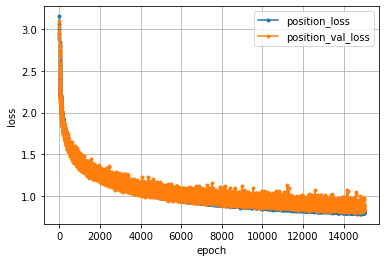

In [6]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()